# CAT1 Behavioral Descriptives

## First Analysis 
### Counts, Performance, and RT for 
#### - All trials individually

In [1]:
import os
from os.path import join
import numpy as np
import pandas as pd
from glob import glob
from math import sqrt
%matplotlib inline
import seaborn as sns
sns.set_palette('muted')
sns.set_style("whitegrid")
import matplotlib.pyplot as plt
from scipy import stats
from scipy.integrate import simps, trapz

In [4]:
subs = ['CAT1_001', 'CAT1_002', 'CAT1_003', 'CAT1_004', 'CAT1_005', 'CAT1_006', 'CAT1_007', 'CAT1_008', 'CAT1_009']
count_table = {}
ctstd_table = {}
rt_table = {}
rtstd_table = {}

for sub in subs:
    ct_dict = {}
    rt_dict = {}
    sub_dir = '/home/data/madlab/data/behav/CAT1/'.format(sub)
    dir_file = join(sub_dir, '{0}.csv'.format(sub))      
    sub_file = pd.read_csv(dir_file)
    run = sub_file.query('trial_acc == 0 or trial_acc == 1')
      
    trialtype = run['stim_ID'].values
    correct = run['trial_acc'].values 
    response = run['resp_trial_1.keys'].values
         
    S1F1_c = np.where((trialtype == 'S1F1') & (correct == 1))[0]
    S1F1_i = np.where(((trialtype == 'S1F1') & (correct == 0)) & (response != 'None'))[0]
    S1F2_c = np.where((trialtype == 'S1F2') & (correct == 1))[0]
    S1F2_i = np.where(((trialtype == 'S1F2') & (correct == 0)) & (response != 'None'))[0]
    S2F1_c = np.where((trialtype == 'S2F1') & (correct == 1))[0]
    S2F1_i = np.where(((trialtype == 'S2F1') & (correct == 0)) & (response != 'None'))[0]
    S2F2_c = np.where((trialtype == 'S2F2') & (correct == 1))[0]
    S2F2_i = np.where(((trialtype == 'S2F2') & (correct == 0)) & (response != 'None'))[0]
        
    S1C_c = np.where((trialtype == 'S1_C') & (correct == 1))[0]
    S1C_i = np.where(((trialtype == 'S1_C') & (correct == 0)) & (response != 'None'))[0]
    S2C_c = np.where((trialtype == 'S2_C') & (correct == 1))[0]
    S2C_i = np.where(((trialtype == 'S2_C') & (correct == 0)) & (response != 'None'))[0]
    
    BL = np.where(((trialtype != 'S1F1') & (trialtype != 'S1F2') & (trialtype != 'S2F1') & (trialtype != 'S2F2') 
                   & (trialtype != 'S1_C') & (trialtype != 'S2_C')) & (response != 'None'))[0]      
    NR = np.where((response == 'None'))[0]
    
    RTs = run['resp_trial_1.rt']  
        
    S1F1_c_RTs = RTs.values[S1F1_c]
    S1F1_i_RTs = RTs.values[S1F1_i]
    S1F2_c_RTs = RTs.values[S1F2_c]
    S1F2_i_RTs = RTs.values[S1F2_i]
    S2F1_c_RTs = RTs.values[S2F1_c]
    S2F1_i_RTs = RTs.values[S2F1_i]
    S2F2_c_RTs = RTs.values[S2F2_c]
    S2F2_i_RTs = RTs.values[S2F2_i]
        
    S1C_c_RTs = RTs.values[S1C_c]
    S1C_i_RTs = RTs.values[S1C_i]
    S2C_c_RTs = RTs.values[S2C_c]
    S2C_i_RTs = RTs.values[S2C_i]
        
    BL_RTs = RTs.values[BL]
    NR_RTs = RTs.values[NR]

    #Creation of a flexible naming convention for dictionary keys & contents        
    for curr_type in ['S1F1_c', 'S1F1_i', 'S1F2_c', 'S1F2_i',
                      'S2F1_c', 'S2F1_i', 'S2F2_c', 'S2F2_i',
                      'S1C_c', 'S1C_i', 'S2C_c', 'S2C_i',
                      'BL', 'NR']:
        curr_name = '{0}'.format(curr_type)
        if curr_type != 'NR':
            rt_name = '{0}_RTs'.format(curr_type)
        if not curr_name in ct_dict:
            ct_dict[curr_name] = []             
        ct_dict[curr_name].append(len(eval(curr_name)))
        
        if not rt_name in rt_dict:
            rt_dict[rt_name] = []
        rt_eval = eval(rt_name)  
        # Remove NaN from counts
        rt_notNaN = np.where(rt_eval >= 0)
        rt_notNaN = rt_eval[rt_notNaN[0]]           
        if rt_notNaN.shape[0] == 0:
            rt_dict[rt_name].append(None)                       
        else:
            rt_dict[rt_name].append(np.average(rt_notNaN))      
        # Remove NaN from RT calculations
        rt_notNaN = np.where(rt_eval >= 0)
        rt_notNaN = rt_eval[rt_notNaN[0]]           
        if rt_notNaN.shape[0] == 0:
            rt_dict[rt_name].append(None)                       
        else:
            rt_dict[rt_name].append(np.average(rt_notNaN))    
             
    for key in ct_dict:
        ct_dict[key] = np.sum(ct_dict[key])
        if not key in count_table:
            count_table[key] = []
        count_table[key].append(ct_dict[key])
              
    for key in rt_dict:
        rt_notNONE = np.where(np.array(rt_dict[key]) >= 0)
        rt_dict[key] = np.average(np.array(rt_dict[key])[rt_notNONE[0]])
        if not key in rt_table:
            rt_table[key] = []
        rt_table[key].append(rt_dict[key])

df_1 = pd.DataFrame(count_table, index = subs) 
df2_1 = pd.DataFrame(rt_table, index = subs) 

In [5]:
ct_avg = {}
ct_std = {}
for curr_key in count_table:
    ct_avg[curr_key] = np.average(count_table[curr_key])
    ct_std[curr_key] = np.std(count_table[curr_key])    
count_average_1 = pd.DataFrame(ct_avg, index = (1,))
count_std_1 = pd.DataFrame(ct_std, index = (1,))

In [6]:
count_average_1

BL         NR       S1C_c      S1C_i      S1F1_c     S1F1_i  \
1  177.444444  23.888889  109.888889  66.555556  162.333333  13.777778   

       S1F2_c     S1F2_i       S2C_c  S2C_i      S2F1_c    S2F1_i      S2F2_c  \
1  165.555556  12.111111  115.666667   61.0  165.777778  9.222222  168.666667   

     S2F2_i  
1  8.111111

In [7]:
count_std_1

BL         NR      S1C_c      S1C_i     S1F1_c    S1F1_i    S1F2_c  \
1  2.165954  13.803739  14.700298  14.591559  12.692955  11.17316  6.378978   

     S1F2_i      S2C_c      S2C_i     S2F1_c     S2F1_i    S2F2_c    S2F2_i  
1  5.216309  19.154344  19.527758  12.090196  11.331154  6.649979  6.822258

In [8]:
df_1

BL  NR  S1C_c  S1C_i  S1F1_c  S1F1_i  S1F2_c  S1F2_i  S2C_c  S2C_i  \
CAT1_001  179  22     83     93     167       9     159      19     85     90   
CAT1_002  178  38    105     69     168       8     161      13    142     32   
CAT1_003  179  12     98     81     137      40     172       7     92     87   
CAT1_004  172  44    131     43     154      22     161      14    132     43   
CAT1_005  177   7    130     48     177       3     176       4    142     37   
CAT1_006  180  25    105     73     161      11     158      19    119     58   
CAT1_007  178   8    119     60     171       8     173       6    108     71   
CAT1_008  177  43    102     69     149      20     168      11    107     69   
CAT1_009  177  16    116     63     177       3     162      16    114     62   

          S2F1_c  S2F1_i  S2F2_c  S2F2_i  
CAT1_001     170       8     167       9  
CAT1_002     172       2     165       7  
CAT1_003     136      40     153      26  
CAT1_004     154      13     176       1  
CAT1_005     177       3     170       9  
CAT1_006     171       4     168       8  
CAT1_007     173       5     175       5  
CAT1_008     170       3     169       3  
CAT1_009     169       5     175       5

In [9]:
CAT1_ACC_dict = {'S1F1':[], 'S1F2':[], 'S2F1':[], 'S2F2':[], 'S1C':[], 'S2C':[]}
for row in range(0, len(df_1)):
    for i, curr_type in enumerate(['S1F1', 'S1F2', 'S2F1', 'S2F2', 'S1C', 'S2C']):
        tot = df_1.iloc[row]['{0}_c'.format(curr_type)]+df_1.iloc[row]['{0}_i'.format(curr_type)]
        corr = df_1.iloc[row]['{0}_c'.format(curr_type)]
        acc = corr/float(tot)
        CAT1_ACC_dict['{0}'.format(curr_type)].append(acc)

df_ACC = pd.DataFrame(CAT1_ACC_dict, index = subs) 
df_ACC["fixed"] = df_ACC[['S1F1', 'S1F2', 'S2F1', 'S2F2']].mean(axis=1)
df_ACC["conditional"] = df_ACC[['S1C', 'S2C']].mean(axis=1)

In [10]:
df_ACC

S1C      S1F1      S1F2       S2C      S2F1      S2F2  \
CAT1_001  0.471591  0.948864  0.893258  0.485714  0.955056  0.948864   
CAT1_002  0.603448  0.954545  0.925287  0.816092  0.988506  0.959302   
CAT1_003  0.547486  0.774011  0.960894  0.513966  0.772727  0.854749   
CAT1_004  0.752874  0.875000  0.920000  0.754286  0.922156  0.994350   
CAT1_005  0.730337  0.983333  0.977778  0.793296  0.983333  0.949721   
CAT1_006  0.589888  0.936047  0.892655  0.672316  0.977143  0.954545   
CAT1_007  0.664804  0.955307  0.966480  0.603352  0.971910  0.972222   
CAT1_008  0.596491  0.881657  0.938547  0.607955  0.982659  0.982558   
CAT1_009  0.648045  0.983333  0.910112  0.647727  0.971264  0.972222   

             fixed  conditional  
CAT1_001  0.936510     0.478653  
CAT1_002  0.956910     0.709770  
CAT1_003  0.840595     0.530726  
CAT1_004  0.927876     0.753580  
CAT1_005  0.973541     0.761817  
CAT1_006  0.940098     0.631102  
CAT1_007  0.966480     0.634078  
CAT1_008  0.946355     0.602223  
CAT1_009  0.959233     0.647886

S1F1 mean:  0.921344181771 std:  0.0635474043319
S1F1 Shapiro:  (0.8397955894470215, 0.05745302513241768)

S1F2 mean:  0.931668119506 std:  0.0295865533846
S1F2 Shapiro:  (0.9318150281906128, 0.49881890416145325)

S2F1 mean:  0.947194946493 std:  0.0645368524395
S2F1 Shapiro:  (0.6235828399658203, 0.0001809190580388531)

S2F2 mean:  0.9542815063 std:  0.0380512008728
S2F2 Shapiro:  (0.7558591961860657, 0.006339211016893387)

S1C mean:  0.622773765653 std:  0.0827118597762
S1C Shapiro:  (0.9719123840332031, 0.9105718731880188)

S2C mean:  0.654967186836 std:  0.109906890441
S2C Shapiro:  (0.9483609795570374, 0.6720768809318542)



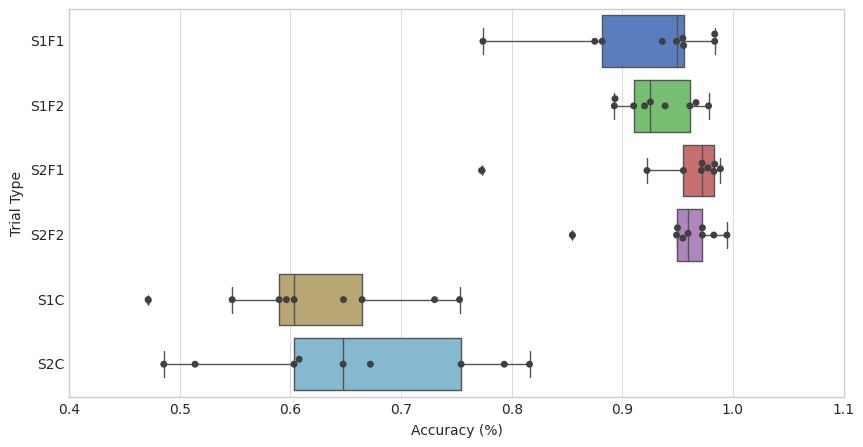

In [11]:
for d in ['S1F1', 'S1F2', 'S2F1', 'S2F2', 'S1C', 'S2C']:
    print '{0} mean: '.format(d), np.mean(df_ACC['{0}'.format(d)]), 'std: ', np.std(df_ACC['{0}'.format(d)])
    print '{0} Shapiro: '.format(d), stats.shapiro(df_ACC['{0}'.format(d)])
    print ""

N = 6
conditions = ['S1F1', 'S1F2', 'S2F1', 'S2F2', 'S1C', 'S2C']

means_allsubjs = [df_ACC['S1F1'], df_ACC['S1F2'], df_ACC['S2F1'], df_ACC['S2F2'], df_ACC['S1C'], df_ACC['S2C']]  
ind = np.arange(N)
fig, ax = plt.subplots(figsize = (10,5))
ax = sns.boxplot(data=means_allsubjs, orient='h')
ax = sns.swarmplot(data=means_allsubjs, color='.25', orient='h')
ax.set_yticks(ind)
ax.set_yticklabels(conditions)
ax.set_ylabel("Trial Type")
ax.set_xlabel("Accuracy (%)")
plt.show()

fixed mean:  0.938622188518 std:  0.0373360842504
fixed Shapiro:  (0.7481293678283691, 0.005157502833753824)

conditional mean:  0.638870476244 std:  0.0895502819683
conditional Shapiro:  (0.9501160383224487, 0.6913384795188904)

Wilcoxon Sign-Rank:  (0.0, 0.0076857940552132629) **


/home/data/madlab/envs/wmaze_madlab_env/lib/python2.7/site-packages/scipy/stats/morestats.py:2384: UserWarning: Warning: sample size too small for normal approximation.
  warnings.warn("Warning: sample size too small for normal approximation.")


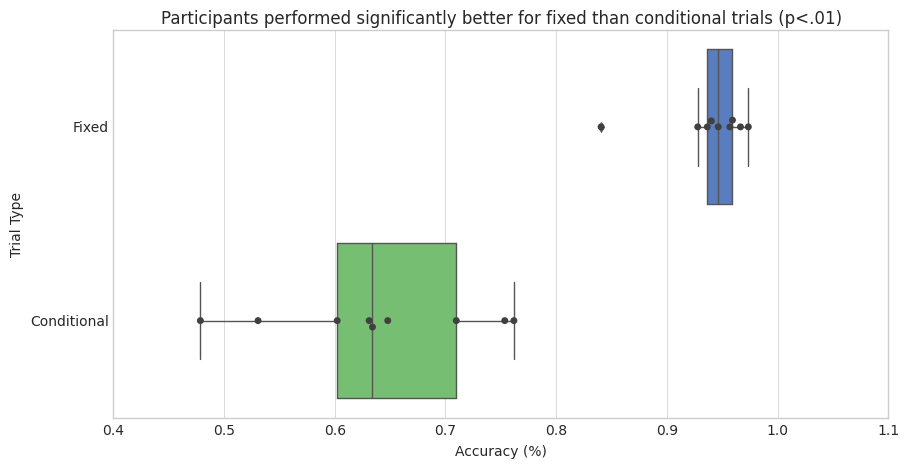

In [12]:
for d in ['fixed', 'conditional']:
    print "{0} mean: ".format(d), np.mean(df_ACC['{0}'.format(d)]), "std: ", np.std(df_ACC['{0}'.format(d)])
    print "{0} Shapiro: ".format(d), stats.shapiro(df_ACC['{0}'.format(d)])
    print ""
print "Wilcoxon Sign-Rank: ", stats.wilcoxon(df_ACC['fixed'], df_ACC['conditional'])[:], "**"

N = 2
conditions = ['Fixed', 'Conditional']

means_allsubjs = [df_ACC['fixed'], df_ACC['conditional']]  
ind = np.arange(N)
fig, ax = plt.subplots(figsize = (10,5))
ax = sns.boxplot(data=means_allsubjs, orient='h')
ax = sns.swarmplot(data=means_allsubjs, color='.25', orient='h')
ax.set_yticks(ind)
ax.set_yticklabels(conditions)
ax.set_ylabel("Trial Type")
ax.set_xlabel("Accuracy (%)")
ax.set_title("Participants performed significantly better for fixed than conditional trials (p<.01)")
plt.show()

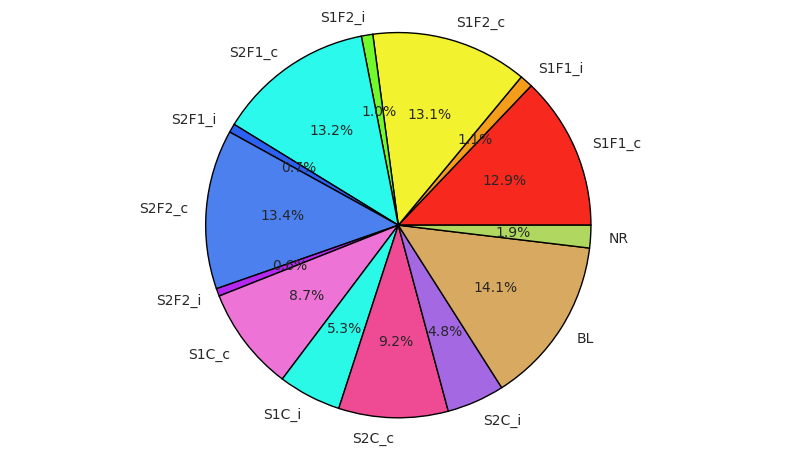

In [13]:
import matplotlib
matplotlib.axes.Axes.pie
matplotlib.pyplot.pie

N = 14
labels = ['S1F1_c', 'S1F1_i', 'S1F2_c', 'S1F2_i', 'S2F1_c', 'S2F1_i', 'S2F2_c', 
          'S2F2_i', 'S1C_c', 'S1C_i', 'S2C_c', 'S2C_i','BL', 'NR']
colors = ['#f7281d', '#f49d1a', '#f2f22e', '#71f92c', '#2bf9eb', '#2c61f4', '#4c80ef',
          '#b428ef', '#ed74d6', '#2af9e8', '#ef4a94', '#a368e2', '#d8a961', '#b0d861']

means_allsubjs = [np.mean(df_1['S1F1_c'])/1260, np.mean(df_1['S1F1_i'])/1260,
                  np.mean(df_1['S1F2_c'])/1260, np.mean(df_1['S1F2_i'])/1260,
                  np.mean(df_1['S2F1_c'])/1260, np.mean(df_1['S2F1_i'])/1260,
                  np.mean(df_1['S2F2_c'])/1260, np.mean(df_1['S2F2_i'])/1260,
                  np.mean(df_1['S1C_c'])/1260, np.mean(df_1['S1C_i'])/1260,
                  np.mean(df_1['S2C_c'])/1260, np.mean(df_1['S2C_i'])/1260,
                  np.mean(df_1['BL'])/1260, np.mean(df_1['NR'])/1260]
fig, ax = plt.subplots(figsize = (10,5))
ax.pie(means_allsubjs, labels = labels, colors = colors, autopct='%1.1f%%', startangle = 0)
ax.axis('equal')
plt.show()

# Reaction Time

In [14]:
rt_average ={}
rt_std = {}

for curr_key in rt_table:
    rt_average[curr_key] = np.average(rt_table[curr_key])
    rt_std[curr_key] = np.std(rt_table[curr_key])
RT_average_1 = pd.DataFrame(rt_average, index = (1,))
RT_std_1 = pd.DataFrame(rt_std, index = (1,))

In [15]:
RT_average_1

BL_RTs  S1C_c_RTs  S1C_i_RTs  S1F1_c_RTs  S1F1_i_RTs  S1F2_c_RTs  \
1  0.227301   0.259327   0.281944    0.239279    0.267135    0.230908   

   S1F2_i_RTs  S2C_c_RTs  S2C_i_RTs  S2F1_c_RTs  S2F1_i_RTs  S2F2_c_RTs  \
1    0.329748   0.253838   0.281195    0.239009     0.28084    0.234877   

   S2F2_i_RTs  
1    0.358827

In [16]:
RT_std_1
df_RTs = df2_1
df_RTs["fixed_RTs"] = df_RTs[['S1F1_c_RTs', 'S1F1_i_RTs', 'S1F2_c_RTs', 'S1F2_i_RTs', 
                              'S2F1_c_RTs', 'S2F1_i_RTs', 'S2F2_c_RTs', 'S2F2_i_RTs']].mean(axis=1)
df_RTs["conditional_RTs"] = df_RTs[['S1C_c_RTs', 'S1C_i_RTs', 'S2C_c_RTs', 'S2C_i_RTs']].mean(axis=1)

df_RTs["correct_RTs"] = df_RTs[['S1F1_c_RTs', 'S1F2_c_RTs','S2F1_c_RTs', 
                                'S2F2_c_RTs', 'S1C_c_RTs', 'S2C_c_RTs']].mean(axis=1)
df_RTs["incorrect_RTs"] = df_RTs[['S1F1_i_RTs', 'S1F2_i_RTs','S2F1_i_RTs', 
                                  'S2F2_i_RTs', 'S1C_i_RTs', 'S2C_i_RTs']].mean(axis=1)

In [17]:
df_RTs

BL_RTs  S1C_c_RTs  S1C_i_RTs  S1F1_c_RTs  S1F1_i_RTs  S1F2_c_RTs  \
CAT1_001  0.228713   0.302743   0.284081    0.257316    0.220839    0.231665   
CAT1_002  0.189683   0.249847   0.277726    0.279559    0.177868    0.261011   
CAT1_003  0.182876   0.148133   0.139202    0.151694    0.159736    0.152441   
CAT1_004  0.362462   0.396720   0.439992    0.402713    0.407028    0.405910   
CAT1_005  0.226872   0.255133   0.334411    0.207118    0.313004    0.196565   
CAT1_006  0.169162   0.204048   0.251268    0.175345    0.225017    0.173776   
CAT1_007  0.275087   0.293316   0.333688    0.237730    0.344297    0.214832   
CAT1_008  0.211834   0.256805   0.264771    0.243784    0.287568    0.233603   
CAT1_009  0.199022   0.227195   0.212359    0.198255    0.268861    0.208371   

          S1F2_i_RTs  S2C_c_RTs  S2C_i_RTs  S2F1_c_RTs  S2F1_i_RTs  \
CAT1_001    0.348993   0.263412   0.282138    0.255710    0.289697   
CAT1_002    0.331650   0.250705   0.276933    0.289676    0.377470   
CAT1_003    0.361529   0.151943   0.139898    0.155440    0.173560   
CAT1_004    0.451126   0.376901   0.440959    0.406098    0.488087   
CAT1_005    0.282888   0.235862   0.311392    0.215125    0.324912   
CAT1_006    0.290060   0.212864   0.230819    0.151333    0.207225   
CAT1_007    0.358122   0.294094   0.342084    0.248850    0.319277   
CAT1_008    0.308151   0.243157   0.265364    0.231814    0.240682   
CAT1_009    0.235213   0.255602   0.241164    0.197035    0.106648   

          S2F2_c_RTs  S2F2_i_RTs  fixed_RTs  conditional_RTs  correct_RTs  \
CAT1_001    0.256230    0.313260   0.271714         0.283093     0.261179   
CAT1_002    0.305314    0.285834   0.288548         0.263803     0.272686   
CAT1_003    0.166551    0.217007   0.192245         0.144794     0.154367   
CAT1_004    0.391502    0.655844   0.451038         0.413643     0.396640   
CAT1_005    0.194645    0.400764   0.266878         0.284200     0.217408   
CAT1_006    0.149818    0.368686   0.217657         0.224750     0.177864   
CAT1_007    0.223843    0.385810   0.291595         0.315796     0.252111   
CAT1_008    0.229137    0.335709   0.263806         0.257524     0.239717   
CAT1_009    0.196851    0.266525   0.209720         0.234080     0.213885   

          incorrect_RTs  
CAT1_001       0.289835  
CAT1_002       0.287913  
CAT1_003       0.198489  
CAT1_004       0.480506  
CAT1_005       0.327895  
CAT1_006       0.262179  
CAT1_007       0.347213  
CAT1_008       0.283708  
CAT1_009       0.221795

S1F1_C Mean:  0.239279420517 STD:  0.0692476003352
S1F1_I Mean:  0.267135382883 STD:  0.0756224343762
S1F1_C Shapiro:  (0.8969861268997192, 0.23504577577114105)

S1F2_C Mean:  0.230908268149 STD:  0.0690464497513
S1F2_I Mean:  0.329747888057 STD:  0.0578273143594
S1F2_C Shapiro:  (0.8154579401016235, 0.030613521113991737)

S2F1_C Mean:  0.239009029442 STD:  0.0729662213093
S2F1_I Mean:  0.280839853732 STD:  0.107842566084
S2F1_C Shapiro:  (0.9058293104171753, 0.28776514530181885)

S2F2_C Mean:  0.234876753006 STD:  0.0707669246155
S2F2_I Mean:  0.35882674819 STD:  0.118965127412
S2F2_C Shapiro:  (0.9102022647857666, 0.3172934651374817)

S1C_C Mean:  0.259326518885 STD:  0.0653904802559
S1C_I Mean:  0.281944147236 STD:  0.0795020414173
S1C_C Shapiro:  (0.9589609503746033, 0.7873834371566772)

S2C_C Mean:  0.253837731088 STD:  0.0571237880923
S2C_I Mean:  0.281194626318 STD:  0.0778307526081
S2C_C Shapiro:  (0.9316268563270569, 0.49698999524116516)



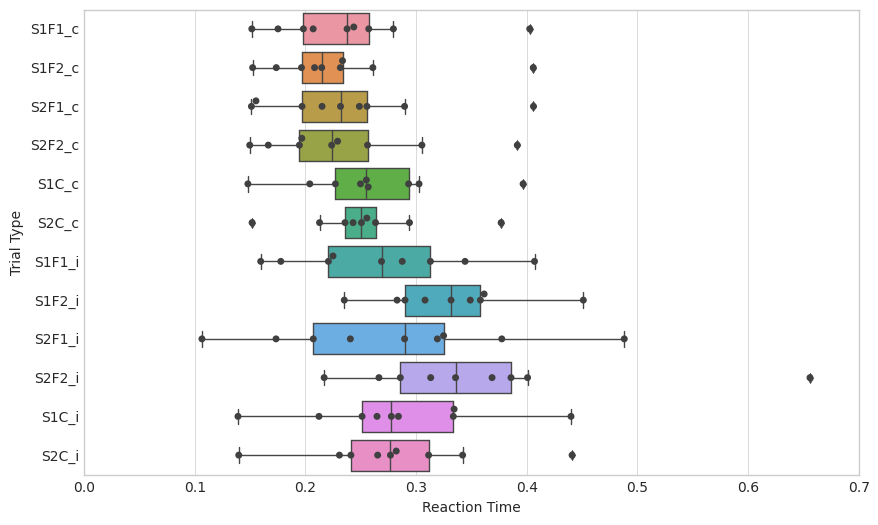

In [18]:
for d in ['S1F1', 'S1F2', 'S2F1', 'S2F2', 'S1C', 'S2C']:
    print '{0}_C Mean: '.format(d), np.mean(df_RTs['{0}_c_RTs'.format(d)]), 'STD: ', np.std(df_RTs['{0}_c_RTs'.format(d)])
    print '{0}_I Mean: '.format(d), np.mean(df_RTs['{0}_i_RTs'.format(d)]), 'STD: ', np.std(df_RTs['{0}_i_RTs'.format(d)])
    print '{0}_C Shapiro: '.format(d), stats.shapiro(df_RTs['{0}_c_RTs'.format(d)])
    print ""

N = 12
conditions = ['S1F1_c', 'S1F2_c', 'S2F1_c', 'S2F2_c', 'S1C_c', 'S2C_c',
              'S1F1_i', 'S1F2_i', 'S2F1_i', 'S2F2_i', 'S1C_i', 'S2C_i']

means_allsubjs = [df_RTs['S1F1_c_RTs'],df_RTs['S1F2_c_RTs'],df_RTs['S2F1_c_RTs'],
                  df_RTs['S2F2_c_RTs'],df_RTs['S1C_c_RTs'],df_RTs['S2C_c_RTs'],
                  df_RTs['S1F1_i_RTs'],df_RTs['S1F2_i_RTs'],df_RTs['S2F1_i_RTs'],
                  df_RTs['S2F2_i_RTs'],df_RTs['S1C_i_RTs'],df_RTs['S2C_i_RTs']]  
ind = np.arange(N)
fig, ax = plt.subplots(figsize = (10,6))
ax = sns.boxplot(data=means_allsubjs, orient='h')
ax = sns.swarmplot(data=means_allsubjs, color='.25', orient='h')
ax.set_yticks(ind)
ax.set_yticklabels(conditions)
ax.set_ylabel("Trial Type")
ax.set_xlabel("Reaction Time")
plt.show()

Fixed Shapiro:  (0.8156604170799255, 0.03077559545636177)
Conditional Shapiro:  (0.9469510316848755, 0.6566450595855713)
Paired Sample t-Test:  (0.38851896098136068, 0.70776730361783668)


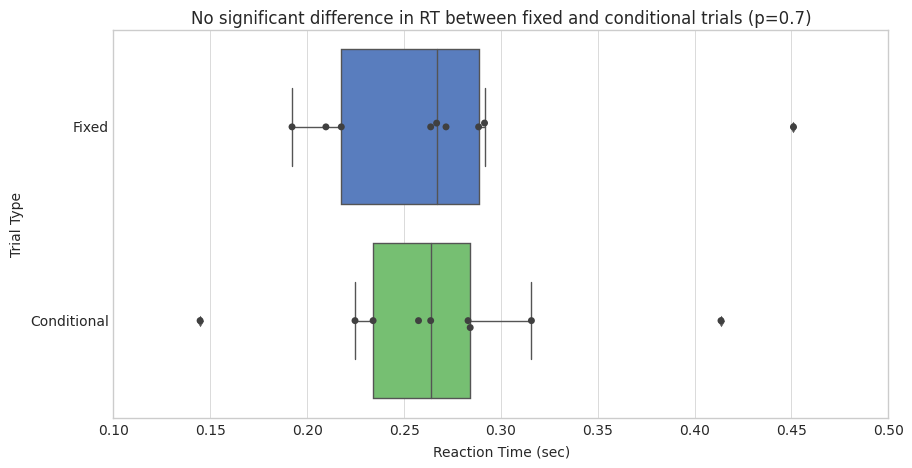

In [21]:
print "Fixed Shapiro: ", stats.shapiro(df_RTs['fixed_RTs'])
print "Conditional Shapiro: ", stats.shapiro(df_RTs['conditional_RTs'])
print "Paired Sample t-Test: ", stats.ttest_rel(df_RTs['fixed_RTs'], df_RTs['conditional_RTs'])[:]

N = 2
conditions = ['Fixed', 'Conditional']

means_allsubjs = [df_RTs['fixed_RTs'], df_RTs['conditional_RTs']]  
ind = np.arange(N)
fig, ax = plt.subplots(figsize = (10,5))
ax = sns.boxplot(data=means_allsubjs, orient='h')
ax = sns.swarmplot(data=means_allsubjs, color='.25', orient='h')
ax.set_yticks(ind)
ax.set_yticklabels(conditions)
ax.set_ylabel("Trial Type")
ax.set_xlabel("Reaction Time (sec)")
ax.set_title("No significant difference in RT between fixed and conditional trials (p=0.7)")
plt.show()

Correct Shapiro:  (0.8987017869949341, 0.24457122385501862)
Incorrect Shapiro:  (0.8994002342224121, 0.24854359030723572)
Pair Samples t-test:  (-4.6022182913882554, 0.0017503700153267282) *


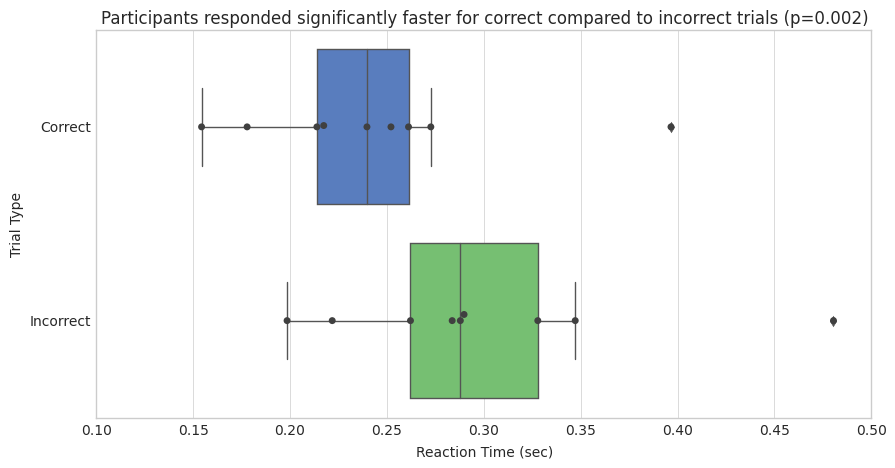

In [22]:
print "Correct Shapiro: ", stats.shapiro(df_RTs['correct_RTs']) 
print "Incorrect Shapiro: ", stats.shapiro(df_RTs['incorrect_RTs'])
print "Pair Samples t-test: ", stats.ttest_rel(df_RTs['correct_RTs'], df_RTs['incorrect_RTs'])[:], "*"

N = 2
conditions = ['Correct', 'Incorrect']

means_allsubjs = [df_RTs['correct_RTs'], df_RTs['incorrect_RTs']]  
ind = np.arange(N)
fig, ax = plt.subplots(figsize = (10,5))
ax = sns.boxplot(data=means_allsubjs, orient='h')
ax = sns.swarmplot(data=means_allsubjs, color='.25', orient='h')
ax.set_yticks(ind)
ax.set_yticklabels(conditions)
ax.set_ylabel("Trial Type")
ax.set_xlabel("Reaction Time (sec)")
ax.set_title("Participants responded significantly faster for correct compared to incorrect trials (p=0.002)")
plt.show()

## Second Analysis 
### Counts, Performance, and RT for 
#### - fixed and conditional correct/incorrect trials
#### - all fixed before conditional correct and incorrect
#### - correct fixed before conditional correct and incorrect
#### - incorrect fixed before conditional correct and incorrect

In [23]:
subs = ['CAT1_001', 'CAT1_002', 'CAT1_003', 'CAT1_004', 'CAT1_005',
        'CAT1_006', 'CAT1_007', 'CAT1_008', 'CAT1_009']

count_table = {}
ctstd_table = {}
rt_table = {}
rtstd_table = {}

for sub in subs:
    ct_dict = {}
    rt_dict = {}
    sub_dir = '/home/data/madlab/data/behav/CAT1/'.format(sub)
    dir_file = join(sub_dir, '{0}.csv'.format(sub))  
    
    sub_file = pd.read_csv(dir_file)
    # Creates new array sans gaps in csv file
    run = sub_file.query('trial_acc == 0 or trial_acc == 1')
      
    trialtype = run['stim_ID'].values
    correct = run['trial_acc'].values 
    response = run['resp_trial_1.keys'].values

    trial_shift = trialtype[1:] 
    trial_shift = np.insert(trial_shift, trial_shift.shape[0], -1)
    

    correct_shift = correct[1:]
    correct_shift = np.insert(correct_shift, -1, -1)
           
      
    f_b4_c_corr = np.where((((trial_shift == 'S1_C') | (trial_shift == 'S2_C')) 
                            & (correct_shift == 1)) & (trialtype != 'BL'))[0]
    f_b4_c_incorr = np.where((((trial_shift == 'S1_C') | (trial_shift == 'S2_C')) 
                            & (correct_shift == 0)) & (trialtype != 'BL'))[0]  
    fC_b4_c_corr = np.where((((trial_shift == 'S1_C') | (trial_shift == 'S2_C')) 
                             & (correct_shift == 1) & (correct == 1)) & (trialtype != 'BL'))[0]
    fI_b4_c_corr = np.where((((trial_shift == 'S1_C') | (trial_shift == 'S2_C')) 
                             & (correct_shift == 1) & (correct != 1)) & (trialtype != 'BL'))[0]
    fC_b4_c_incorr = np.where((((trial_shift == 'S1_C') | (trial_shift == 'S2_C')) 
                             & (correct_shift == 0) & (correct == 1)) & (trialtype != 'BL'))[0]
    fI_b4_c_incorr = np.where((((trial_shift == 'S1_C') | (trial_shift == 'S2_C')) 
                             & (correct_shift == 0) & (correct != 1)) & (trialtype != 'BL'))[0]
      
    RTs = run['resp_trial_1.rt']
 
    f_b4_c_corr_RTs = RTs.values[f_b4_c_corr]
    f_b4_c_incorr_RTs = RTs.values[f_b4_c_incorr]
    fC_b4_c_corr_RTs = RTs.values[fC_b4_c_corr]
    fI_b4_c_corr_RTs = RTs.values[fI_b4_c_corr]
    fC_b4_c_incorr_RTs = RTs.values[fC_b4_c_incorr]
    fI_b4_c_incorr_RTs = RTs.values[fI_b4_c_incorr]
                
    for curr_type in ['f_b4_c_corr', 'f_b4_c_incorr', 'fC_b4_c_corr', 
                      'fC_b4_c_incorr', 'fI_b4_c_corr', 'fI_b4_c_incorr']:
        curr_name = '{0}'.format(curr_type)
        if curr_type != 'NR':
            rt_name = '{0}_RTs'.format(curr_type)
        if not curr_name in ct_dict:
            ct_dict[curr_name] = []             
        ct_dict[curr_name].append(len(eval(curr_name)))
        
        if not rt_name in rt_dict:
            rt_dict[rt_name] = []
        rt_eval = eval(rt_name) 
        rt_notNaN = np.where(rt_eval >= 0)
        rt_notNaN = rt_eval[rt_notNaN[0]]           
        if rt_notNaN.shape[0] == 0:
            rt_dict[rt_name].append(None)                       
        else:
            rt_dict[rt_name].append(np.average(rt_notNaN))   
        rt_notNaN = np.where(rt_eval >= 0)
        rt_notNaN = rt_eval[rt_notNaN[0]]           
        if rt_notNaN.shape[0] == 0:
            rt_dict[rt_name].append(None)                       
        else:
            rt_dict[rt_name].append(np.average(rt_notNaN))    
             
    for key in ct_dict:
        ct_dict[key] = np.sum(ct_dict[key])
        if not key in count_table:
            count_table[key] = []
        count_table[key].append(ct_dict[key])
              
    for key in rt_dict:
        rt_notNONE = np.where(np.array(rt_dict[key]) >= 0)
        rt_dict[key] = np.average(np.array(rt_dict[key])[rt_notNONE[0]])
        if not key in rt_table:
            rt_table[key] = []
        rt_table[key].append(rt_dict[key])

df_2 = pd.DataFrame(count_table, index = subs) 
df2_2 = pd.DataFrame(rt_table, index = subs) 

/home/data/madlab/envs/wmaze_madlab_env/lib/python2.7/site-packages/ipykernel/__main__.py:65: RuntimeWarning: invalid value encountered in greater_equal
/home/data/madlab/envs/wmaze_madlab_env/lib/python2.7/site-packages/ipykernel/__main__.py:71: RuntimeWarning: invalid value encountered in greater_equal


In [24]:
import matplotlib.pyplot as plt

ct_avg = {}
ct_std = {}

for curr_key in count_table:
    ct_avg[curr_key] = np.average(count_table[curr_key])
    ct_std[curr_key] = np.std(count_table[curr_key])
    
count_average_2 = pd.DataFrame(ct_avg, index = (1,))
count_std_2 = pd.DataFrame(ct_std, index = (1,))

In [25]:
count_average_2

fC_b4_c_corr  fC_b4_c_incorr  fI_b4_c_corr  fI_b4_c_incorr  f_b4_c_corr  \
1    207.777778           116.0     17.555556       18.444444   225.333333   

   f_b4_c_incorr  
1     134.444444

In [26]:
count_std_2

fC_b4_c_corr  fC_b4_c_incorr  fI_b4_c_corr  fI_b4_c_incorr  f_b4_c_corr  \
1     36.793048       27.495454      9.178612        7.761889     31.62629   

   f_b4_c_incorr  
1      31.436395

In [27]:
df_2

fC_b4_c_corr  fC_b4_c_incorr  fI_b4_c_corr  fI_b4_c_incorr  \
CAT1_001           154             167            13              25   
CAT1_002           234              94            13              19   
CAT1_003           153             135            37              35   
CAT1_004           244              77            19              20   
CAT1_005           266              78             6              10   
CAT1_006           204             118            20              18   
CAT1_007           217             126            10               7   
CAT1_008           181             133            28              18   
CAT1_009           217             116            12              14   

          f_b4_c_corr  f_b4_c_incorr  
CAT1_001          167            192  
CAT1_002          247            113  
CAT1_003          190            170  
CAT1_004          263             97  
CAT1_005          272             88  
CAT1_006          224            136  
CAT1_007          227            133  
CAT1_008          209            151  
CAT1_009          229            130

In [29]:
sos_matrix = pd.DataFrame()
sos_matrix['TProp_Corr_FIXED'] = (df_2['fC_b4_c_corr']+df_2['fC_b4_c_incorr'])/(df_2['fC_b4_c_corr']+df_2['fI_b4_c_corr']
                                  +df_2['fC_b4_c_incorr']+df_2['fI_b4_c_incorr'])
    
sos_matrix['TProp_Corr_COND'] = (df_2['fC_b4_c_corr']+df_2['fI_b4_c_corr'])/(df_2['fC_b4_c_corr']+df_2['fI_b4_c_corr']
                                  +df_2['fC_b4_c_incorr']+df_2['fI_b4_c_incorr'])

sos_matrix["corr_fixed_prop"] = df_2['fC_b4_c_corr']/(df_2['fC_b4_c_corr']+df_2['fI_b4_c_corr'])
sos_matrix["incorr_fixed_prop"] =  df_2['fC_b4_c_incorr']/(df_2['fC_b4_c_incorr']+df_2['fI_b4_c_incorr'])

In [30]:
sos_matrix

TProp_Corr_FIXED  TProp_Corr_COND  corr_fixed_prop  \
CAT1_001          0.894150         0.465181         0.922156   
CAT1_002          0.911111         0.686111         0.947368   
CAT1_003          0.800000         0.527778         0.805263   
CAT1_004          0.891667         0.730556         0.927757   
CAT1_005          0.955556         0.755556         0.977941   
CAT1_006          0.894444         0.622222         0.910714   
CAT1_007          0.952778         0.630556         0.955947   
CAT1_008          0.872222         0.580556         0.866029   
CAT1_009          0.927577         0.637883         0.947598   

          incorr_fixed_prop  
CAT1_001           0.869792  
CAT1_002           0.831858  
CAT1_003           0.794118  
CAT1_004           0.793814  
CAT1_005           0.886364  
CAT1_006           0.867647  
CAT1_007           0.947368  
CAT1_008           0.880795  
CAT1_009           0.892308

prop_corr_fixed vs. prop_incorr_fixed:  (3.2847527689043972, 0.011108697606875875)
FI_b4_c_corr vs. FI_b4_c_incorr:  (-0.42777078963293874, 0.68010027342745638)


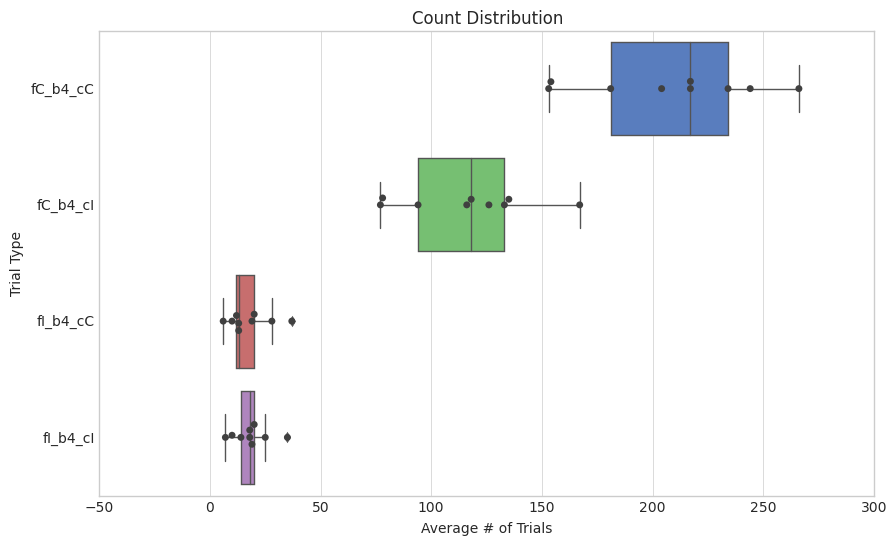

In [31]:
print 'prop_corr_fixed vs. prop_incorr_fixed: ', stats.ttest_rel(sos_matrix['corr_fixed_prop'], sos_matrix['incorr_fixed_prop'])[:]
print 'FI_b4_c_corr vs. FI_b4_c_incorr: ', stats.ttest_rel(df_2['fI_b4_c_corr'], df_2['fI_b4_c_incorr'])[:]

N = 4
conditions = ['fC_b4_cC', 'fC_b4_cI', 'fI_b4_cC', 'fI_b4_cI']

means_allsubjs = [df_2['fC_b4_c_corr'], df_2['fC_b4_c_incorr'],
                  df_2['fI_b4_c_corr'], df_2['fI_b4_c_incorr']]  
ind = np.arange(N)
fig, ax = plt.subplots(figsize=(10,6))
ax = sns.boxplot(data=means_allsubjs, orient = 'h')
ax = sns.swarmplot(data=means_allsubjs, color='.25', orient = 'h')
ax.set_yticks(ind)
ax.set_yticklabels(conditions)
ax.set_xlabel('Average # of Trials')
ax.set_ylabel('Trial Type')
ax.set_title('Count Distribution')
plt.show()

Probability of Fixed Predicting Correct Conditional
Fixed Correct: 0.63911933823 SD: 0.0938961312757
Fixed Incorrect: 0.478800981837 SD: 0.0865573121067

Test for Normacy of Distributions
Fixed Corr Normal Test:  (0.9596555829048157, 0.7947080731391907)
Fixed Incorr Normal Test:  (0.9632261991500854, 0.8314122557640076)

**Both distributions are normal -- Use Parametric t-Test
1st Fixed Correct vs Incorrect: (3.3384295074693027, 0.0102550662597721)


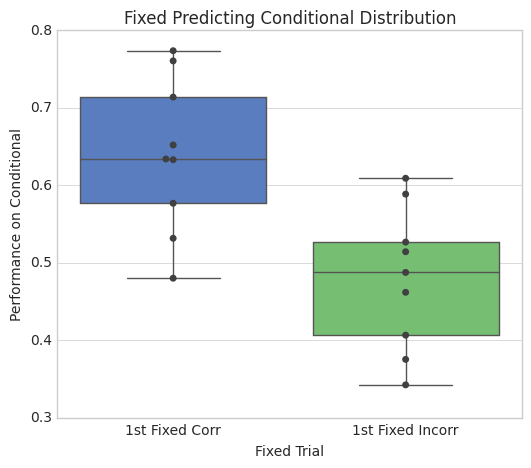

In [32]:
sos_matrix["1st_fixed_corr"] =  df_2['fC_b4_c_corr']/(df_2['fC_b4_c_corr']+df_2['fC_b4_c_incorr'])
sos_matrix["1st_fixed_incorr"] = df_2['fI_b4_c_corr']/(df_2['fI_b4_c_corr']+df_2['fI_b4_c_incorr'])

print "Probability of Fixed Predicting Correct Conditional"
print 'Fixed Correct:', np.mean(sos_matrix["1st_fixed_corr"]), "SD:", np.std(sos_matrix["1st_fixed_corr"])
print 'Fixed Incorrect:', np.mean(sos_matrix["1st_fixed_incorr"]), "SD:", np.std(sos_matrix["1st_fixed_incorr"])
print ""
print "Test for Normacy of Distributions"
print "Fixed Corr Normal Test: ", stats.shapiro(sos_matrix["1st_fixed_corr"])
print "Fixed Incorr Normal Test: ", stats.shapiro(sos_matrix["1st_fixed_incorr"])
print ""
print "**Both distributions are normal -- Use Parametric t-Test"
print "1st Fixed Correct vs Incorrect:", stats.ttest_rel(sos_matrix["1st_fixed_corr"], sos_matrix["1st_fixed_incorr"])[:]

N = 2
conditions = ['1st Fixed Corr', '1st Fixed Incorr']

allsubjs = [sos_matrix["1st_fixed_corr"], sos_matrix["1st_fixed_incorr"]] 

ind = np.arange(N)
fig, ax = plt.subplots(figsize = (6,5))
ax = sns.boxplot(data=allsubjs)
ax = sns.swarmplot(data=allsubjs, color='.25')
ax.set_xticks(ind)
ax.set_xticklabels(conditions)
ax.set_xlabel('Fixed Trial')
ax.set_ylabel('Performance on Conditional')
ax.set_title('Fixed Predicting Conditional Distribution')
plt.show()

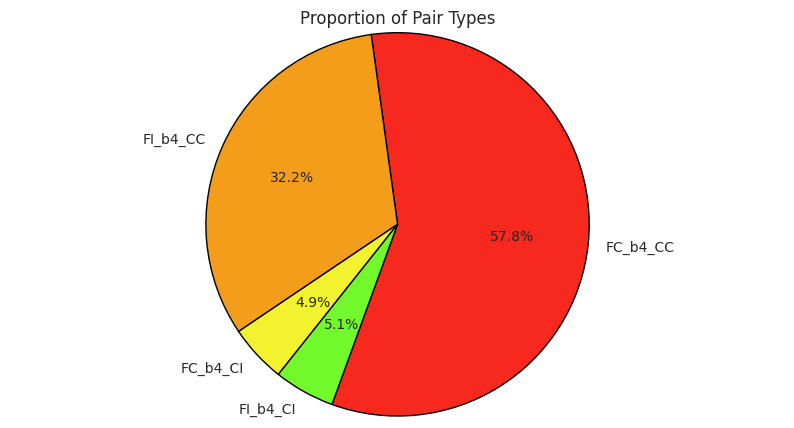

In [33]:
import matplotlib
matplotlib.axes.Axes.pie
matplotlib.pyplot.pie

tot = [np.mean(df_2['fC_b4_c_corr']), np.mean(df_2['fC_b4_c_incorr']), 
       np.mean(df_2['fI_b4_c_corr']), np.mean(df_2['fI_b4_c_incorr'])]
tot = sum(tot)

N = 4
labels = ['FC_b4_CC', 'FI_b4_CC', 'FC_b4_CI', 'FI_b4_CI']
colors = ['#f7281d', '#f49d1a', '#f2f22e', '#71f92c']

means_allsubjs = [np.mean(df_2['fC_b4_c_corr'])/tot, np.mean(df_2['fC_b4_c_incorr'])/tot,
                  np.mean(df_2['fI_b4_c_corr'])/tot, np.mean(df_2['fI_b4_c_incorr'])/tot]
fig, ax = plt.subplots(figsize = (10,5))
ax.pie(means_allsubjs, labels = labels, colors = colors, autopct='%1.1f%%', startangle = 250)
ax.axis('equal')
ax.set_title('Proportion of Pair Types')
plt.show()

## Reaction Time

In [19]:
rt_average ={}
rt_std = {}

for curr_key in rt_table:
    rt_average[curr_key] = np.average(rt_table[curr_key])
    rt_std[curr_key] = np.std(rt_table[curr_key])
RT_average_2 = pd.DataFrame(rt_average, index = (1,))
RT_std_2 = pd.DataFrame(rt_std, index = (1,))

In [20]:
RT_average_2

fC_b4_c_corr_RTs  fC_b4_c_incorr_RTs  fI_b4_c_corr_RTs  fI_b4_c_incorr_RTs  \
1          0.232784            0.248715          0.304531            0.301956   

   f_b4_c_corr_RTs  f_b4_c_incorr_RTs  
1         0.237052           0.254162

In [21]:
RT_std_2

fC_b4_c_corr_RTs  fC_b4_c_incorr_RTs  fI_b4_c_corr_RTs  fI_b4_c_incorr_RTs  \
1          0.069986            0.073864          0.070387            0.090082   

   f_b4_c_corr_RTs  f_b4_c_incorr_RTs  
1         0.067714           0.074946

In [22]:
df2_2

fC_b4_c_corr_RTs  fC_b4_c_incorr_RTs  fI_b4_c_corr_RTs  \
CAT1_001          0.231748            0.254533          0.347680   
CAT1_002          0.278391            0.284940          0.210997   
CAT1_003          0.155603            0.143119          0.191010   
CAT1_004          0.402200            0.420857          0.436109   
CAT1_005          0.199460            0.265084          0.330656   
CAT1_006          0.163383            0.179534          0.336832   
CAT1_007          0.216160            0.251535          0.326660   
CAT1_008          0.246276            0.229287          0.294561   
CAT1_009          0.201834            0.209549          0.266277   

          fI_b4_c_incorr_RTs  f_b4_c_corr_RTs  f_b4_c_incorr_RTs  
CAT1_001            0.312530         0.238817           0.261012  
CAT1_002            0.307322         0.275629           0.287092  
CAT1_003            0.165415         0.162347           0.147391  
CAT1_004            0.469929         0.403406           0.429299  
CAT1_005            0.375259         0.202354           0.276482  
CAT1_006            0.282913         0.175263           0.190498  
CAT1_007            0.356892         0.220560           0.257080  
CAT1_008            0.273788         0.250422           0.232686  
CAT1_009            0.173554         0.204673           0.205922

Fixed Before Cond Corr RT: 0.237052393855
SD: 0.0677140293206
Fixed Before Cond Incorr RT: 0.254162470904
SD: 0.0749462229041
Fixed_b4_corrCond vs Fixed_b4_incorrCond: (-1.8349583999945303, 0.10384497009800507)

Test for Normacy of Distributions
Fixed Before Corr Cond Normal Test:  (0.8494097590446472, 0.07341387122869492)
Fixed Before Incorr Cond Normal Test:  (0.9054813385009766, 0.2855167090892792)

**Normal distributions -- Use Parametric t-Test
Fixed Before Correct vs Incorrect Cond:  (-1.8349583999945303, 0.10384497009800507)


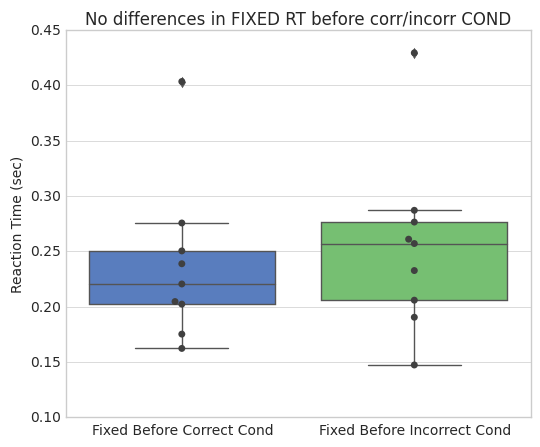

In [34]:
print 'Fixed Before Cond Corr RT:', np.mean(df2_2['f_b4_c_corr_RTs'])
print "SD:", np.std(df2_2['f_b4_c_corr_RTs'])
print 'Fixed Before Cond Incorr RT:', np.mean(df2_2['f_b4_c_incorr_RTs'])
print "SD:", np.std(df2_2['f_b4_c_incorr_RTs'])
print "Fixed_b4_corrCond vs Fixed_b4_incorrCond:", stats.ttest_rel(df2_2['f_b4_c_corr_RTs'], df2_2['f_b4_c_incorr_RTs'])[:]
print ""
print "Test for Normacy of Distributions"
print "Fixed Before Corr Cond Normal Test: ", stats.shapiro(df2_2['f_b4_c_corr_RTs'])
print "Fixed Before Incorr Cond Normal Test: ", stats.shapiro(df2_2['f_b4_c_incorr_RTs'])
print ""
print "**Normal distributions -- Use Parametric t-Test"
print "Fixed Before Correct vs Incorrect Cond: ", stats.ttest_rel(df2_2['f_b4_c_corr_RTs'], df2_2['f_b4_c_incorr_RTs'])[:]

N = 2
conditions = ['Fixed Before Correct Cond', 'Fixed Before Incorrect Cond']

means_allsubjs = [df2_2['f_b4_c_corr_RTs'], df2_2['f_b4_c_incorr_RTs']]  
ind = np.arange(N)
fig, ax = plt.subplots(figsize = (6,5))
ax = sns.boxplot(data=means_allsubjs)
ax = sns.swarmplot(data=means_allsubjs, color='.25')
ax.set_xticks(ind)
ax.set_xticklabels(conditions)
ax.set_ylabel("Reaction Time (sec)")
ax.set_title('No differences in FIXED RT before corr/incorr COND')
plt.show()

FC b4 CC RT: 0.232783900997
SD: 0.0699864608127
FC b4 CI RT: 0.248715319354
SD: 0.0738637775952
FI b4 CC RT: 0.304531275871
SD: 0.0703867768754
FI b4 CI RT: 0.301955834627
SD: 0.0900824008128

Test for Normacy of Distributions
FC b4 CC Normal Test: (0.858871579170227, 0.09321052581071854)
FC b4 CI Test: (0.9073958396911621, 0.2980715334415436)
FI b4 CC Test: (0.9519056677818298, 0.7109900712966919)
FI b4 CITest: (0.9539517164230347, 0.7333964109420776)

*All distributions are normal -- Use Parametric t-Test
F Corr vs Incorr b4 CC: (-3.0421655664851777, 0.016010501336427573)
F Corr vs Incorr b4 CI : (-3.3249395712680498, 0.010462874923956403)


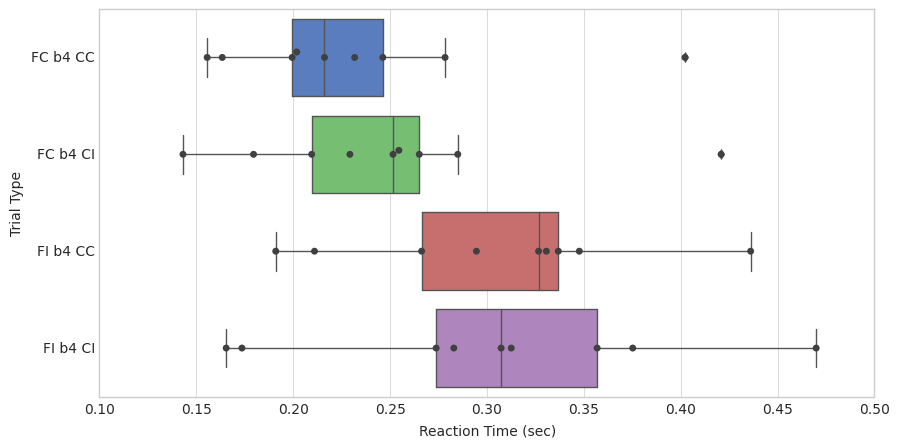

In [28]:
for d in ['']

print 'FC b4 CC RT:', np.mean(df2_2['fC_b4_c_corr_RTs'])
print 'SD:', np.std(df2_2['fC_b4_c_corr_RTs'])
print 'FC b4 CI RT:', np.mean(df2_2['fC_b4_c_incorr_RTs'])
print 'SD:', np.std(df2_2['fC_b4_c_incorr_RTs'])
print 'FI b4 CC RT:', np.mean(df2_2['fI_b4_c_corr_RTs'])
print 'SD:', np.std(df2_2['fI_b4_c_corr_RTs'])
print 'FI b4 CI RT:', np.mean(df2_2['fI_b4_c_incorr_RTs'])
print 'SD:', np.std(df2_2['fI_b4_c_incorr_RTs'])
print ""
print "Test for Normacy of Distributions"
print "FC b4 CC Normal Test:", stats.shapiro(df2_2['fC_b4_c_corr_RTs'])
print "FC b4 CI Test:", stats.shapiro(df2_2['fC_b4_c_incorr_RTs'])
print "FI b4 CC Test:", stats.shapiro(df2_2['fI_b4_c_corr_RTs'])
print "FI b4 CITest:", stats.shapiro(df2_2['fI_b4_c_incorr_RTs'])
print ""
print "*All distributions are normal -- Use Parametric t-Test"
print "F Corr vs Incorr b4 CC:", stats.ttest_rel(df2_2['fC_b4_c_corr_RTs'], df2_2['fI_b4_c_corr_RTs'])[:]
print "F Corr vs Incorr b4 CI :", stats.ttest_rel(df2_2['fC_b4_c_incorr_RTs'], df2_2['fI_b4_c_incorr_RTs'])[:]

N = 4
conditions = ['FC b4 CC', 'FC b4 CI', 'FI b4 CC', 'FI b4 CI']

means_allsubjs = [df2_2['fC_b4_c_corr_RTs'], df2_2['fC_b4_c_incorr_RTs'],
                  df2_2['fI_b4_c_corr_RTs'], df2_2['fI_b4_c_incorr_RTs']]  
ind = np.arange(N)
fig, ax = plt.subplots(figsize = (10,5))
ax = sns.boxplot(data=means_allsubjs, orient='h')
ax = sns.swarmplot(data=means_allsubjs, color='.25', orient='h')
ax.set_yticks(ind)
ax.set_yticklabels(conditions)
ax.set_ylabel("Trial Type")
ax.set_xlabel("Reaction Time (sec)")
plt.show()

In [36]:
df2_2['all_fixed_corr'] = df2_2[['fC_b4_c_corr_RTs', 'fC_b4_c_incorr_RTs']].mean(axis=1)
df2_2['all_fixed_incorr'] = df2_2[['fI_b4_c_corr_RTs', 'fI_b4_c_incorr_RTs']].mean(axis=1)

All Fixed Correct: 0.240749610176
SD: 0.0709895743521
FC b4 CI RT: 0.303243555249
SD: 0.0760393976614

Test for Normacy of Distributions
FC b4 CC Normal Test: (0.8644731044769287, 0.10721463710069656)
FC b4 CI Normal Test: (0.9784989953041077, 0.956110417842865)

*All distributions are normal -- Use Parametric t-Test
F Corr vs Incorr: (-3.4814213348973162, 0.0083022867517978816)


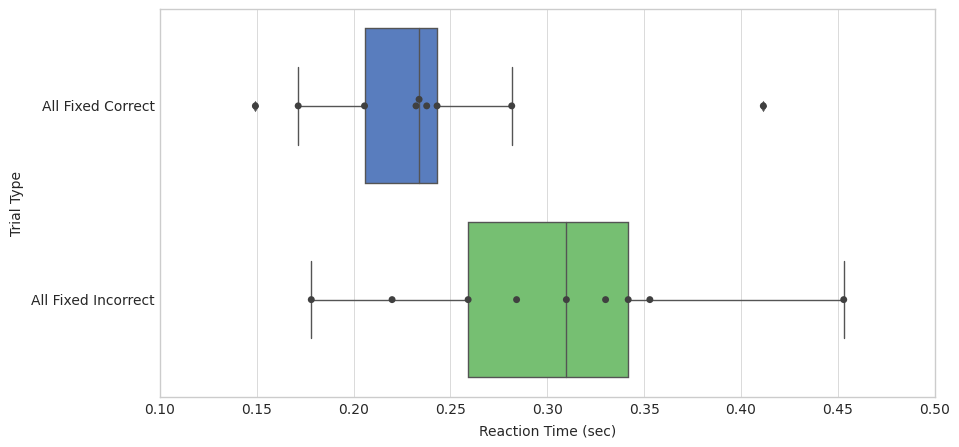

In [37]:
print 'All Fixed Correct:', np.mean(df2_2['all_fixed_corr'])
print 'SD:', np.std(df2_2['all_fixed_corr'])
print 'FC b4 CI RT:', np.mean(df2_2['all_fixed_incorr'])
print 'SD:', np.std(df2_2['all_fixed_incorr'])

print ""
print "Test for Normacy of Distributions"
print "FC b4 CC Normal Test:", stats.shapiro(df2_2['all_fixed_corr'])
print "FC b4 CI Normal Test:", stats.shapiro(df2_2['all_fixed_incorr'])

print ""
print "*All distributions are normal -- Use Parametric t-Test"
print "F Corr vs Incorr:", stats.ttest_rel(df2_2['all_fixed_corr'], df2_2['all_fixed_incorr'])[:]

N = 2
conditions = ['All Fixed Correct', 'All Fixed Incorrect']

means_allsubjs = [df2_2['all_fixed_corr'], df2_2['all_fixed_incorr']]  
ind = np.arange(N)
fig, ax = plt.subplots(figsize = (10,5))
ax = sns.boxplot(data=means_allsubjs, orient='h')
ax = sns.swarmplot(data=means_allsubjs, color='.25', orient='h')
ax.set_yticks(ind)
ax.set_yticklabels(conditions)
ax.set_ylabel("Trial Type")
ax.set_xlabel("Reaction Time (sec)")
plt.show()

## Third Analysis 
### Counts, Performance, and RT for 
#### fixed before corr/incorr conditional
#### Fixed pairs -- same (AA & CC)
#### Fixed pairs -- change (AC & CA)
#### "Lost" fixed -- fixed followed by BL trial
#### Nonresponse

In [58]:
import os
from os.path import join
import numpy as np
import pandas as pd
from glob import glob
from math import sqrt
%matplotlib inline
import seaborn as sns
sns.set_palette('muted')
sns.set_style("darkgrid")
import matplotlib.pyplot as plt
from scipy import stats

subs = ['CAT1_001', 'CAT1_002', 'CAT1_003', 'CAT1_004', 'CAT1_005',
        'CAT1_006', 'CAT1_007', 'CAT1_008', 'CAT1_009']

count_table = {}
ctstd_table = {}
rt_table = {}
rtstd_table = {}

for sub in subs:
    ct_dict = {}
    rt_dict = {}
    sub_dir = '/home/data/madlab/data/behav/CAT1/'.format(sub)
    dir_file = join(sub_dir, '{0}.csv'.format(sub))  
    
    sub_file = pd.read_csv(dir_file)
    # Creates new array sans gaps in csv file
    run = sub_file.query('trial_acc == 0 or trial_acc == 1')
      
    trialtype = run['stim_ID'].values
    correct = run['trial_acc'].values 
    response = run['resp_trial_1.keys'].values
    #print "1", trialtype
    trial_shift = trialtype[:-1] 
    trial_shift = np.insert(trial_shift, 0, -1)
    #print "2", trial_shift
    
    correct_shift = correct[:-1]
    correct_shift = np.insert(correct_shift, 0, -1)
                 
    FC_CC_same1 = np.where((trial_shift == 'S2F2') & (correct_shift == 1) & (trialtype == 'S1_C') & (correct == 1))[0]
    FC_CC_same2 = np.where((trial_shift == 'S2F1') & (correct_shift == 1) & (trialtype == 'S1_C') & (correct == 1))[0]    
    FC_CC_same3 = np.where((trial_shift == 'S1F1') & (correct_shift == 1) & (trialtype == 'S2_C') & (correct == 1))[0]    
    FC_CC_same4 = np.where((trial_shift == 'S1F2') & (correct_shift == 1) & (trialtype == 'S2_C') & (correct == 1))[0]
    
    FI_CC_same1 = np.where((trial_shift == 'S2F2') & (correct_shift == 0) & (trialtype == 'S1_C') & (correct == 1))[0]
    FI_CC_same2 = np.where((trial_shift == 'S2F1') & (correct_shift == 0) & (trialtype == 'S1_C') & (correct == 1))[0]    
    FI_CC_same3 = np.where((trial_shift == 'S1F1') & (correct_shift == 0) & (trialtype == 'S2_C') & (correct == 1))[0]    
    FI_CC_same4 = np.where((trial_shift == 'S1F2') & (correct_shift == 0) & (trialtype == 'S2_C') & (correct == 1))[0]
    
    FC_CI_same1 = np.where((trial_shift == 'S2F2') & (correct_shift == 1) & (trialtype == 'S1_C') & (correct == 0))[0]
    FC_CI_same2 = np.where((trial_shift == 'S2F1') & (correct_shift == 1) & (trialtype == 'S1_C') & (correct == 0))[0]    
    FC_CI_same3 = np.where((trial_shift == 'S1F1') & (correct_shift == 1) & (trialtype == 'S2_C') & (correct == 0))[0]    
    FC_CI_same4 = np.where((trial_shift == 'S1F2') & (correct_shift == 1) & (trialtype == 'S2_C') & (correct == 0))[0]

    FI_CI_same1 = np.where((trial_shift == 'S2F2') & (correct_shift == 0) & (trialtype == 'S1_C') & (correct == 0))[0]
    FI_CI_same2 = np.where((trial_shift == 'S2F1') & (correct_shift == 0) & (trialtype == 'S1_C') & (correct == 0))[0]    
    FI_CI_same3 = np.where((trial_shift == 'S1F1') & (correct_shift == 0) & (trialtype == 'S2_C') & (correct == 0))[0]    
    FI_CI_same4 = np.where((trial_shift == 'S1F2') & (correct_shift == 0) & (trialtype == 'S2_C') & (correct == 0))[0]

    same_FC_CC = sorted(np.concatenate((FC_CC_same1, FC_CC_same2, FC_CC_same3, FC_CC_same4), axis=None))
    same_FI_CC = sorted(np.concatenate((FI_CC_same1, FI_CC_same2, FI_CC_same3, FI_CC_same4), axis=None))
    same_FC_CI = sorted(np.concatenate((FC_CI_same1, FC_CI_same2, FC_CI_same3, FC_CI_same4), axis=None))
    same_FI_CI = sorted(np.concatenate((FI_CI_same1, FI_CI_same2, FI_CI_same3, FI_CI_same4), axis=None))
    
    
    FC_CC_change1 = np.where((trial_shift == 'S2F2') & (correct_shift == 1) & (trialtype == 'S2_C') & (correct == 1))[0]
    FC_CC_change2 = np.where((trial_shift == 'S2F1') & (correct_shift == 1) & (trialtype == 'S2_C') & (correct == 1))[0]    
    FC_CC_change3 = np.where((trial_shift == 'S1F1') & (correct_shift == 1) & (trialtype == 'S1_C') & (correct == 1))[0]    
    FC_CC_change4 = np.where((trial_shift == 'S1F2') & (correct_shift == 1) & (trialtype == 'S1_C') & (correct == 1))[0]
    
    FI_CC_change1 = np.where((trial_shift == 'S2F2') & (correct_shift == 0) & (trialtype == 'S2_C') & (correct == 1))[0]
    FI_CC_change2 = np.where((trial_shift == 'S2F1') & (correct_shift == 0) & (trialtype == 'S2_C') & (correct == 1))[0]    
    FI_CC_change3 = np.where((trial_shift == 'S1F1') & (correct_shift == 0) & (trialtype == 'S1_C') & (correct == 1))[0]    
    FI_CC_change4 = np.where((trial_shift == 'S1F2') & (correct_shift == 0) & (trialtype == 'S1_C') & (correct == 1))[0]
    
    FC_CI_change1 = np.where((trial_shift == 'S2F2') & (correct_shift == 1) & (trialtype == 'S2_C') & (correct == 0))[0]
    FC_CI_change2 = np.where((trial_shift == 'S2F1') & (correct_shift == 1) & (trialtype == 'S2_C') & (correct == 0))[0]    
    FC_CI_change3 = np.where((trial_shift == 'S1F1') & (correct_shift == 1) & (trialtype == 'S1_C') & (correct == 0))[0]    
    FC_CI_change4 = np.where((trial_shift == 'S1F2') & (correct_shift == 1) & (trialtype == 'S1_C') & (correct == 0))[0]

    FI_CI_change1 = np.where((trial_shift == 'S2F2') & (correct_shift == 0) & (trialtype == 'S2_C') & (correct == 0))[0]
    FI_CI_change2 = np.where((trial_shift == 'S2F1') & (correct_shift == 0) & (trialtype == 'S2_C') & (correct == 0))[0]    
    FI_CI_change3 = np.where((trial_shift == 'S1F1') & (correct_shift == 0) & (trialtype == 'S1_C') & (correct == 0))[0]    
    FI_CI_change4 = np.where((trial_shift == 'S1F2') & (correct_shift == 0) & (trialtype == 'S1_C') & (correct == 0))[0]

    change_FC_CC = sorted(np.concatenate((FC_CC_change1, FC_CC_change2, FC_CC_change3, FC_CC_change4), axis=None))
    change_FI_CC = sorted(np.concatenate((FI_CC_change1, FI_CC_change2, FI_CC_change3, FI_CC_change4), axis=None))
    change_FC_CI = sorted(np.concatenate((FC_CI_change1, FC_CI_change2, FC_CI_change3, FC_CI_change4), axis=None))
    change_FI_CI = sorted(np.concatenate((FI_CI_change1, FI_CI_change2, FI_CI_change3, FI_CI_change4), axis=None))
                
    RTs = run['resp_trial_1.rt']   
         
    same_FC_CC_RTs = RTs.values[same_FC_CC]
    same_FI_CC_RTs = RTs.values[same_FI_CC] 
    same_FC_CI_RTs = RTs.values[same_FC_CI]
    same_FI_CI_RTs = RTs.values[same_FI_CI]
    
    change_FC_CC_RTs = RTs.values[change_FC_CC]
    change_FI_CC_RTs = RTs.values[change_FI_CC] 
    change_FC_CI_RTs = RTs.values[change_FC_CI]
    change_FI_CI_RTs = RTs.values[change_FI_CI]
       
    for curr_type in ['same', 'change']:
        for acc in ['FC_CC', 'FC_CI', 'FI_CC', 'FI_CI']:
            curr_name = '{0}_{1}'.format(curr_type, acc)
            if curr_type != 'NR':
                rt_name = '{0}_{1}_RTs'.format(curr_type, acc)
            if not curr_name in ct_dict:
                ct_dict[curr_name] = []             
            ct_dict[curr_name].append(len(eval(curr_name)))
        
            if not rt_name in rt_dict:
                rt_dict[rt_name] = []
            rt_eval = eval(rt_name)  
            # Remove NaN from counts
            rt_notNaN = np.where(rt_eval >= 0)
            rt_notNaN = rt_eval[rt_notNaN[0]]           
            if rt_notNaN.shape[0] == 0:
                rt_dict[rt_name].append(None)                       
            else:
                rt_dict[rt_name].append(np.average(rt_notNaN))      
            # Remove NaN from RT calculations
            rt_notNaN = np.where(rt_eval >= 0)
            rt_notNaN = rt_eval[rt_notNaN[0]]           
            if rt_notNaN.shape[0] == 0:
                rt_dict[rt_name].append(None)                       
            else:
                rt_dict[rt_name].append(np.average(rt_notNaN))    
             
    for key in ct_dict:
        ct_dict[key] = np.sum(ct_dict[key])
        if not key in count_table:
            count_table[key] = []
        count_table[key].append(ct_dict[key])
              
    for key in rt_dict:
        rt_notNONE = np.where(np.array(rt_dict[key]) >= 0)
        rt_dict[key] = np.average(np.array(rt_dict[key])[rt_notNONE[0]])
        if not key in rt_table:
            rt_table[key] = []
        rt_table[key].append(rt_dict[key])
        
df_3 = pd.DataFrame(count_table, index = subs) 
df2_3 = pd.DataFrame(rt_table, index = subs) 

/home/data/madlab/envs/wmaze_madlab_env/lib/python2.7/site-packages/ipykernel/__main__.py:121: RuntimeWarning: invalid value encountered in greater_equal
/home/data/madlab/envs/wmaze_madlab_env/lib/python2.7/site-packages/ipykernel/__main__.py:128: RuntimeWarning: invalid value encountered in greater_equal


In [59]:
ct_avg = {}
ct_std = {}

for curr_key in count_table:
    ct_avg[curr_key] = np.average(count_table[curr_key])
    ct_std[curr_key] = np.std(count_table[curr_key])
    
count_average_3 = pd.DataFrame(ct_avg, index = (1,))
count_std_3 = pd.DataFrame(ct_std, index = (1,))

In [60]:
count_average_3

change_FC_CC  change_FC_CI  change_FI_CC  change_FI_CI  same_FC_CC  \
1         112.0          52.0      8.555556      9.888889        96.0   

   same_FC_CI  same_FI_CC  same_FI_CI  
1        64.0         9.0    8.555556

In [61]:
count_std_3

change_FC_CC  change_FC_CI  change_FI_CC  change_FI_CI  same_FC_CC  \
1      22.08066     17.088007      4.297573      5.743488   22.910454   

   same_FC_CI  same_FI_CC  same_FI_CI  
1    16.95091    5.754226    3.166179

In [62]:
df_3

change_FC_CC  change_FC_CI  change_FI_CC  change_FI_CI  same_FC_CC  \
CAT1_001            88            75             5            11          67   
CAT1_002           142            51             8            13          92   
CAT1_003            85            60            16            24          68   
CAT1_004           131            30            14            10         113   
CAT1_005           128            32             4             4         138   
CAT1_006           125            47             7             7          79   
CAT1_007            95            75             5             4         122   
CAT1_008            84            66            13             9          97   
CAT1_009           130            32             5             7          88   

          same_FC_CI  same_FI_CC  same_FI_CI  
CAT1_001          92           8          14  
CAT1_002          43           5           6  
CAT1_003          75          21          11  
CAT1_004          47           5          10  
CAT1_005          46           2           6  
CAT1_006          71          13          11  
CAT1_007          51           5           3  
CAT1_008          67          15           9  
CAT1_009          84           7           7

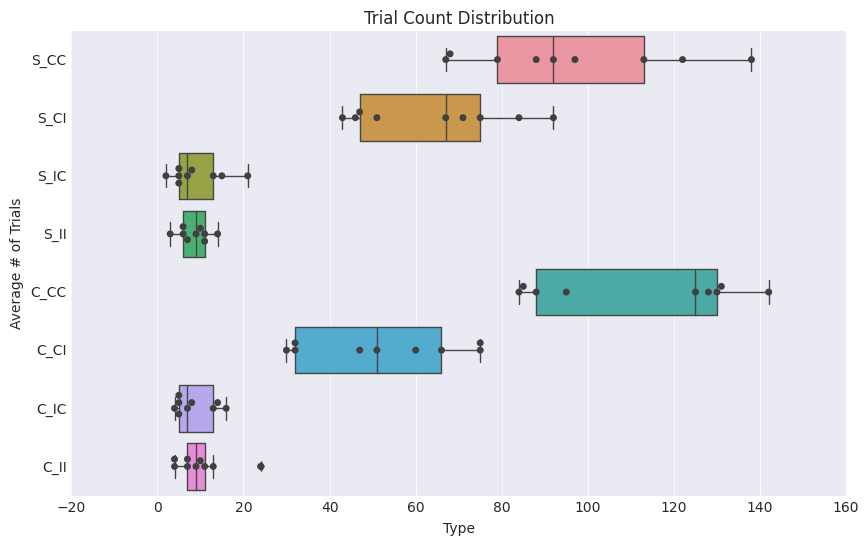

In [63]:
N = 8
conditions = ['S_CC', 'S_CI', 'S_IC', 'S_II', 'C_CC', 'C_CI', 'C_IC', 'C_II']

means_allsubjs = [df_3['same_FC_CC'], df_3['same_FC_CI'], df_3['same_FI_CC'], df_3['same_FI_CI'],
                  df_3['change_FC_CC'], df_3['change_FC_CI'], df_3['change_FI_CC'], df_3['change_FI_CI']]  
ind = np.arange(N)
fig, ax = plt.subplots(figsize=(10,6))
ax = sns.boxplot(data=means_allsubjs, orient = 'h')
ax = sns.swarmplot(data=means_allsubjs, color='.25', orient = 'h')
ax.set_yticks(ind)
ax.set_yticklabels(conditions)
ax.set_ylabel('Average # of Trials')
ax.set_xlabel('Type')
ax.set_title('Trial Count Distribution')
plt.show()

same_CC = 0.266666666667
same_CI = 0.177777777778
same_IC = 0.025
same_II = 0.0237654320988
change_CC = 0.311111111111
change_CI = 0.144444444444
change_IC = 0.0237654320988
change_II = 0.0274691358025


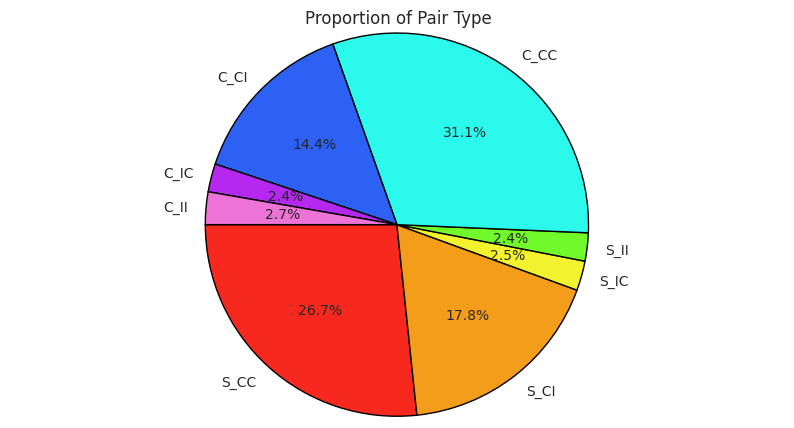

In [65]:
import matplotlib
matplotlib.axes.Axes.pie
matplotlib.pyplot.pie

tot = [np.mean(df_3['same_FC_CC']), np.mean(df_3['same_FC_CI']),
       np.mean(df_3['same_FI_CC']), np.mean(df_3['same_FI_CI']), 
       np.mean(df_3['change_FC_CC']), np.mean(df_3['change_FC_CI']), 
       np.mean(df_3['change_FI_CC']), np.mean(df_3['change_FI_CI'])]
tot = sum(tot)

print "same_CC: ", np.mean(df_3['same_FC_CC'])/tot 
print "same_CI: ", np.mean(df_3['same_FC_CI'])/tot
print "same_IC: ", np.mean(df_3['same_FI_CC'])/tot 
print "same_II: ", np.mean(df_3['same_FI_CI'])/tot
print "change_CC: ", np.mean(df_3['change_FC_CC'])/tot 
print "change_CI: ", np.mean(df_3['change_FC_CI'])/tot
print "change_IC: ", np.mean(df_3['change_FI_CC'])/tot 
print "change_II: ", np.mean(df_3['change_FI_CI'])/tot

N = 8
labels = ['S_CC', 'S_CI', 'S_IC', 'S_II', 'C_CC', 'C_CI', 'C_IC', 'C_II']
colors = ['#f7281d', '#f49d1a', '#f2f22e', '#71f92c', '#2bf9eb', '#2c61f4', '#b428ef', '#ed74d6']

means_allsubjs = [np.mean(df_3['same_FC_CC'])/tot, np.mean(df_3['same_FC_CI'])/tot,
                  np.mean(df_3['same_FI_CC'])/tot, np.mean(df_3['same_FI_CI'])/tot,
                  np.mean(df_3['change_FC_CC'])/tot, np.mean(df_3['change_FC_CI'])/tot,
                  np.mean(df_3['change_FI_CC'])/tot, np.mean(df_3['change_FI_CI'])/tot]
fig, ax = plt.subplots(figsize = (10,5))
ax.pie(means_allsubjs, labels = labels, colors = colors, autopct='%1.1f%%', startangle = 180)
ax.axis('equal')
ax.set_title('Proportion of Pair Type')
plt.show()

Frst Same Corr Prop: 0.596622211691
SD: 0.111580250681
Frst Same Incorr Prop: 0.48327020202
SD: 0.135736727671

Test for Normacy of Distributions
Frst Same Corr Normal Test: (0.9215871691703796, 0.4055430293083191)
Frst Same Incorr Normal Test: (0.9352468848228455, 0.5328479409217834)

Frst Same Corr vs Incorr: (1.5837076108804247, 0.15191893783707941)


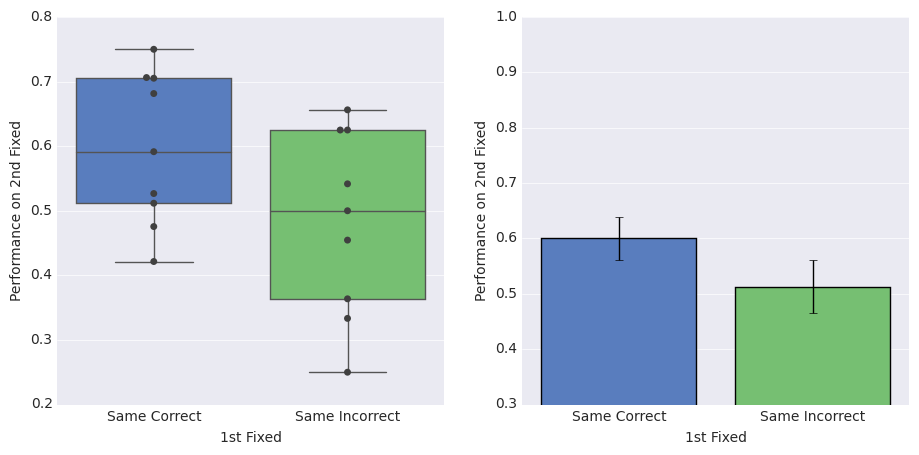

In [71]:
frst_corr_prop = df_3['same_FC_CC']/(df_3['same_FC_CC']+df_3['same_FC_CI'])
frst_incorr_prop = df_3['same_FI_CC']/(df_3['same_FI_CC']+df_3['same_FI_CI'])
#remove NaNs
#frst_incorr_prop2 = [frst_incorr_prop2 for frst_incorr_prop2 in frst_incorr_prop2 if str(frst_incorr_prop2) != 'nan']
print "Frst Same Corr Prop:", np.mean(frst_corr_prop)
print "SD:", np.std(frst_corr_prop)
print "Frst Same Incorr Prop:", np.mean(frst_incorr_prop)
print "SD:", np.std(frst_incorr_prop)
print ""
print "Test for Normacy of Distributions"
print "Frst Same Corr Normal Test:", stats.shapiro(frst_corr_prop)
print "Frst Same Incorr Normal Test:", stats.shapiro(frst_incorr_prop)
print ""
print "Frst Same Corr vs Incorr:", stats.ttest_rel(frst_corr_prop, frst_incorr_prop)[:]

N = 2
conditions = ['Same Correct', 'Same Incorrect']
ind = np.arange(N)

allsubjs = [frst_corr_prop, frst_incorr_prop] 

means_allsubjs = [df_3['same_FC_CC'].mean()/(df_3['same_FC_CC'].mean()+df_3['same_FC_CI'].mean()),
                  df_3['same_FI_CC'].mean()/(df_3['same_FI_CC'].mean()+df_3['same_FI_CI'].mean())]  
sem_allsubjs= [(df_3['same_FC_CC']/(df_3['same_FC_CC']+df_3['same_FC_CI'])).std()/(np.sqrt(len(subs))),
               (df_3['same_FI_CC']/(df_3['same_FI_CC']+df_3['same_FI_CI'])).std()/(np.sqrt(len(subs)))]

fig, ax = plt.subplots(ncols = 2, figsize=(11, 5), sharex = True, sharey = False) 
sns.boxplot(data=allsubjs, ax=ax[0])
sns.swarmplot(data=allsubjs, color='.25', ax=ax[0])

ax[0].set_xticks(ind)
ax[0].set_xticklabels(conditions)
ax[0].set_xlabel('1st Fixed')
ax[0].set_ylabel('Performance on 2nd Fixed')

sns.barplot(ind, means_allsubjs, yerr = sem_allsubjs, ecolor = 'black', ax=ax[1])
ax[1].set_xticks(ind)
ax[1].set_xticklabels(conditions)
ax[1].set_xlabel('1st Fixed')
ax[1].set_ylim(0.3, 1.0)
ax[1].set_ylabel('Performance on 2nd Fixed')

plt.show()

Frst Change Corr: 0.680392993337
Frst Change Incorr: 0.471101891935

Test for Normacy of Distributions
Frst Change Corr Normal Test: (0.8283703923225403, 0.04281329736113548)
Frst Change Incorr Normal Test: (0.9340187907218933, 0.5205272436141968)

Frst Change Corr vs Incorr: (4.408084749979694, 0.0022621847447467556)


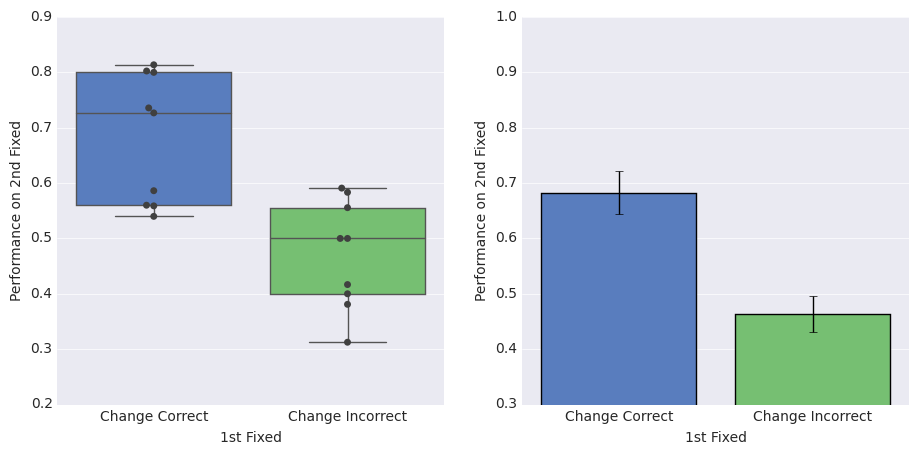

In [74]:
frst_corr_prop2 =  df_3['change_FC_CC']/(df_3['change_FC_CC']+df_3['change_FC_CI'])
frst_incorr_prop2 = df_3['change_FI_CC']/(df_3['change_FI_CC']+df_3['change_FI_CI'])
print "Frst Change Corr:", np.mean(frst_corr_prop2)
print "Frst Change Incorr:", np.mean(frst_incorr_prop2)
print ""
print "Test for Normacy of Distributions"
print "Frst Change Corr Normal Test:", stats.shapiro(frst_corr_prop2)
print "Frst Change Incorr Normal Test:", stats.shapiro(frst_incorr_prop2)
print ""
print "Frst Change Corr vs Incorr:", stats.ttest_rel(frst_corr_prop2, frst_incorr_prop2)[:]

N = 2
conditions = ['Change Correct', 'Change Incorrect']
ind = np.arange(N)

allsubjs = [frst_corr_prop2, frst_incorr_prop2]
means_allsubjs = [df_3['change_FC_CC'].mean()/(df_3['change_FC_CC'].mean()+df_3['change_FC_CI'].mean()),
                  df_3['change_FI_CC'].mean()/(df_3['change_FI_CC'].mean()+df_3['change_FI_CI'].mean())]  
sem_allsubjs= [(df_3['change_FC_CC']/(df_3['change_FC_CC']+df_3['change_FC_CI'])).std()/(np.sqrt(len(subs))),
               (df_3['change_FI_CC']/(df_3['change_FI_CC']+df_3['change_FI_CI'])).std()/(np.sqrt(len(subs)))]
                    

fig, ax = plt.subplots(ncols = 2, figsize=(11, 5), sharex = True, sharey = False) 
sns.boxplot(data=allsubjs, ax=ax[0])
sns.swarmplot(data=allsubjs, color='.25', ax=ax[0])
ax[0].set_xticks(ind)
ax[0].set_xticklabels(conditions)
ax[0].set_xlabel('1st Fixed')
ax[0].set_ylabel('Performance on 2nd Fixed')

sns.barplot(ind, means_allsubjs, yerr = sem_allsubjs, ecolor = 'black', ax=ax[1])
ax[1].set_xticks(ind)
ax[1].set_xticklabels(conditions)
ax[1].set_xlabel('1st Fixed')
ax[1].set_ylim(0.3, 1.0)
ax[1].set_ylabel('Performance on 2nd Fixed')

plt.show()

In [75]:
rt_average_3 ={}
rt_std_3 = {}

for curr_key in rt_table:
    rt_average_3[curr_key] = np.average(rt_table[curr_key])
    rt_std_3[curr_key] = np.std(rt_table[curr_key])
    
RT_average_3 = pd.DataFrame(rt_average_3, index = (1,))
RT_std_3 = pd.DataFrame(rt_std_3, index = (1,))

In [76]:
RT_average_3

change_FC_CC_RTs  change_FC_CI_RTs  change_FI_CC_RTs  change_FI_CI_RTs  \
1          0.249325          0.279498          0.312761          0.289458   

   same_FC_CC_RTs  same_FC_CI_RTs  same_FI_CC_RTs  same_FI_CI_RTs  
1        0.258059        0.279682        0.291404        0.296335

In [78]:
RT_std_3

change_FC_CC_RTs  change_FC_CI_RTs  change_FI_CC_RTs  change_FI_CI_RTs  \
1          0.063129          0.077163          0.090266          0.093228   

   same_FC_CC_RTs  same_FC_CI_RTs  same_FI_CC_RTs  same_FI_CI_RTs  
1        0.057507        0.080308        0.114146        0.089604

In [79]:
df2_3

change_FC_CC_RTs  change_FC_CI_RTs  change_FI_CC_RTs  \
CAT1_001          0.266252          0.283912          0.448951   
CAT1_002          0.252380          0.281263          0.248423   
CAT1_003          0.147875          0.128147          0.184476   
CAT1_004          0.391352          0.420734          0.405690   
CAT1_005          0.238123          0.333511          0.369313   
CAT1_006          0.194295          0.255301          0.310010   
CAT1_007          0.286811          0.320214          0.388979   
CAT1_008          0.228825          0.287016          0.266052   
CAT1_009          0.238013          0.205387          0.192952   

          change_FI_CI_RTs  same_FC_CC_RTs  same_FC_CI_RTs  same_FI_CC_RTs  \
CAT1_001          0.299068        0.283188        0.265940        0.358646   
CAT1_002          0.288395        0.251930        0.274930        0.166220   
CAT1_003          0.146979        0.155414        0.144279        0.114602   
CAT1_004          0.502194        0.375047        0.437814        0.478790   
CAT1_005          0.298970        0.246353        0.318730        0.352950   
CAT1_006          0.283486        0.198696        0.232681        0.353995   
CAT1_007          0.344148        0.291792        0.364688        0.375235   
CAT1_008          0.215199        0.265753        0.249764        0.250256   
CAT1_009          0.226683        0.254354        0.228312        0.171939   

          same_FI_CI_RTs  
CAT1_001        0.392582  
CAT1_002        0.227548  
CAT1_003        0.154346  
CAT1_004        0.464412  
CAT1_005        0.333271  
CAT1_006        0.211435  
CAT1_007        0.319329  
CAT1_008        0.268918  
CAT1_009        0.295171

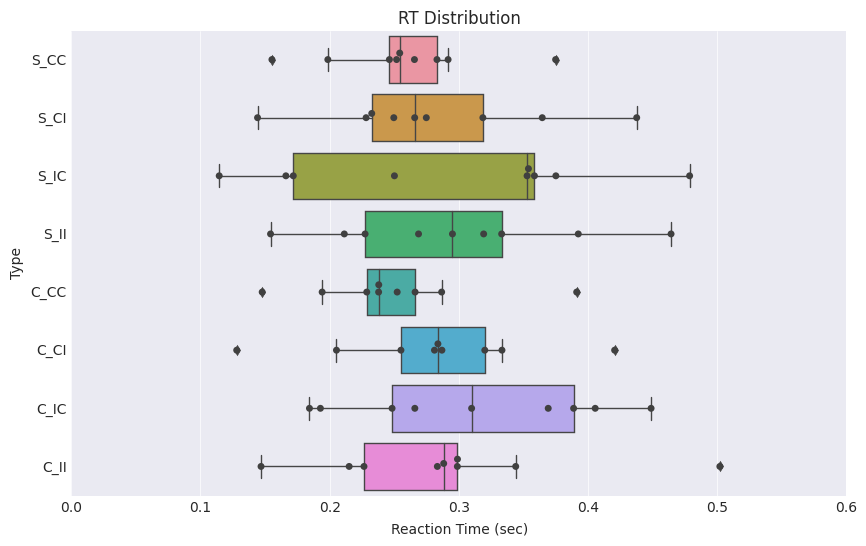

In [80]:
N = 8
conditions = ['S_CC', 'S_CI', 'S_IC', 'S_II', 'C_CC', 'C_CI', 'C_IC', 'C_II']

RTs_allsubjs = [df2_3['same_FC_CC_RTs'],
                df2_3['same_FC_CI_RTs'],
                df2_3['same_FI_CC_RTs'],
                df2_3['same_FI_CI_RTs'],
                df2_3['change_FC_CC_RTs'],
                df2_3['change_FC_CI_RTs'],
                df2_3['change_FI_CC_RTs'],
                df2_3['change_FI_CI_RTs']] 
ind = np.arange(N)
fig, ax = plt.subplots(figsize=(10,6))
ax = sns.boxplot(data=RTs_allsubjs, orient = 'h')
ax = sns.swarmplot(data=RTs_allsubjs, color='.25', orient = 'h')
ax.set_yticks(ind)
ax.set_yticklabels(conditions)
ax.set_xlabel('Reaction Time (sec)')
ax.set_ylabel('Type')
ax.set_title('RT Distribution')
plt.show()

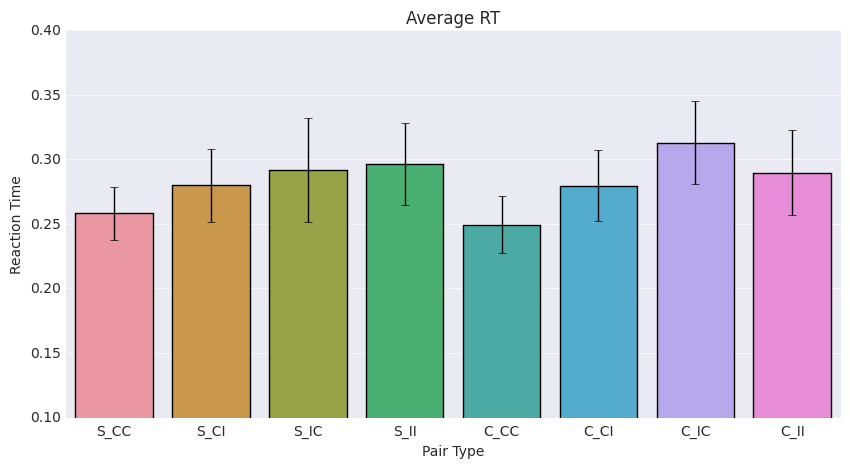

In [86]:
N = 8
conditions = ['S_CC', 'S_CI', 'S_IC', 'S_II', 'C_CC', 'C_CI', 'C_IC', 'C_II']
means_allsubjs = [df2_3['same_FC_CC_RTs'].mean(), df2_3['same_FC_CI_RTs'].mean(),
                  df2_3['same_FI_CC_RTs'].mean(), df2_3['same_FI_CI_RTs'].mean(),
                  df2_3['change_FC_CC_RTs'].mean(), df2_3['change_FC_CI_RTs'].mean(),
                  df2_3['change_FI_CC_RTs'].mean(), df2_3['change_FI_CI_RTs'].mean()]  

sem_allsubjs = [df2_3['same_FC_CC_RTs'].std()/(np.sqrt(len(subs))),df2_3['same_FC_CI_RTs'].std()/(np.sqrt(len(subs))),
                df2_3['same_FI_CC_RTs'].std()/(np.sqrt(len(subs))),df2_3['same_FI_CI_RTs'].std()/(np.sqrt(len(subs))),
                df2_3['change_FC_CC_RTs'].std()/(np.sqrt(len(subs))),df2_3['change_FC_CI_RTs'].std()/(np.sqrt(len(subs))),
                df2_3['change_FI_CC_RTs'].std()/(np.sqrt(len(subs))),df2_3['change_FI_CI_RTs'].std()/(np.sqrt(len(subs)))]
ind = np.arange(N)
width = 0.5
fig, ax = plt.subplots(figsize = (10,5))
ax = sns.barplot(ind, means_allsubjs, yerr = sem_allsubjs, ecolor = 'black')
ax.set_ylim(0.1,0.4)
ax.set_xticks(ind)
ax.set_xticklabels(conditions)
ax.set_xlabel("Pair Type")
ax.set_ylabel("Reaction Time")
ax.set_title("Average RT")
plt.show()

Same RT: 0.281369792928
SD: 0.0791725223796
Change RT: 0.282760540531
SD: 0.0791725223796
Same vs Change RT: (-0.24770330269268778, 0.81060312736475648)

Same 1st Corr RT: 0.268870413702
SD: 0.0671427029899
Change 1st Corr RT: 0.264411708949
SD: 0.0671427029899
Same vs Change 1st Correct RT: (1.1600073745684127, 0.27949191539046059)


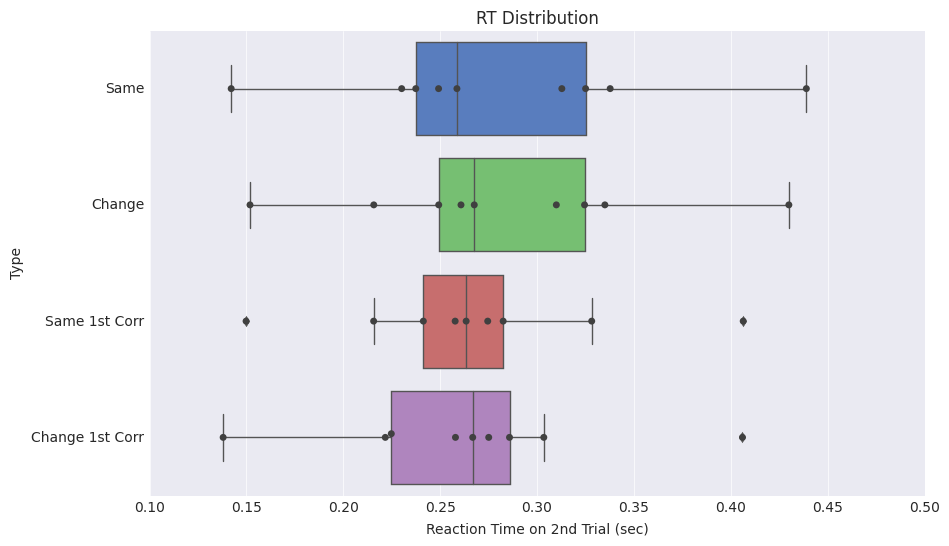

In [87]:
same_all_RT = df2_3[['same_FC_CC_RTs', 'same_FC_CI_RTs', 'same_FI_CC_RTs', 'same_FI_CI_RTs']].mean(axis=1)
same_frst_corr_RT = df2_3[['same_FC_CC_RTs', 'same_FC_CI_RTs']].mean(axis=1)
change_all_RT = df2_3[['change_FC_CC_RTs', 'change_FC_CI_RTs', 'change_FI_CC_RTs', 'change_FI_CI_RTs']].mean(axis=1)
change_frst_corr_RT = df2_3[['change_FC_CC_RTs', 'change_FC_CI_RTs']].mean(axis=1)
print "Same RT:", np.mean(same_all_RT)
print "SD:", np.std(same_all_RT)
print "Change RT:", np.mean(change_all_RT) 
print "SD:", np.std(same_all_RT)
print "Same vs Change RT:", stats.ttest_rel(same_all_RT, change_all_RT)[:]
print ""
print "Same 1st Corr RT:", np.mean(same_frst_corr_RT)
print "SD:", np.std(same_frst_corr_RT)
print "Change 1st Corr RT:", np.mean(change_frst_corr_RT) 
print "SD:", np.std(same_frst_corr_RT)
print "Same vs Change 1st Correct RT:", stats.ttest_rel(same_frst_corr_RT, change_frst_corr_RT)[:]
    
N = 4
conditions = ['Same', 'Change', 'Same 1st Corr', 'Change 1st Corr']

RTs_allsubjs = [same_all_RT, change_all_RT, same_frst_corr_RT, change_frst_corr_RT] 
ind = np.arange(N)
fig, ax = plt.subplots(figsize=(10,6))
ax = sns.boxplot(data=RTs_allsubjs, orient = 'h')
ax = sns.swarmplot(data=RTs_allsubjs, color='.25', orient = 'h')
ax.set_yticks(ind)
ax.set_yticklabels(conditions)
ax.set_xlabel('Reaction Time on 2nd Trial (sec)')
ax.set_ylabel('Type')
ax.set_title('RT Distribution')
plt.show()

# Learning Behavior

In [9]:
%matplotlib inline
import os
from os.path import join
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
from pylab import *
subs = ['CAT1_001']
#subs = ['CAT1_001', 'CAT1_002', 'CAT1_003', 'CAT1_004', 'CAT1_005', 'CAT1_006', 'CAT1_007', 'CAT1_008', 'CAT1_009']
stims = ['S1F1', 'S1F2', 'S2F1', 'S2F2', 'S1_C', 'S2_C']
sets = ['1', '2', '3']

for sub in subs:
    curr_dir = '/home/data/madlab/data/behav/CAT1/learning_curve/{0}/'.format(sub)
    plot_dict = {'pmode':[], 'p05':[], 'p95':[]}
    for curr_stim in stims:
        for curr_set in sets:
            pmode_filename = curr_dir + '{0}_pmode_set{1}.txt'.format(curr_stim, curr_set)
            p95_filename = curr_dir + '{0}_p95_set{1}.txt'.format(curr_stim, curr_set) 
            p05_filename = curr_dir + '{0}_p05_set{1}.txt'.format(curr_stim, curr_set)
            plot_dict['pmode'].append(np.genfromtxt(pmode_filename))        
            plot_dict['p05'].append(np.genfromtxt(p05_filename))
            plot_dict['p95'].append(np.genfromtxt(p95_filename))
    print plot_dict ['pmode']
              
    '''        
    x = range(len(pmode))
    chance = np.ones(len(x)) * 0.5

    fig, ax = plt.subplots(figsize=(8, 4))
    ax.plot(x, pmode, "#B266FF", linewidth = 3)
    ax.fill_between(x, p95, p05, color = "#B266FF", alpha = 0.2)
    ax.plot(x, chance, 'b', linewidth = 1)

    ax.set_ylim(0,1)
    ax.set_xlabel('Trials')
    ax.set_ylabel('Probability of Correct Response')

    print 'Subject ' + sub
    print 'Set ' + curr_set
    print 'Stimulus ' + curr_stim
    plt.show()  
    '''

[array([ 0.5   ,  0.7261,  0.8033,  0.853 ,  0.8853,  0.9068,  0.9214,
        0.9314,  0.9379,  0.9418,  0.9435,  0.9429,  0.9399,  0.9339,
        0.9238,  0.9076,  0.9143,  0.9179,  0.918 ,  0.9143,  0.9057,
        0.9209,  0.9322,  0.9405,  0.9463,  0.9502,  0.9522,  0.9526,
        0.9512,  0.9477,  0.9413,  0.951 ,  0.959 ,  0.9654,  0.9705,
        0.9746,  0.9778,  0.9804,  0.9825,  0.9842,  0.9856,  0.9867,
        0.9875,  0.9882,  0.9887,  0.989 ,  0.9892,  0.9892,  0.9891,
        0.9888,  0.9884,  0.9878,  0.9869,  0.9857,  0.9841,  0.982 ,
        0.9792,  0.9755,  0.9704,  0.9634,  0.9699]), array([ 0.5   ,  0.5228,  0.5452,  0.5588,  0.5636,  0.5592,  0.566 ,
        0.5841,  0.5935,  0.6145,  0.6465,  0.6705,  0.705 ,  0.7321,
        0.7532,  0.7693,  0.7949,  0.8158,  0.8328,  0.8467,  0.858 ,
        0.8671,  0.8744,  0.88  ,  0.8841,  0.895 ,  0.9043,  0.9122,
        0.9191,  0.9249,  0.93  ,  0.9343,  0.9381,  0.9413,  0.944 ,
        0.9463,  0.9482,  0.9497,  

Subject CAT1_001
Set 1
Stimulus S1F1


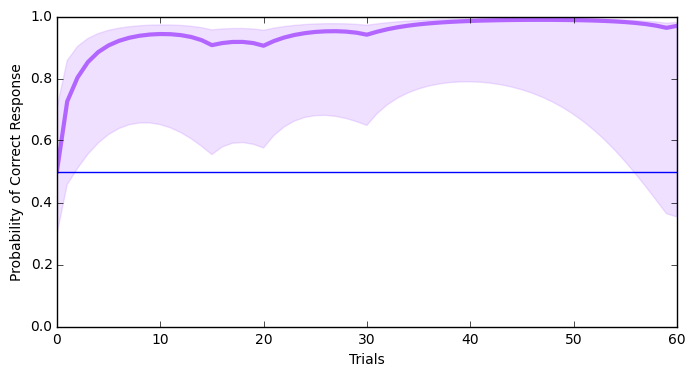

Subject CAT1_001
Set 1
Stimulus S1F2


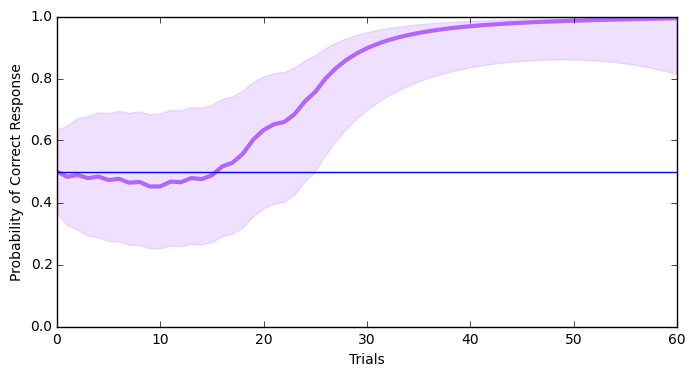

Subject CAT1_001
Set 1
Stimulus S2F1


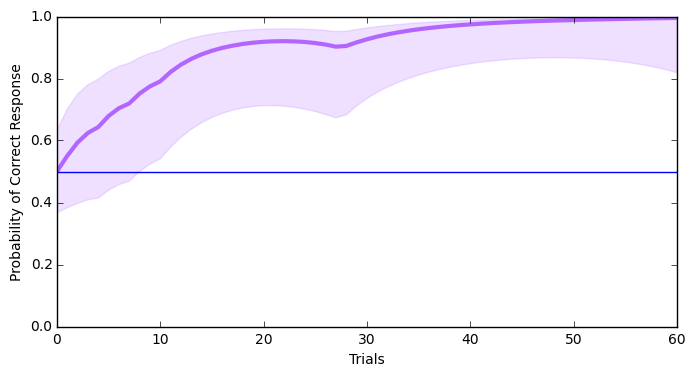

Subject CAT1_001
Set 1
Stimulus S2F2


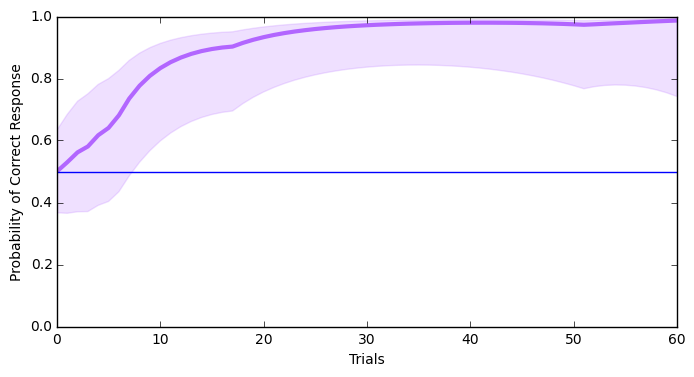

Subject CAT1_001
Set 1
Stimulus S1_C


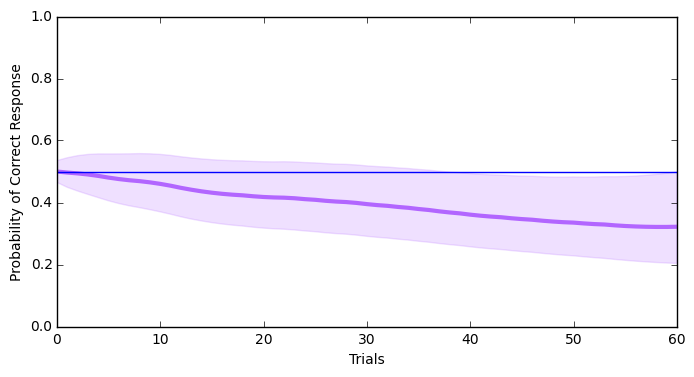

Subject CAT1_001
Set 1
Stimulus S2_C


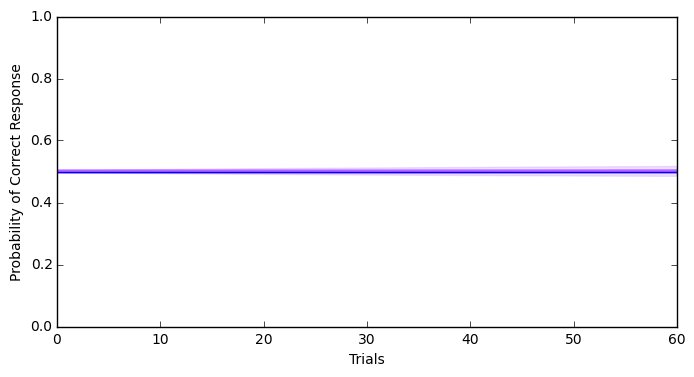

Subject CAT1_001
Set 2
Stimulus S1F1


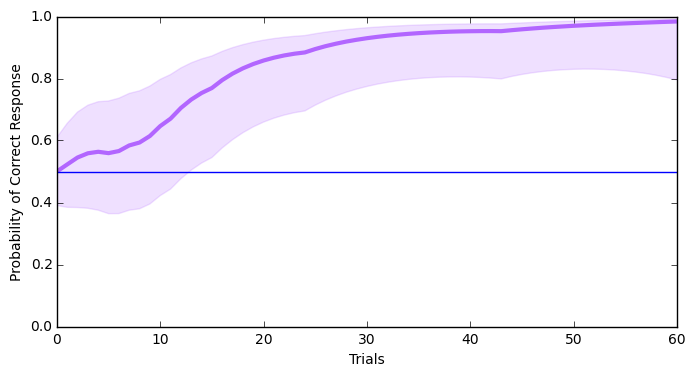

Subject CAT1_001
Set 2
Stimulus S1F2


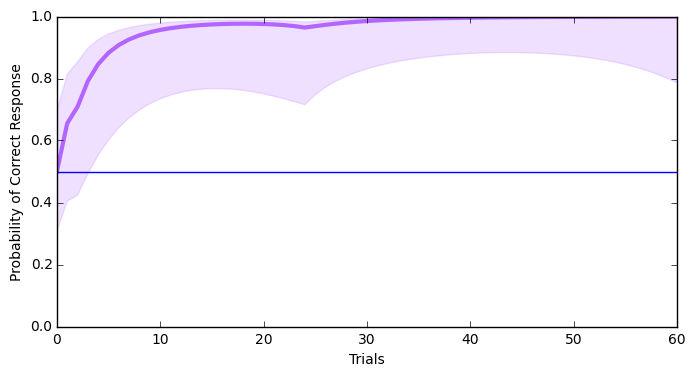

Subject CAT1_001
Set 2
Stimulus S2F1


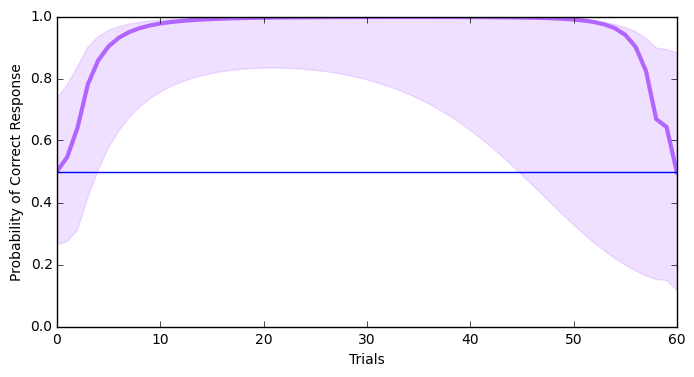

Subject CAT1_001
Set 2
Stimulus S2F2


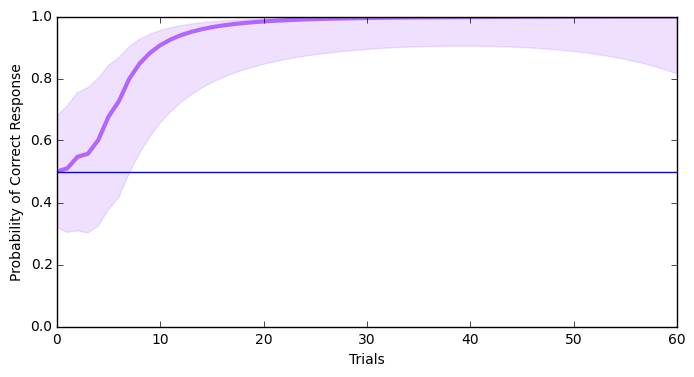

Subject CAT1_001
Set 2
Stimulus S1_C


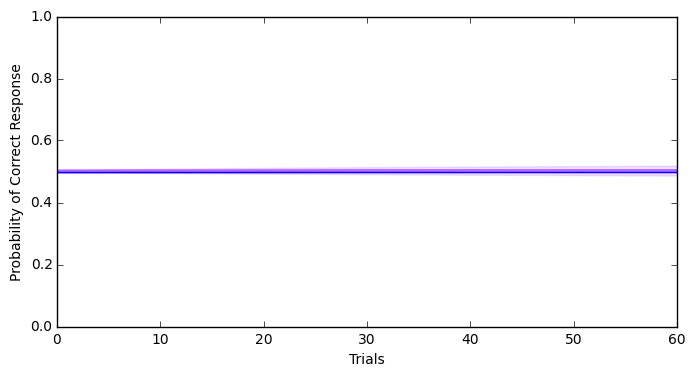

Subject CAT1_001
Set 2
Stimulus S2_C


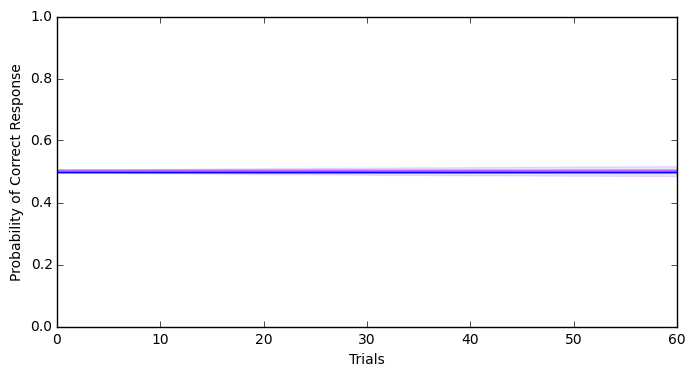

Subject CAT1_001
Set 3
Stimulus S1F1


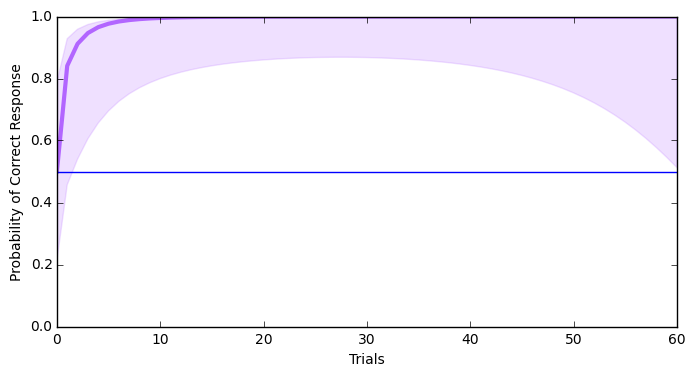

Subject CAT1_001
Set 3
Stimulus S1F2


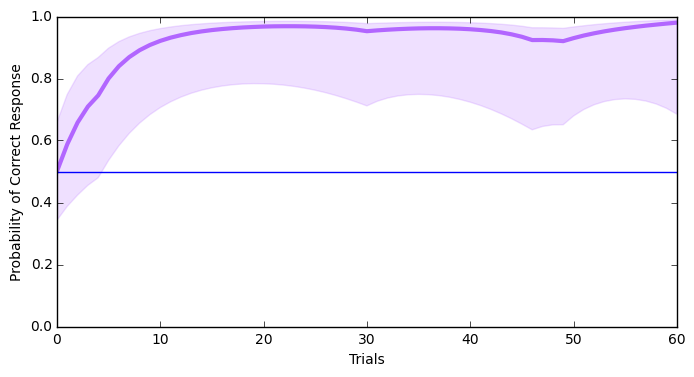

Subject CAT1_001
Set 3
Stimulus S2F1


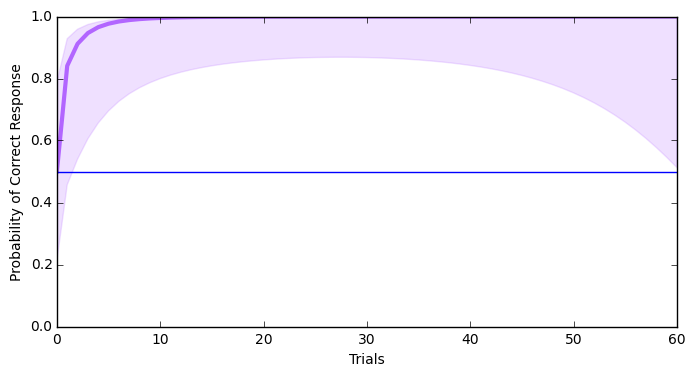

Subject CAT1_001
Set 3
Stimulus S2F2


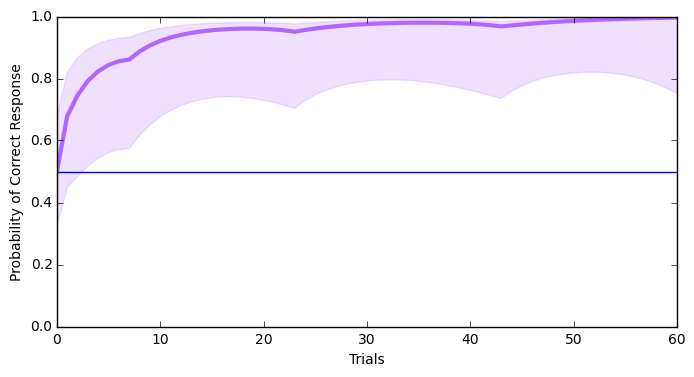

Subject CAT1_001
Set 3
Stimulus S1_C


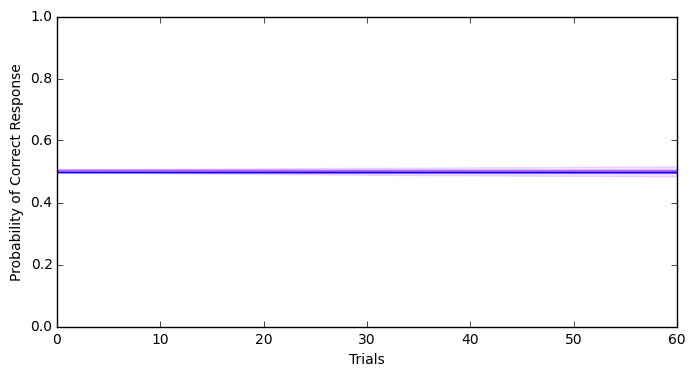

Subject CAT1_001
Set 3
Stimulus S2_C


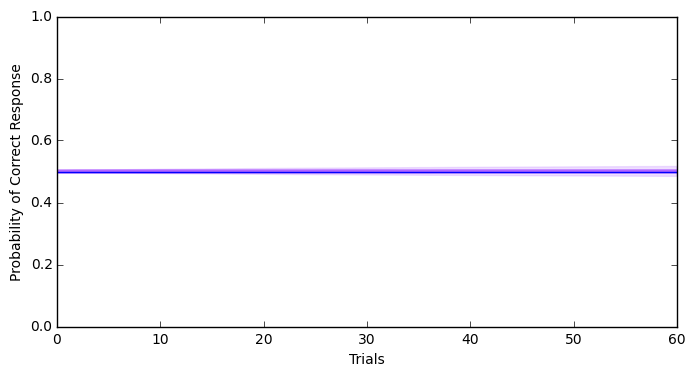

Subject CAT1_002
Set 1
Stimulus S1F1


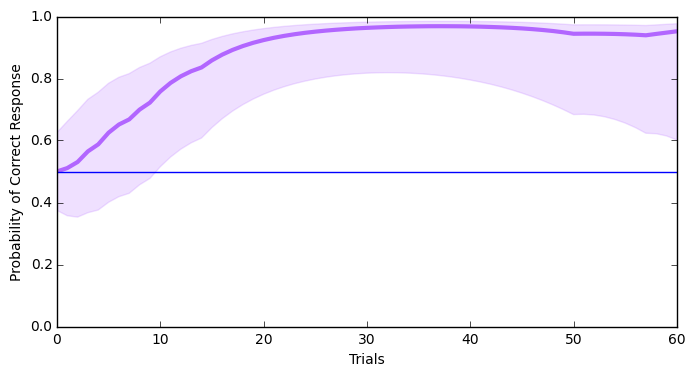

Subject CAT1_002
Set 1
Stimulus S1F2


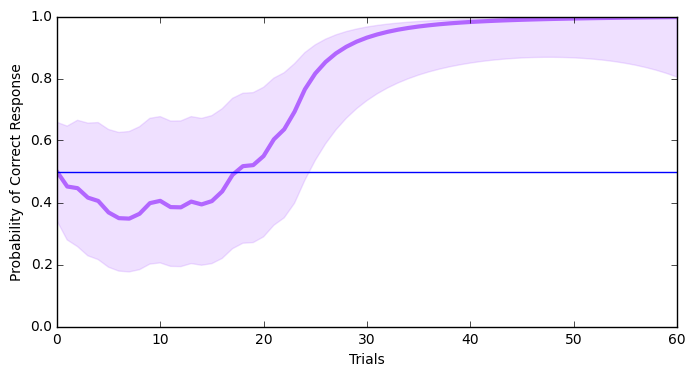

Subject CAT1_002
Set 1
Stimulus S2F1


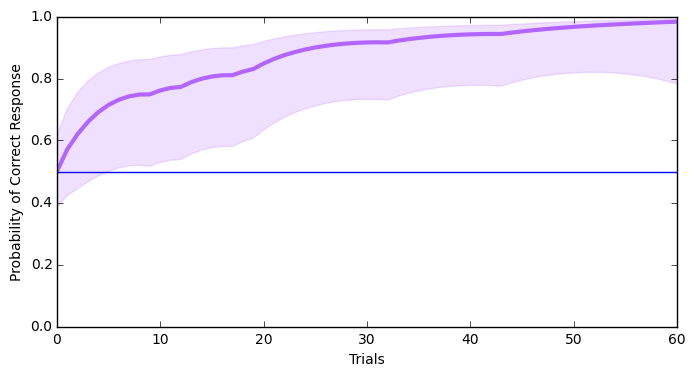

Subject CAT1_002
Set 1
Stimulus S2F2


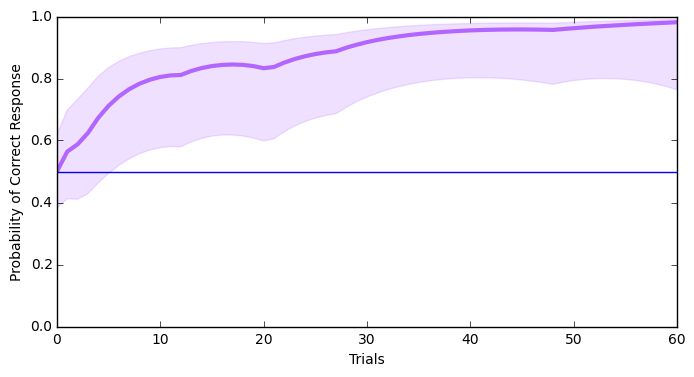

Subject CAT1_002
Set 1
Stimulus S1_C


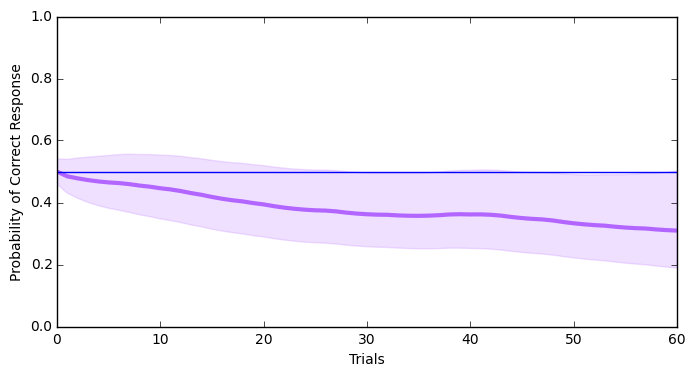

Subject CAT1_002
Set 1
Stimulus S2_C


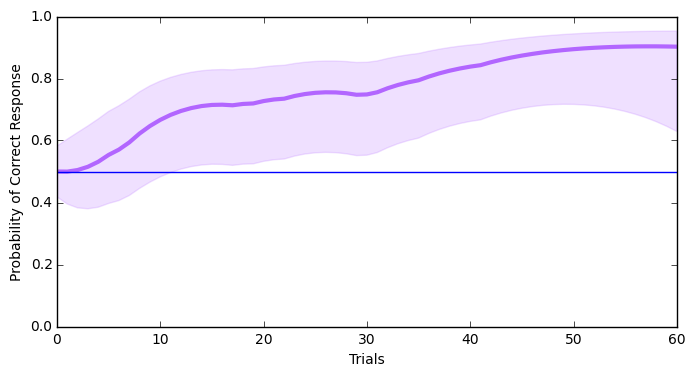

Subject CAT1_002
Set 2
Stimulus S1F1


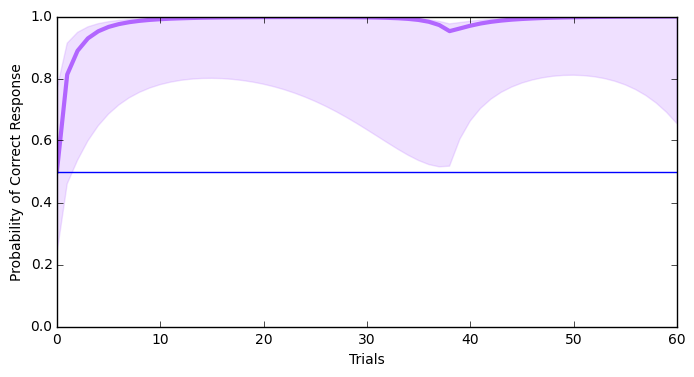

Subject CAT1_002
Set 2
Stimulus S1F2


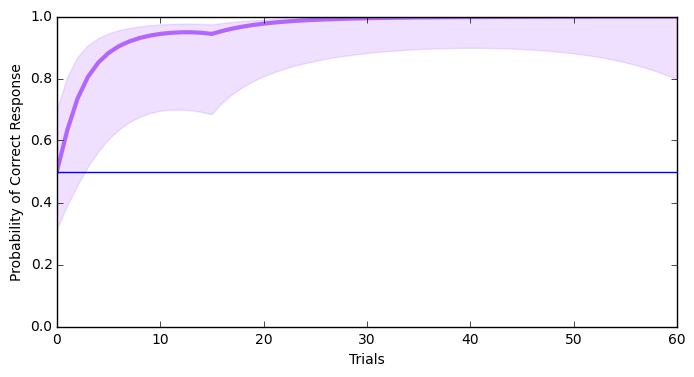

Subject CAT1_002
Set 2
Stimulus S2F1


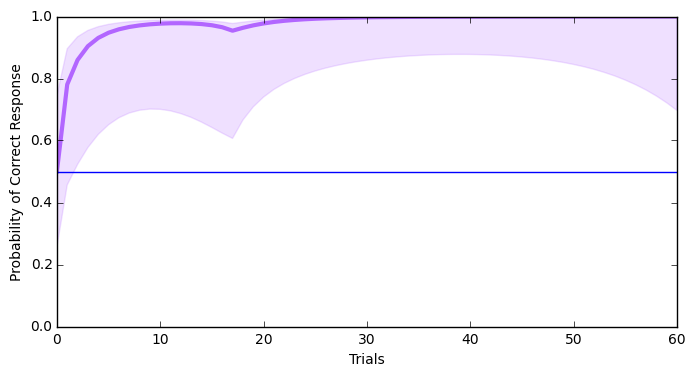

Subject CAT1_002
Set 2
Stimulus S2F2


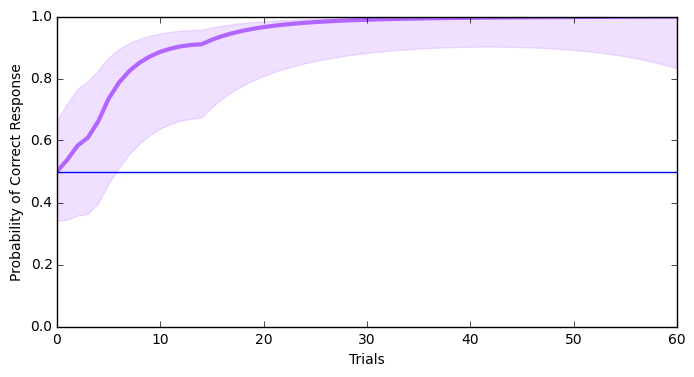

Subject CAT1_002
Set 2
Stimulus S1_C


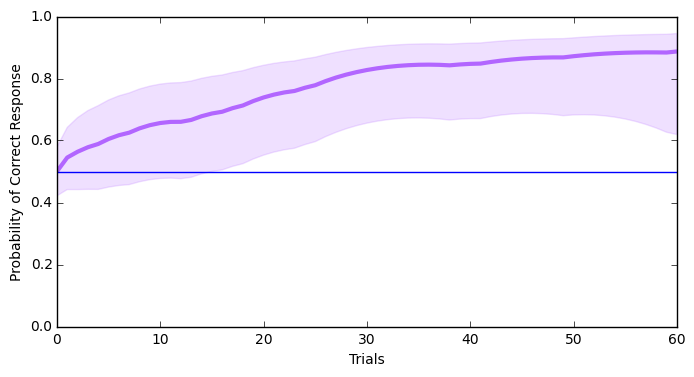

Subject CAT1_002
Set 2
Stimulus S2_C


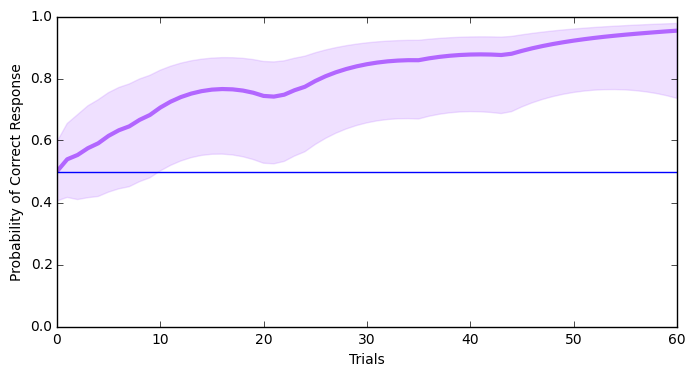

Subject CAT1_002
Set 3
Stimulus S1F1


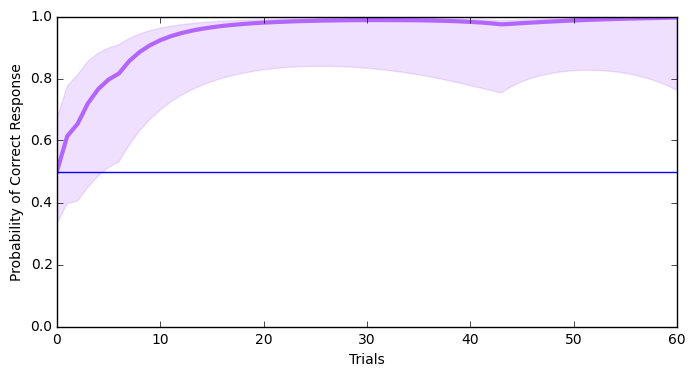

Subject CAT1_002
Set 3
Stimulus S1F2


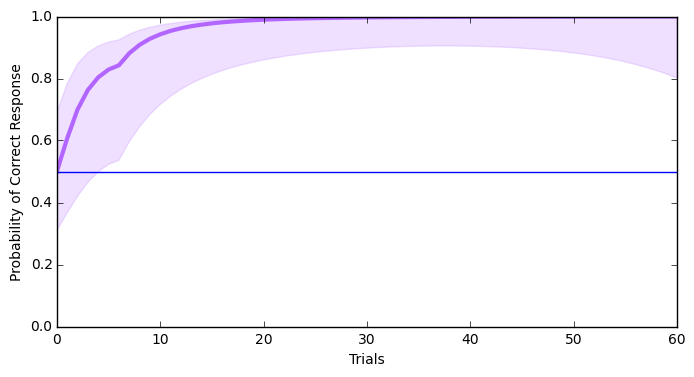

Subject CAT1_002
Set 3
Stimulus S2F1


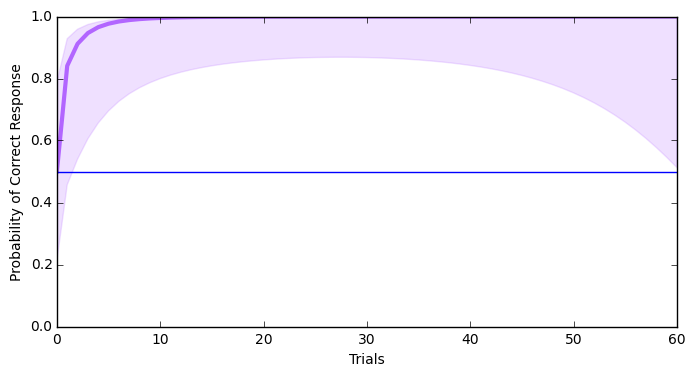

Subject CAT1_002
Set 3
Stimulus S2F2


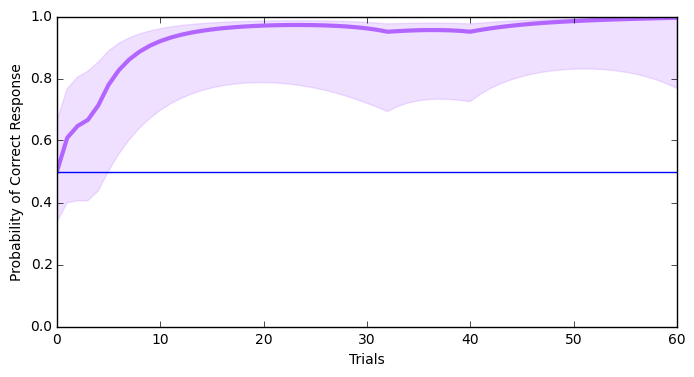

Subject CAT1_002
Set 3
Stimulus S1_C


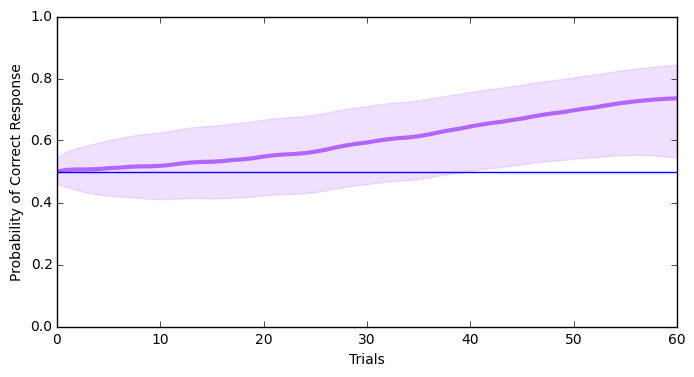

Subject CAT1_002
Set 3
Stimulus S2_C


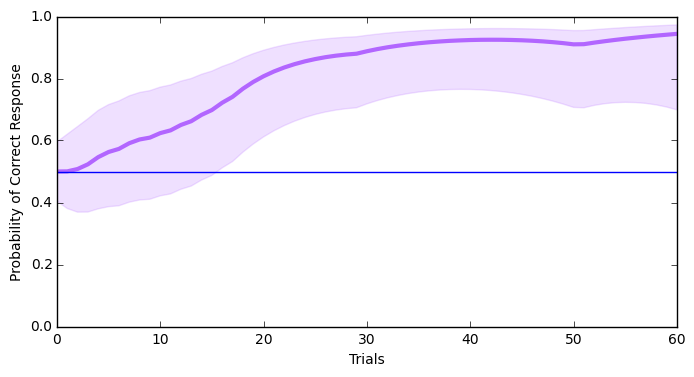

Subject CAT1_003
Set 1
Stimulus S1F1


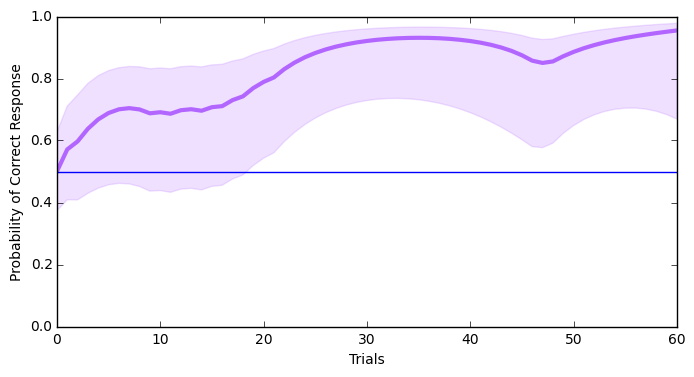

Subject CAT1_003
Set 1
Stimulus S1F2


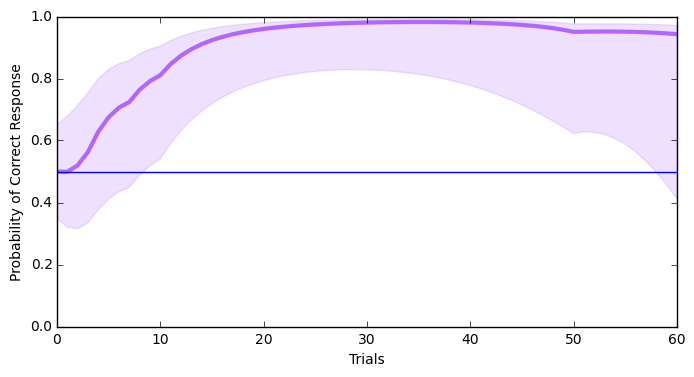

Subject CAT1_003
Set 1
Stimulus S2F1


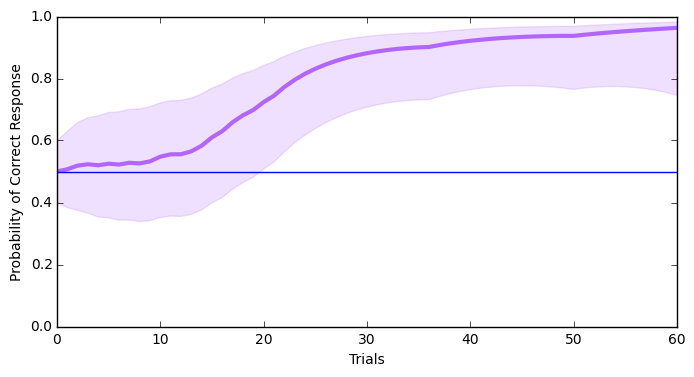

Subject CAT1_003
Set 1
Stimulus S2F2


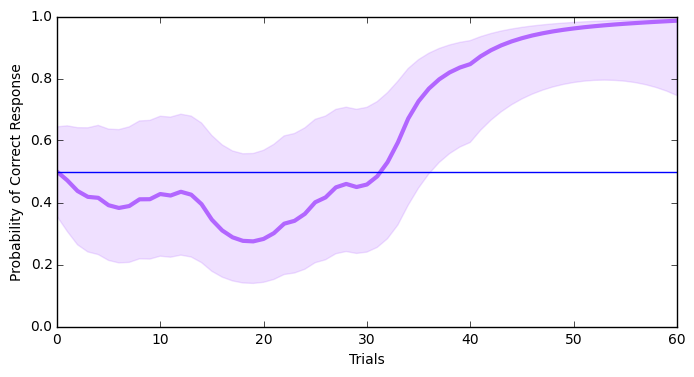

Subject CAT1_003
Set 1
Stimulus S1_C


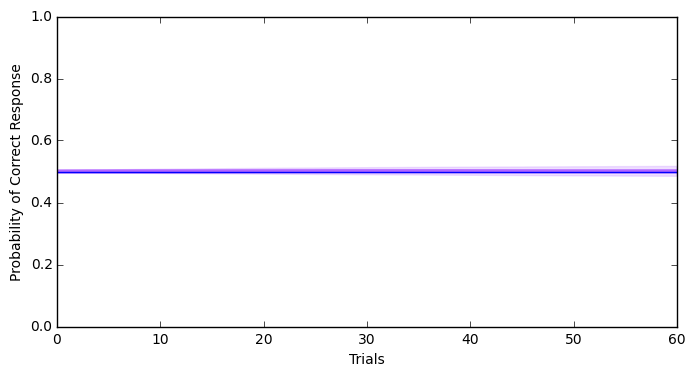

Subject CAT1_003
Set 1
Stimulus S2_C


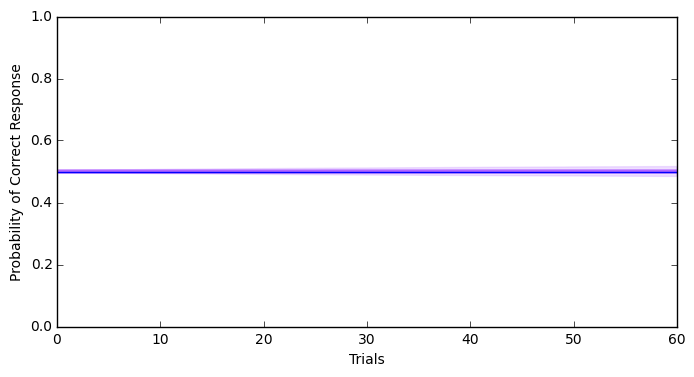

Subject CAT1_003
Set 2
Stimulus S1F1


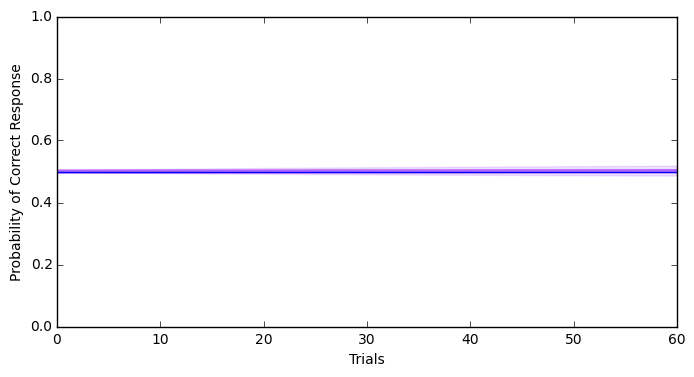

Subject CAT1_003
Set 2
Stimulus S1F2


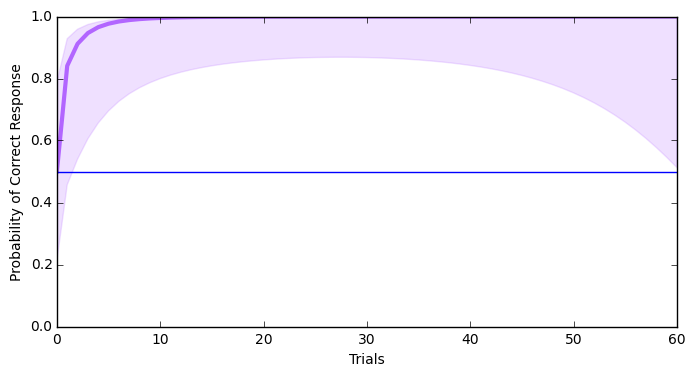

Subject CAT1_003
Set 2
Stimulus S2F1


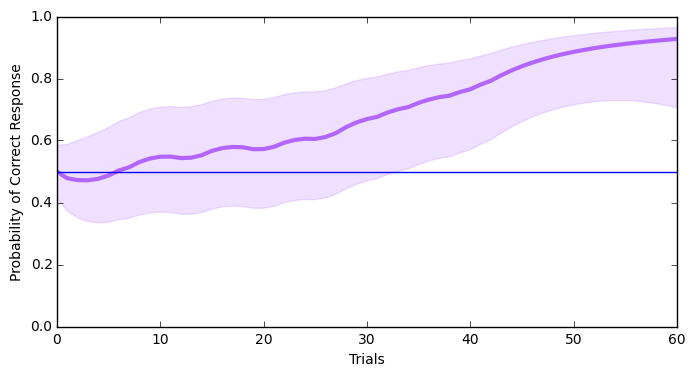

Subject CAT1_003
Set 2
Stimulus S2F2


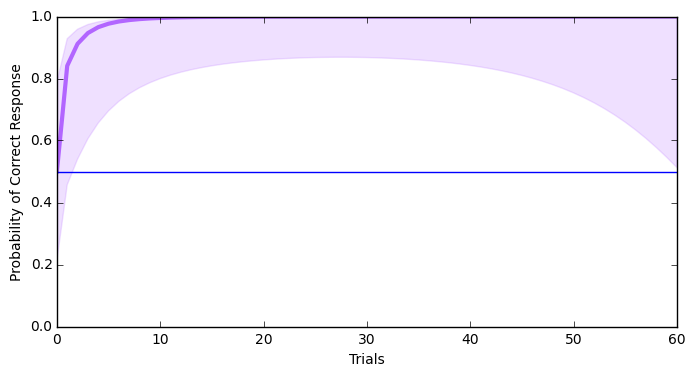

Subject CAT1_003
Set 2
Stimulus S1_C


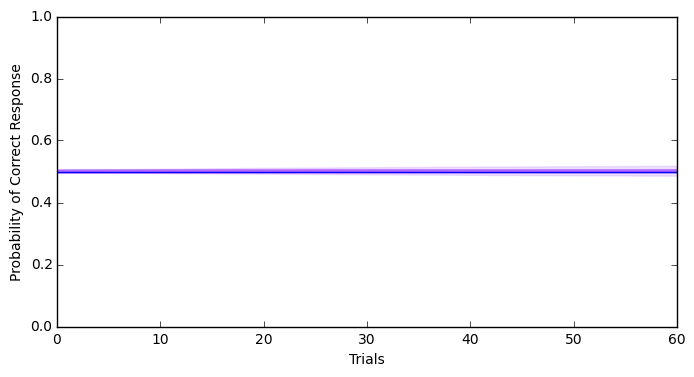

Subject CAT1_003
Set 2
Stimulus S2_C


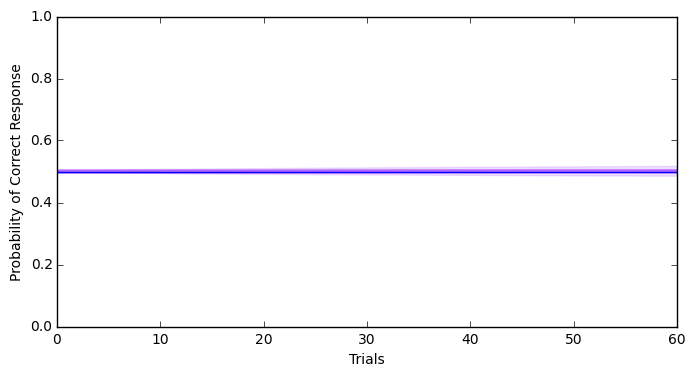

Subject CAT1_003
Set 3
Stimulus S1F1


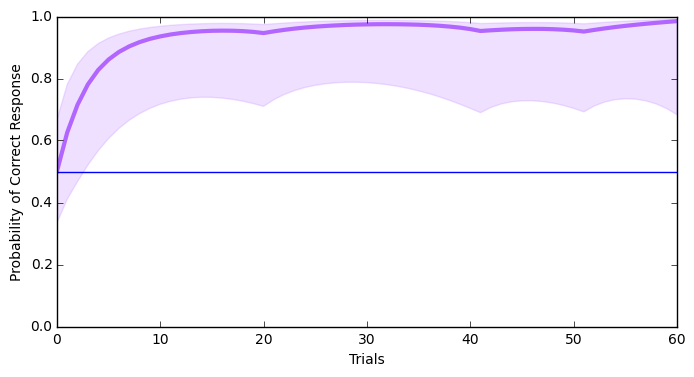

Subject CAT1_003
Set 3
Stimulus S1F2


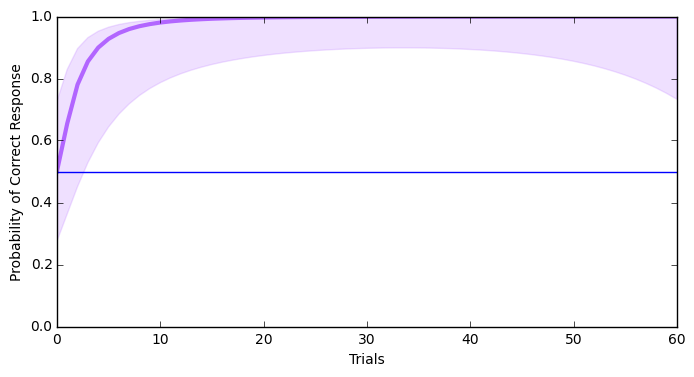

Subject CAT1_003
Set 3
Stimulus S2F1


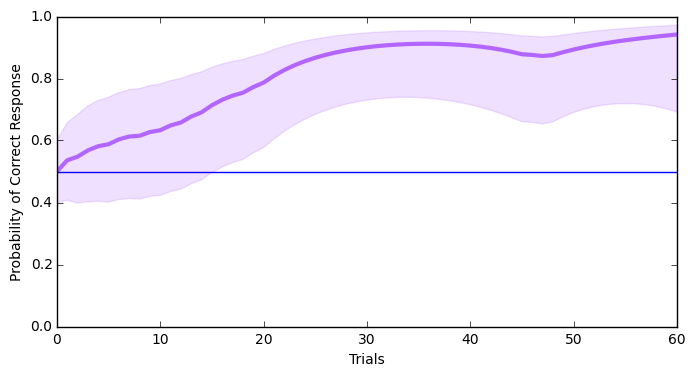

Subject CAT1_003
Set 3
Stimulus S2F2


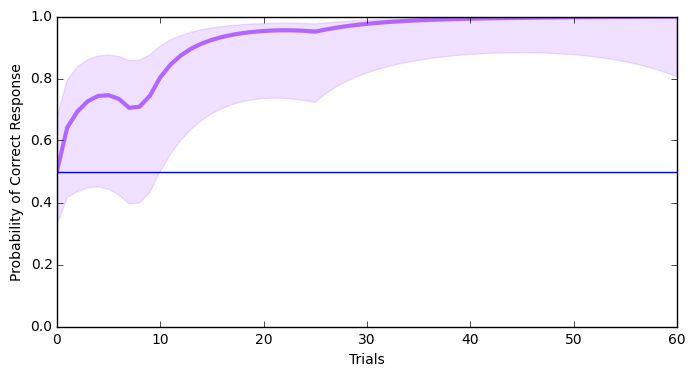

Subject CAT1_003
Set 3
Stimulus S1_C


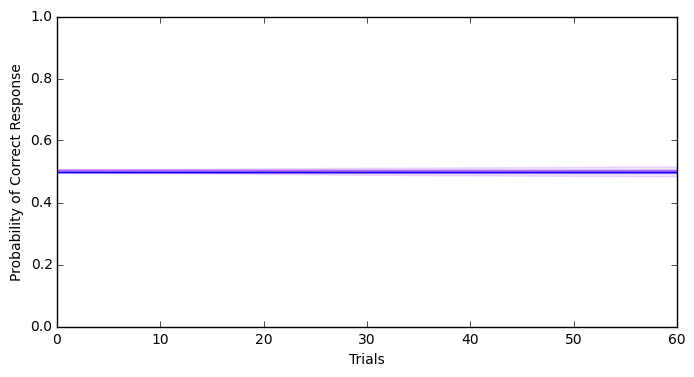

Subject CAT1_003
Set 3
Stimulus S2_C


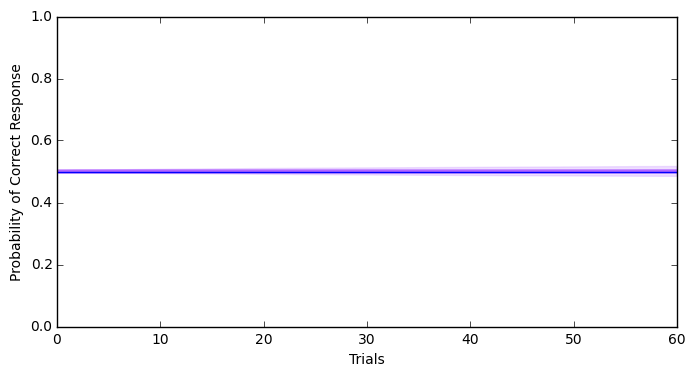

Subject CAT1_004
Set 1
Stimulus S1F1


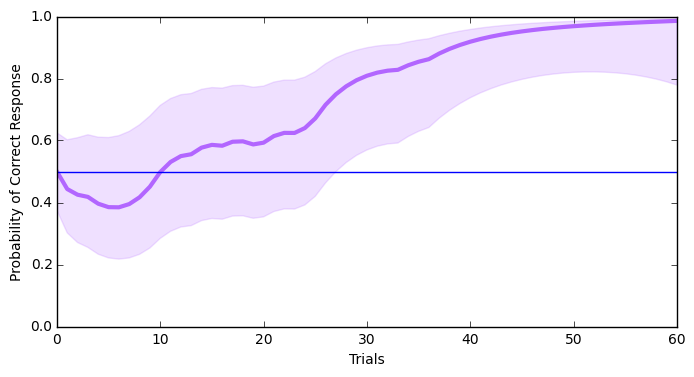

Subject CAT1_004
Set 1
Stimulus S1F2


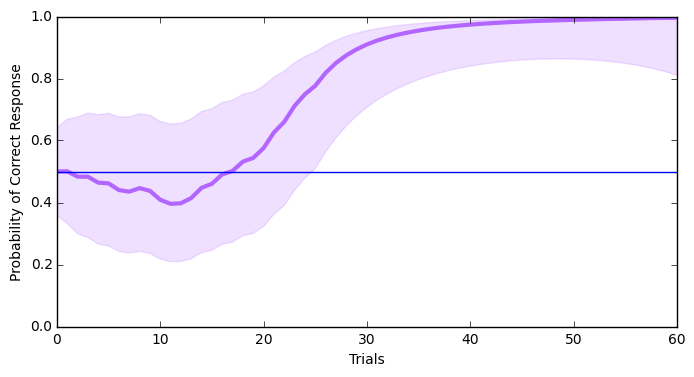

Subject CAT1_004
Set 1
Stimulus S2F1


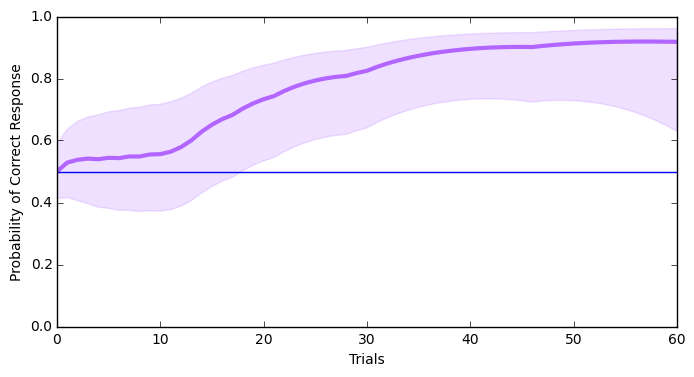

Subject CAT1_004
Set 1
Stimulus S2F2


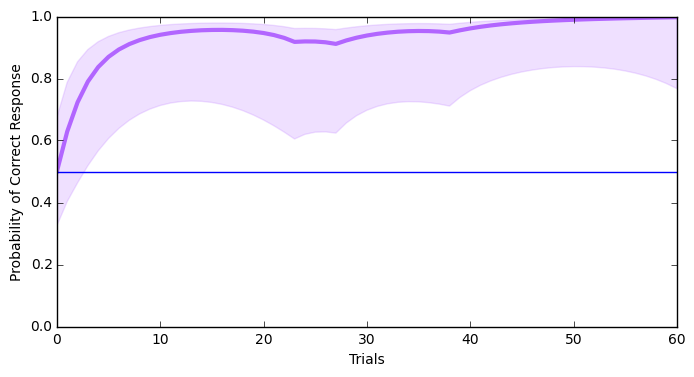

Subject CAT1_004
Set 1
Stimulus S1_C


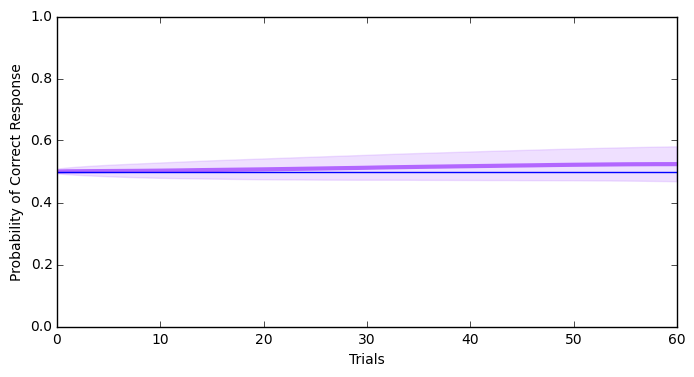

Subject CAT1_004
Set 1
Stimulus S2_C


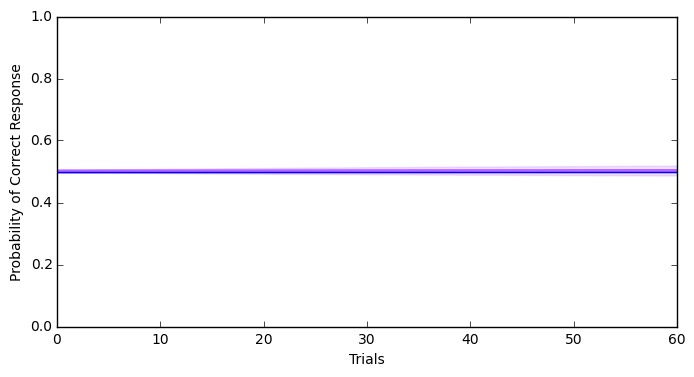

Subject CAT1_004
Set 2
Stimulus S1F1


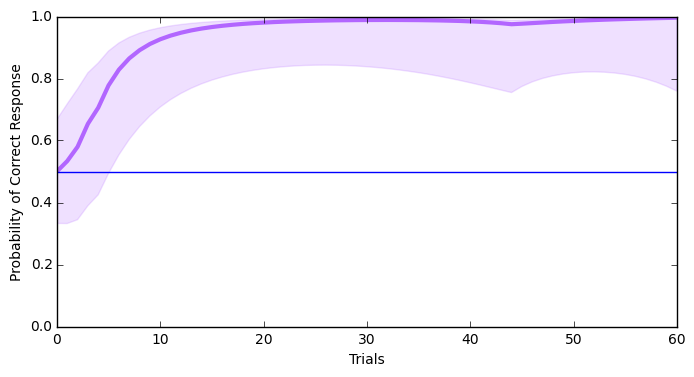

Subject CAT1_004
Set 2
Stimulus S1F2


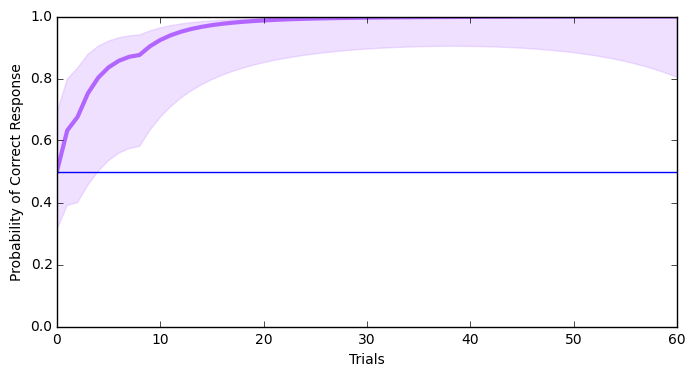

Subject CAT1_004
Set 2
Stimulus S2F1


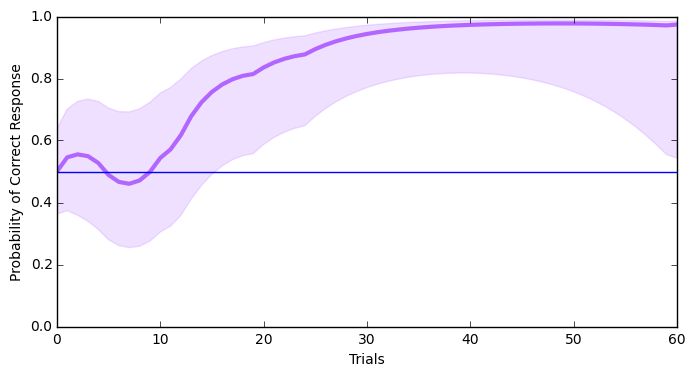

Subject CAT1_004
Set 2
Stimulus S2F2


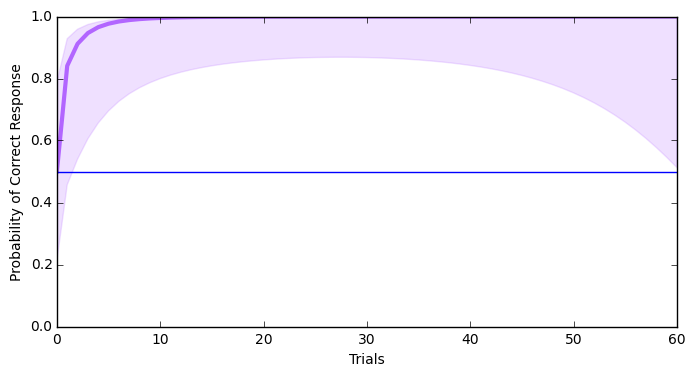

Subject CAT1_004
Set 2
Stimulus S1_C


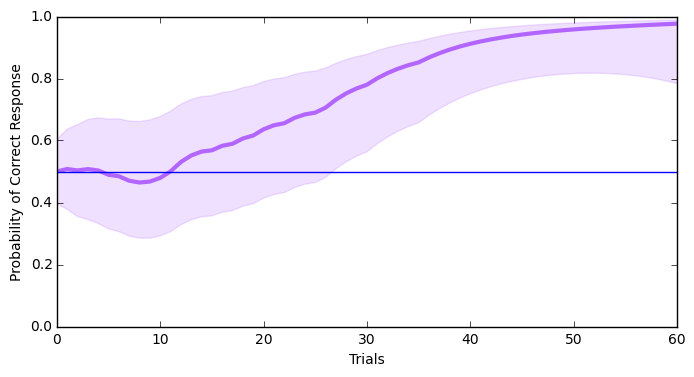

Subject CAT1_004
Set 2
Stimulus S2_C


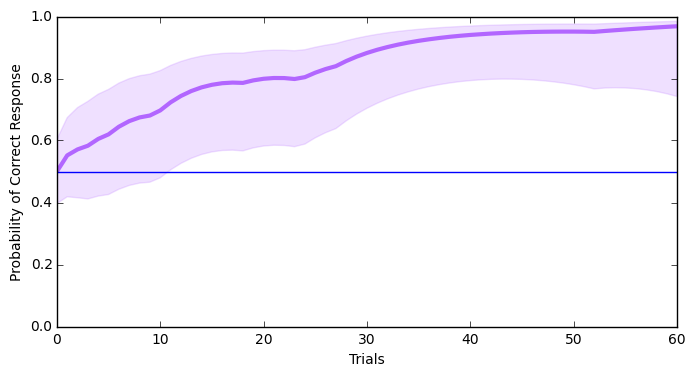

Subject CAT1_004
Set 3
Stimulus S1F1


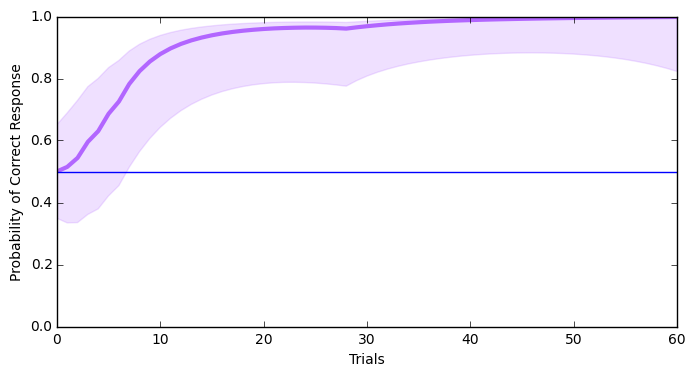

Subject CAT1_004
Set 3
Stimulus S1F2


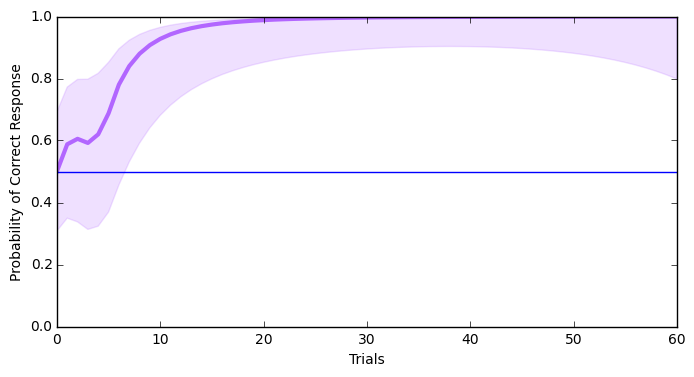

Subject CAT1_004
Set 3
Stimulus S2F1


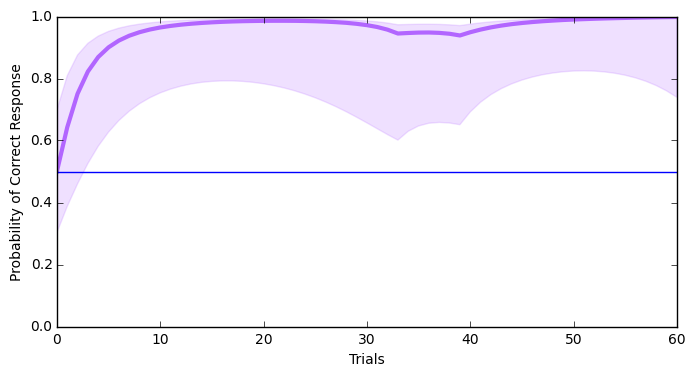

Subject CAT1_004
Set 3
Stimulus S2F2


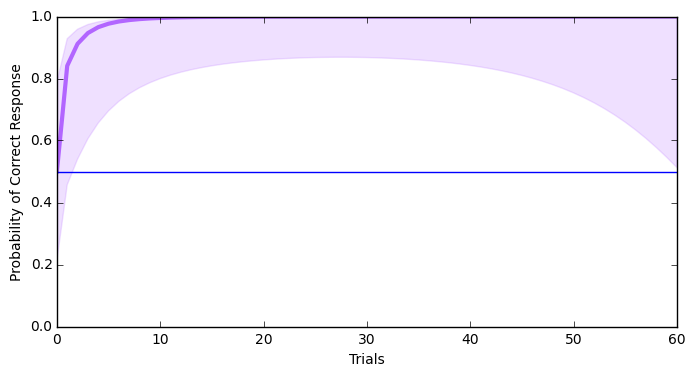

Subject CAT1_004
Set 3
Stimulus S1_C


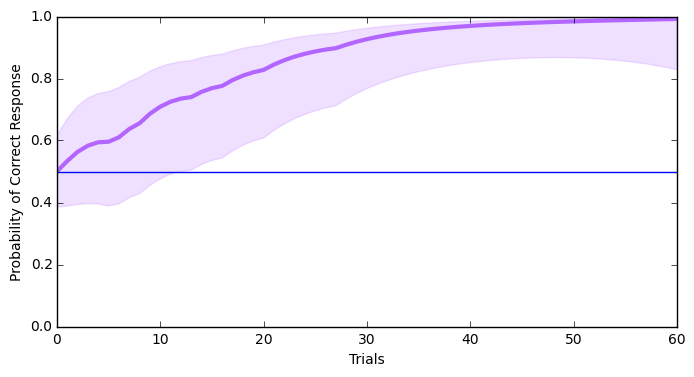

Subject CAT1_004
Set 3
Stimulus S2_C


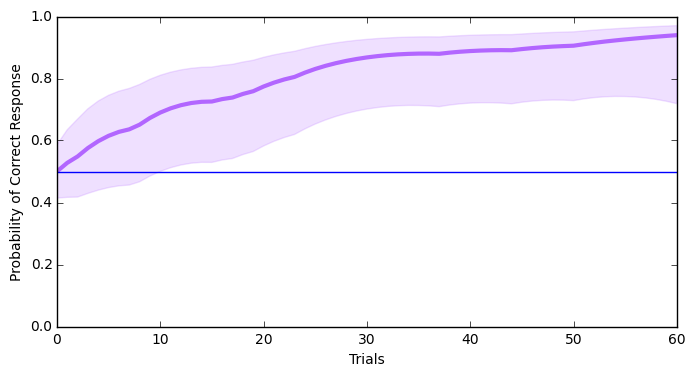

Subject CAT1_005
Set 1
Stimulus S1F1


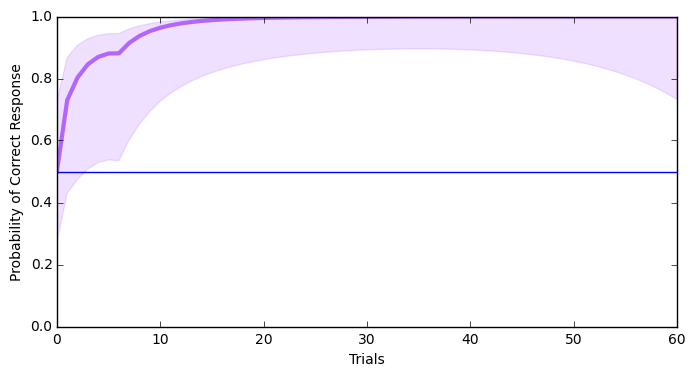

Subject CAT1_005
Set 1
Stimulus S1F2


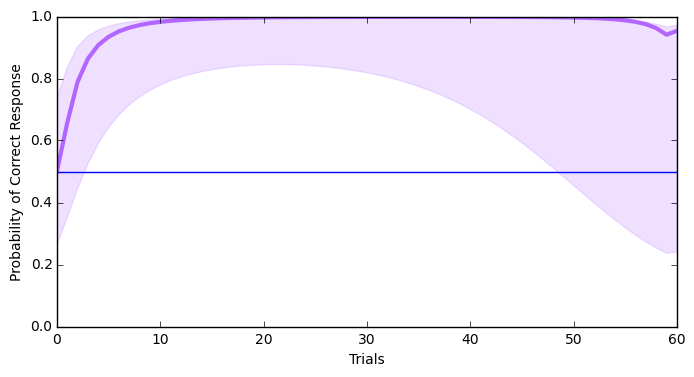

Subject CAT1_005
Set 1
Stimulus S2F1


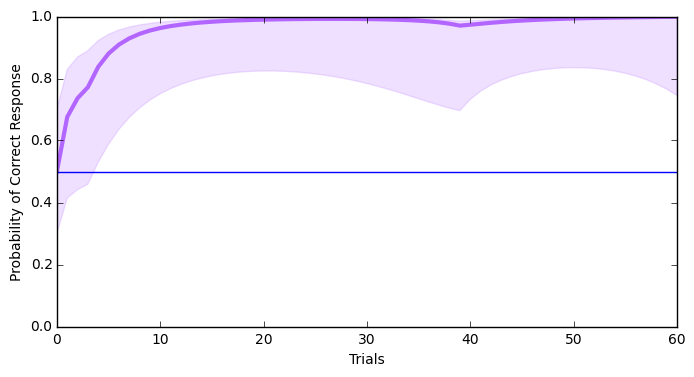

Subject CAT1_005
Set 1
Stimulus S2F2


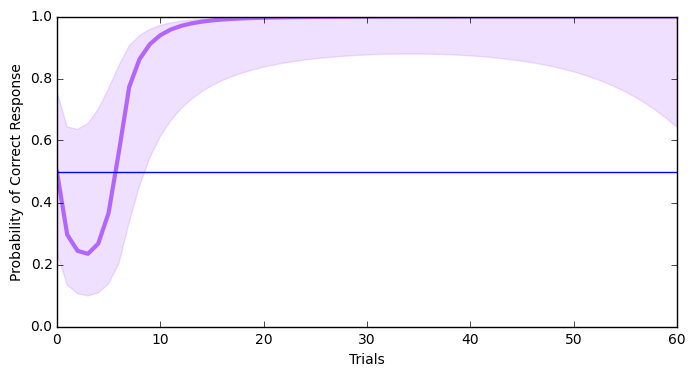

Subject CAT1_005
Set 1
Stimulus S1_C


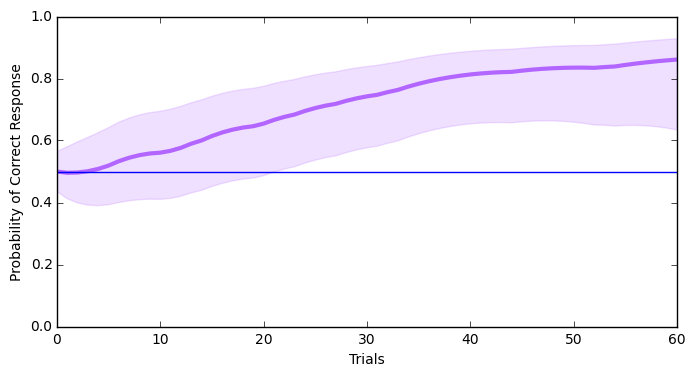

Subject CAT1_005
Set 1
Stimulus S2_C


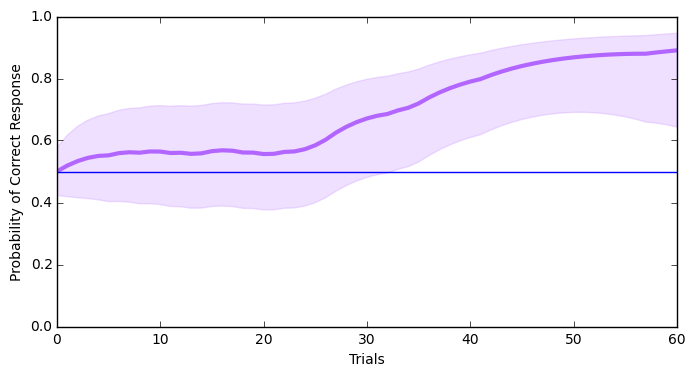

Subject CAT1_005
Set 2
Stimulus S1F1


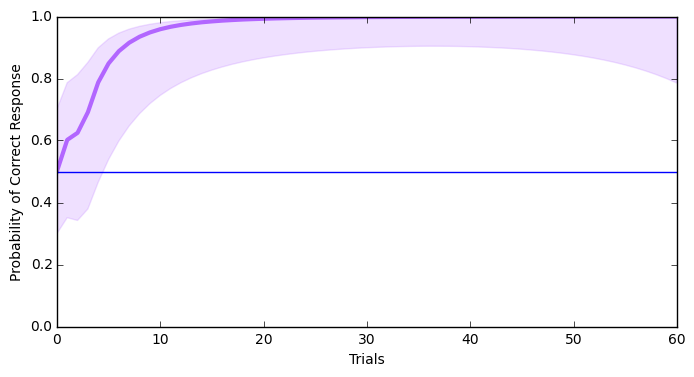

Subject CAT1_005
Set 2
Stimulus S1F2


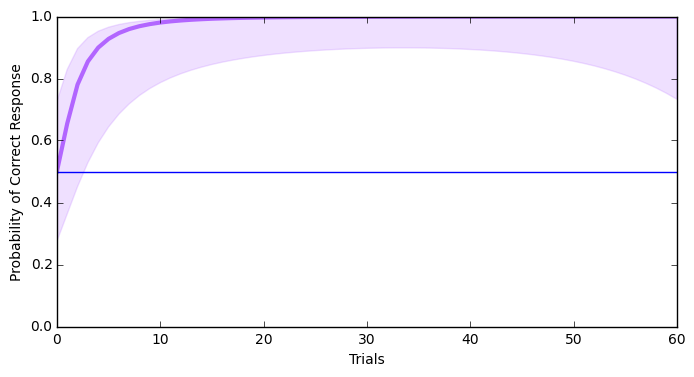

Subject CAT1_005
Set 2
Stimulus S2F1


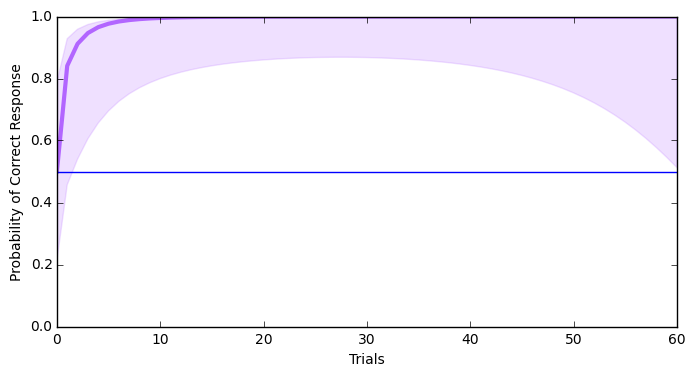

Subject CAT1_005
Set 2
Stimulus S2F2


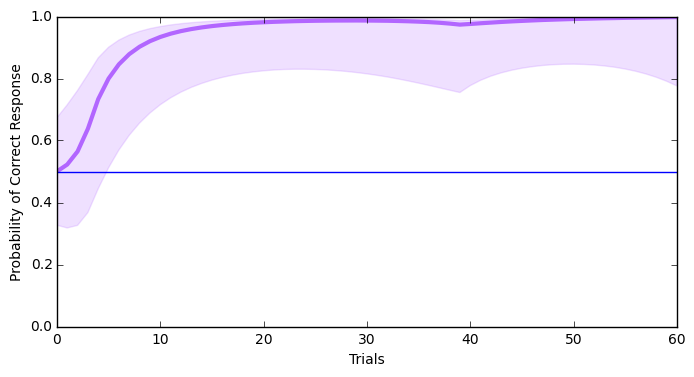

Subject CAT1_005
Set 2
Stimulus S1_C


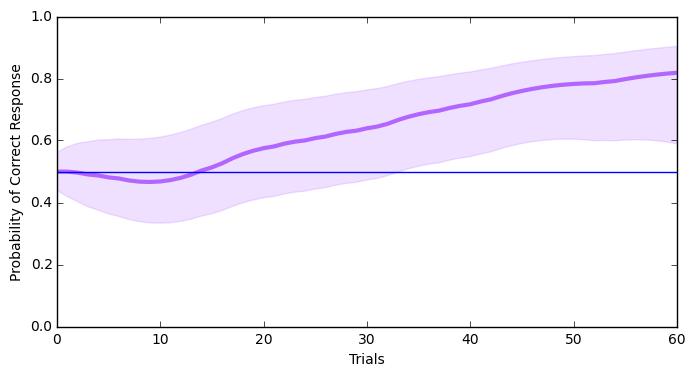

Subject CAT1_005
Set 2
Stimulus S2_C


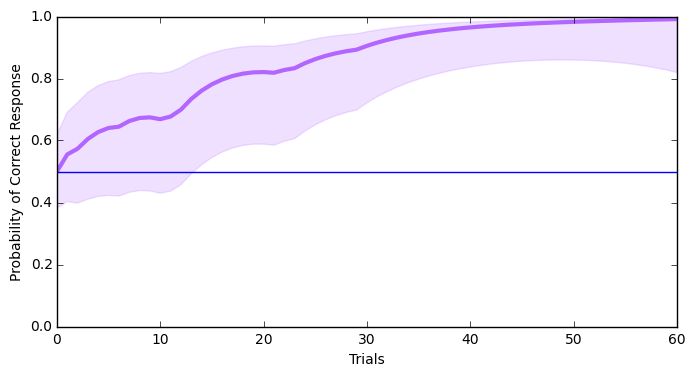

Subject CAT1_005
Set 3
Stimulus S1F1


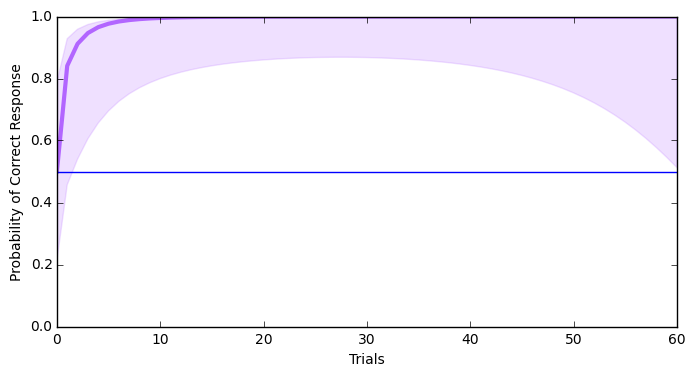

Subject CAT1_005
Set 3
Stimulus S1F2


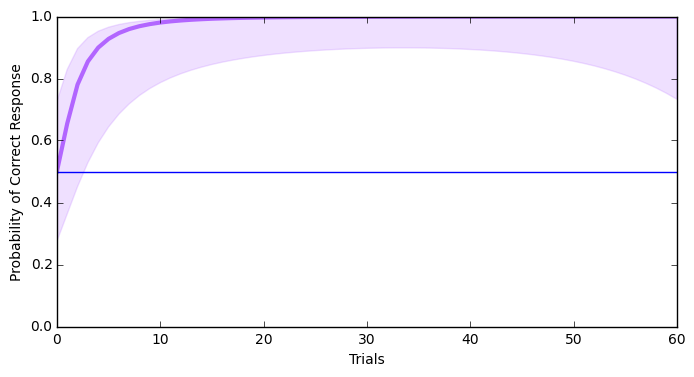

Subject CAT1_005
Set 3
Stimulus S2F1


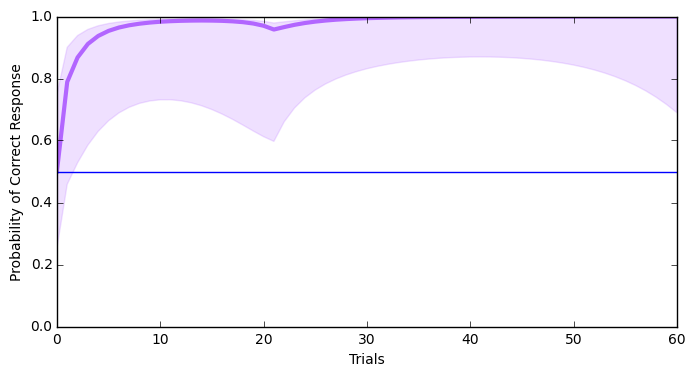

Subject CAT1_005
Set 3
Stimulus S2F2


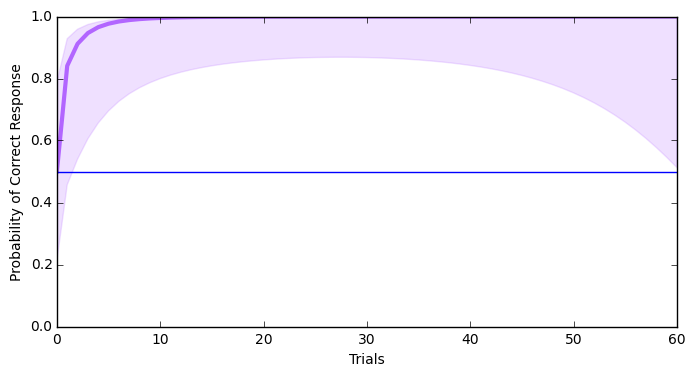

Subject CAT1_005
Set 3
Stimulus S1_C


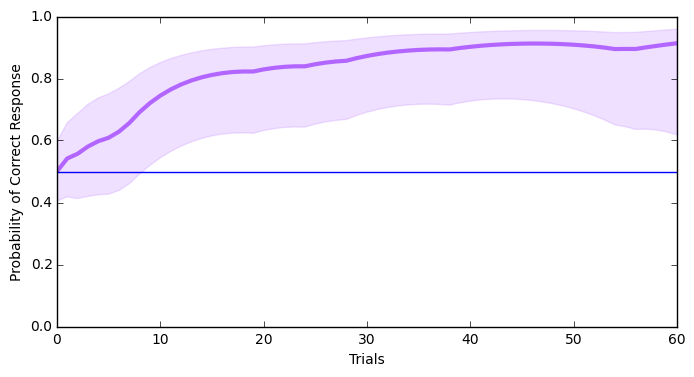

Subject CAT1_005
Set 3
Stimulus S2_C


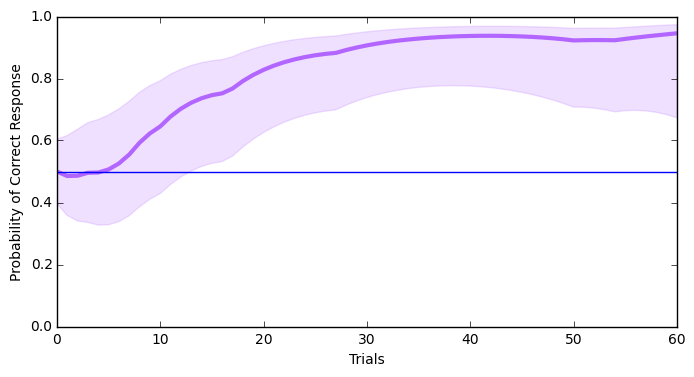

Subject CAT1_006
Set 1
Stimulus S1F1


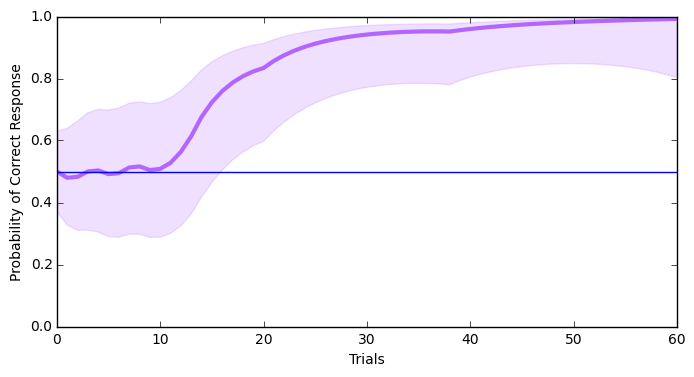

Subject CAT1_006
Set 1
Stimulus S1F2


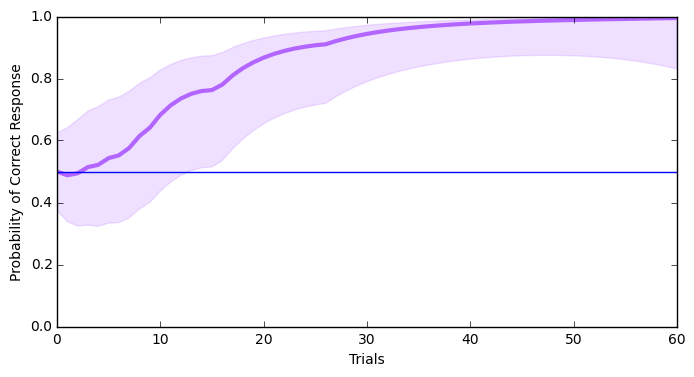

Subject CAT1_006
Set 1
Stimulus S2F1


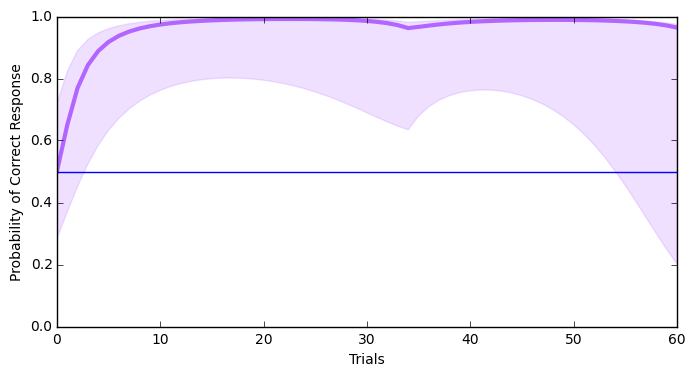

Subject CAT1_006
Set 1
Stimulus S2F2


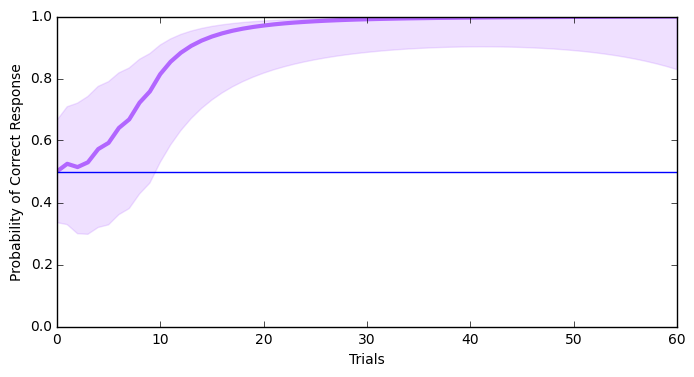

Subject CAT1_006
Set 1
Stimulus S1_C


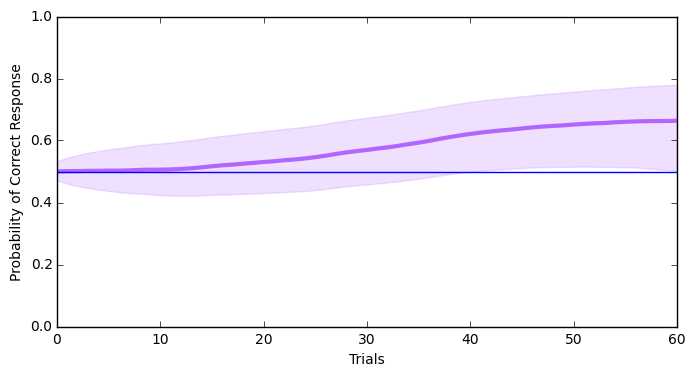

Subject CAT1_006
Set 1
Stimulus S2_C


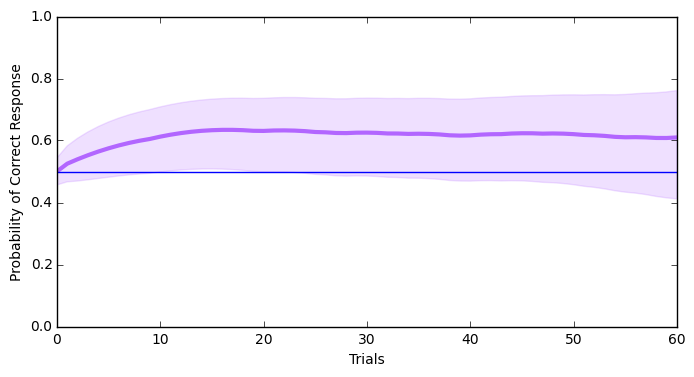

Subject CAT1_006
Set 2
Stimulus S1F1


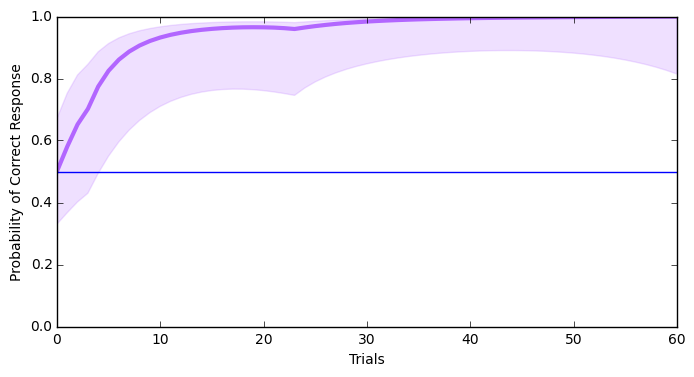

Subject CAT1_006
Set 2
Stimulus S1F2


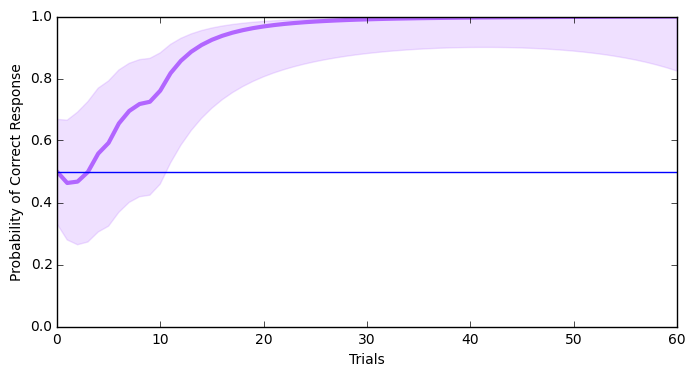

Subject CAT1_006
Set 2
Stimulus S2F1


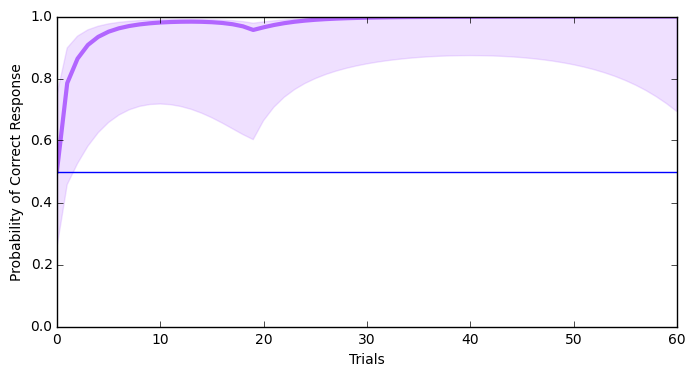

Subject CAT1_006
Set 2
Stimulus S2F2


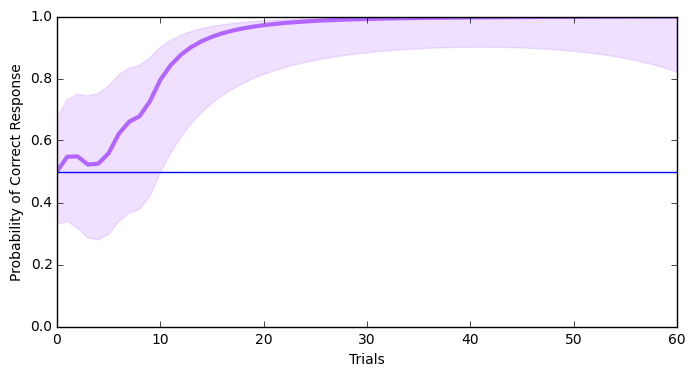

Subject CAT1_006
Set 2
Stimulus S1_C


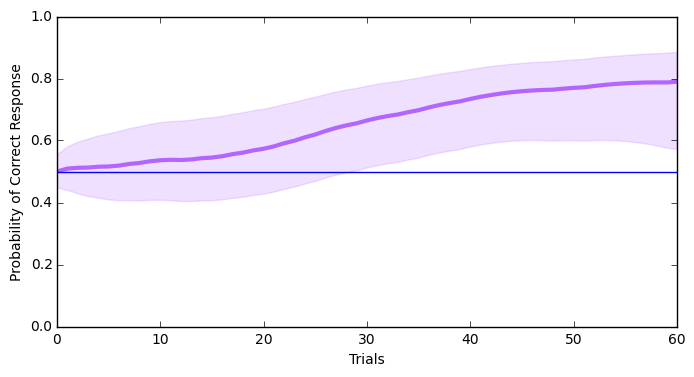

Subject CAT1_006
Set 2
Stimulus S2_C


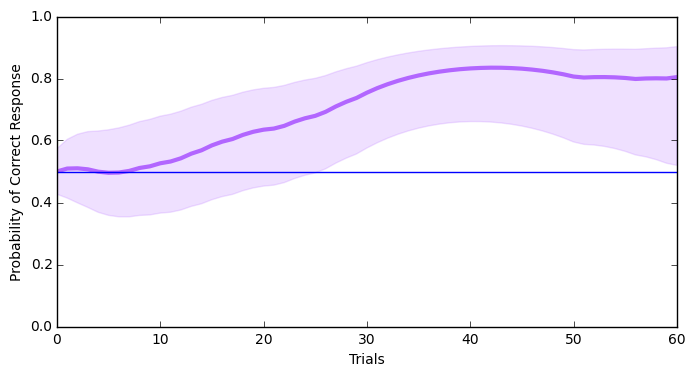

Subject CAT1_006
Set 3
Stimulus S1F1


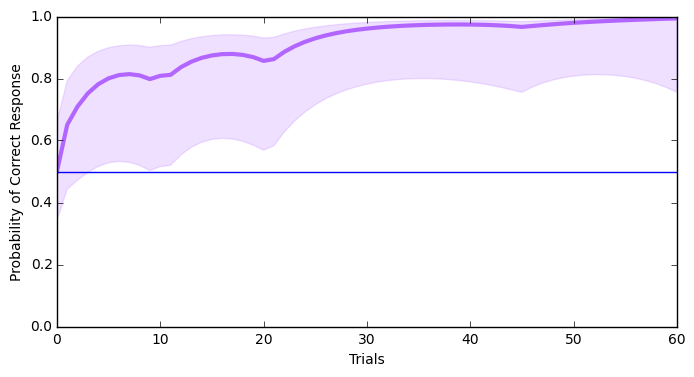

Subject CAT1_006
Set 3
Stimulus S1F2


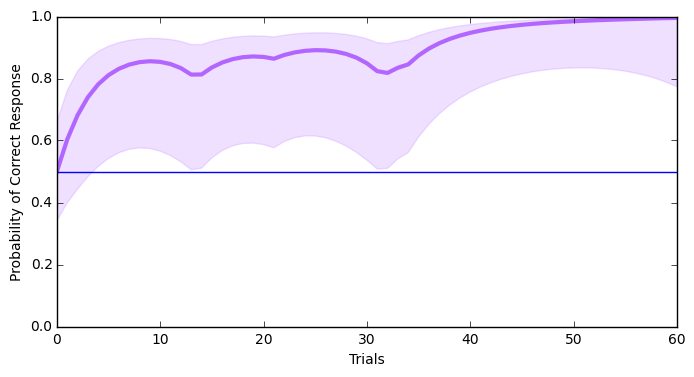

Subject CAT1_006
Set 3
Stimulus S2F1


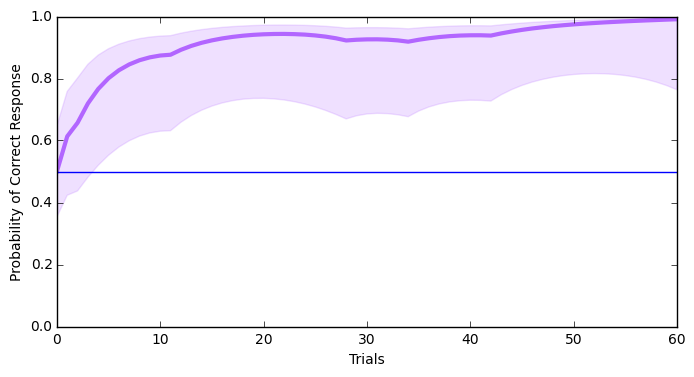

Subject CAT1_006
Set 3
Stimulus S2F2


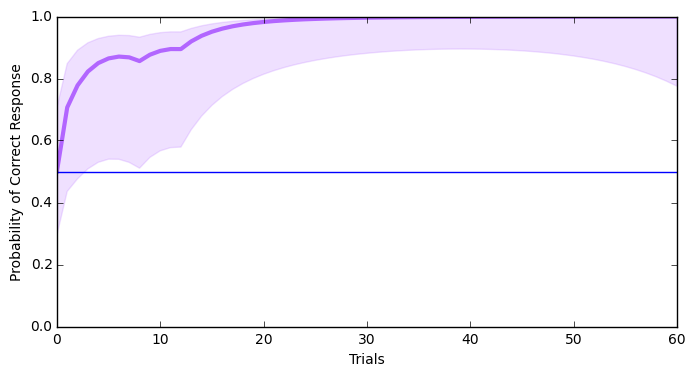

Subject CAT1_006
Set 3
Stimulus S1_C


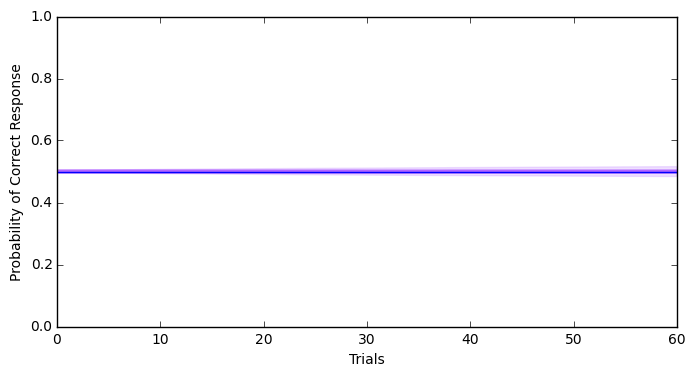

Subject CAT1_006
Set 3
Stimulus S2_C


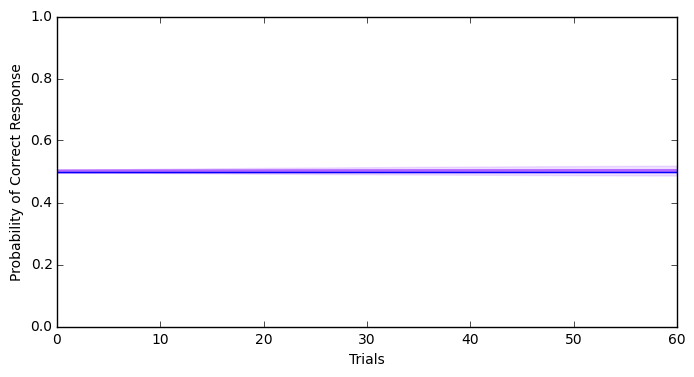

Subject CAT1_007
Set 1
Stimulus S1F1


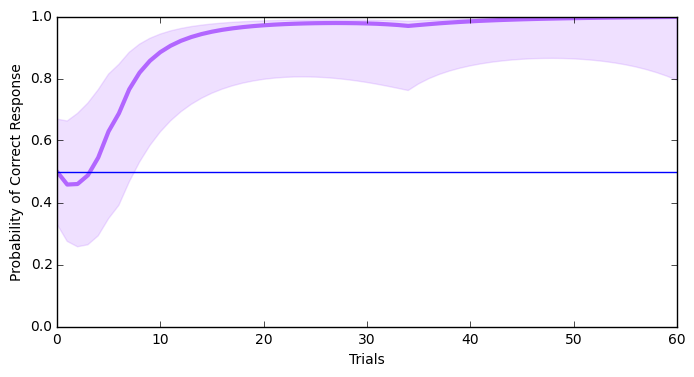

Subject CAT1_007
Set 1
Stimulus S1F2


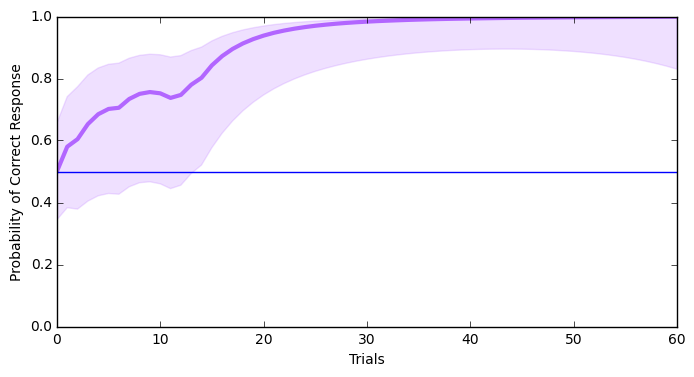

Subject CAT1_007
Set 1
Stimulus S2F1


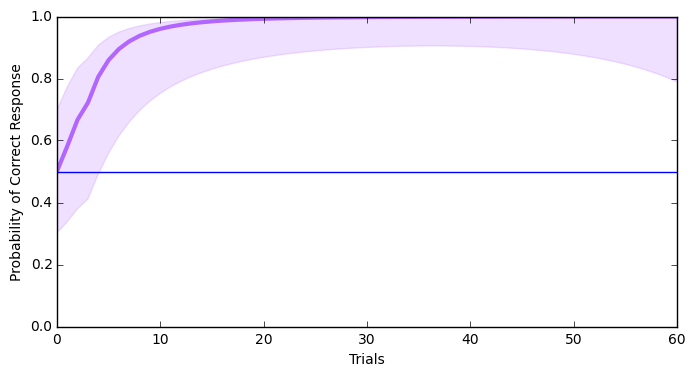

Subject CAT1_007
Set 1
Stimulus S2F2


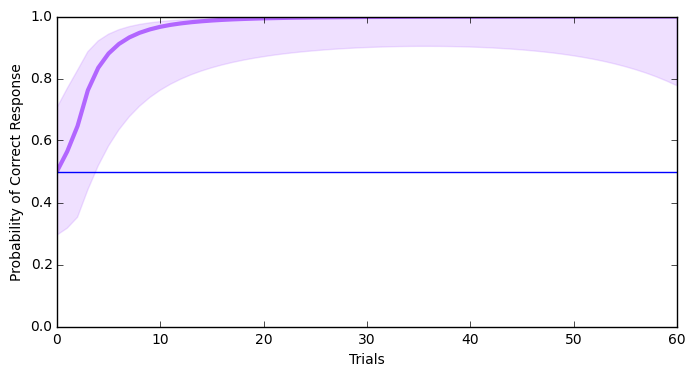

Subject CAT1_007
Set 1
Stimulus S1_C


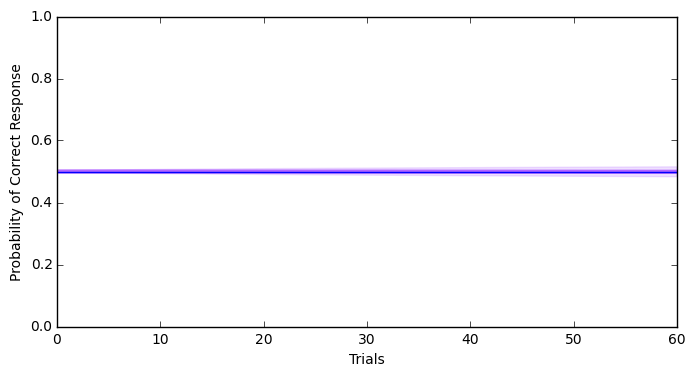

Subject CAT1_007
Set 1
Stimulus S2_C


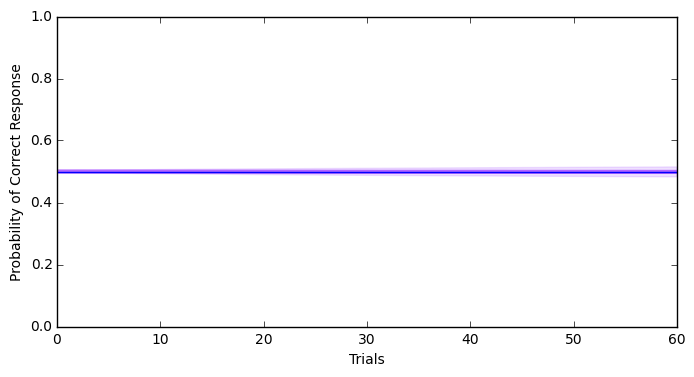

Subject CAT1_007
Set 2
Stimulus S1F1


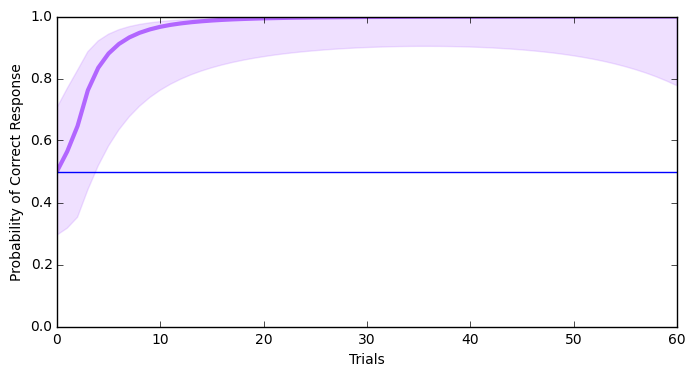

Subject CAT1_007
Set 2
Stimulus S1F2


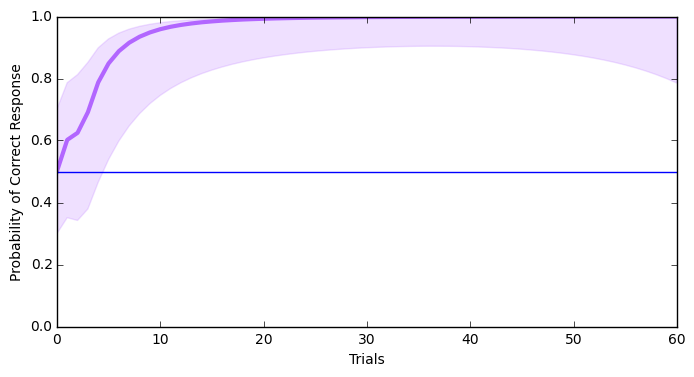

Subject CAT1_007
Set 2
Stimulus S2F1


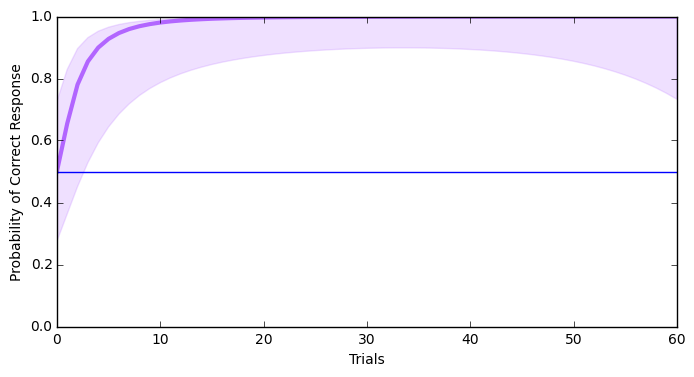

Subject CAT1_007
Set 2
Stimulus S2F2


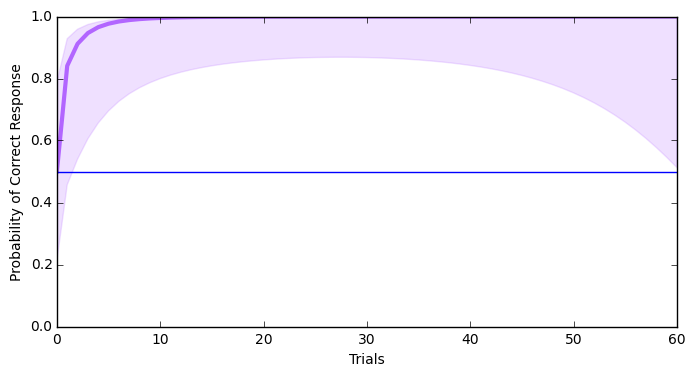

Subject CAT1_007
Set 2
Stimulus S1_C


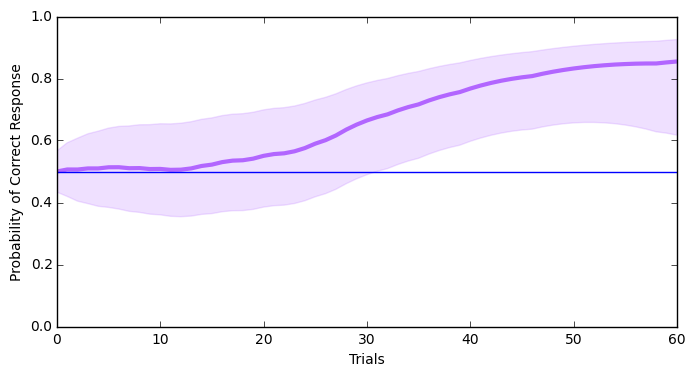

Subject CAT1_007
Set 2
Stimulus S2_C


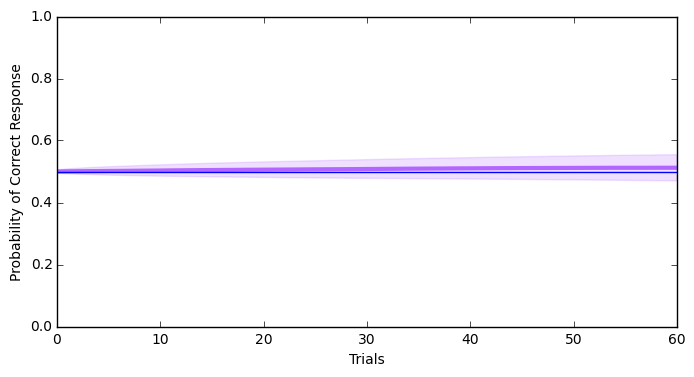

Subject CAT1_007
Set 3
Stimulus S1F1


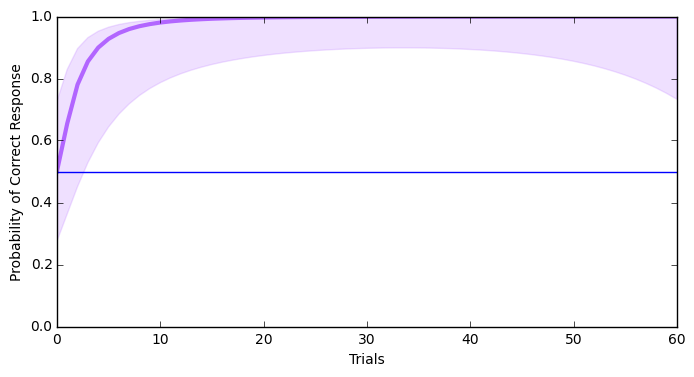

Subject CAT1_007
Set 3
Stimulus S1F2


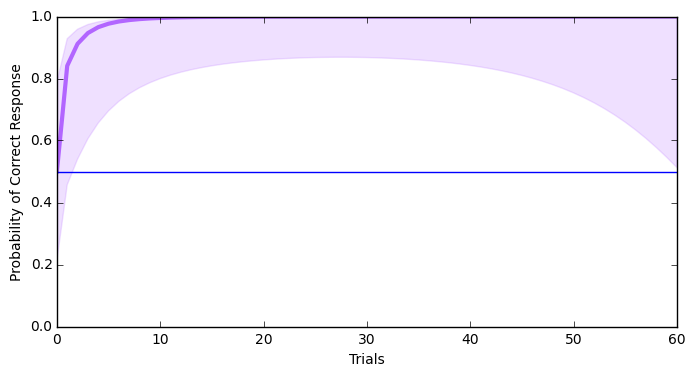

Subject CAT1_007
Set 3
Stimulus S2F1


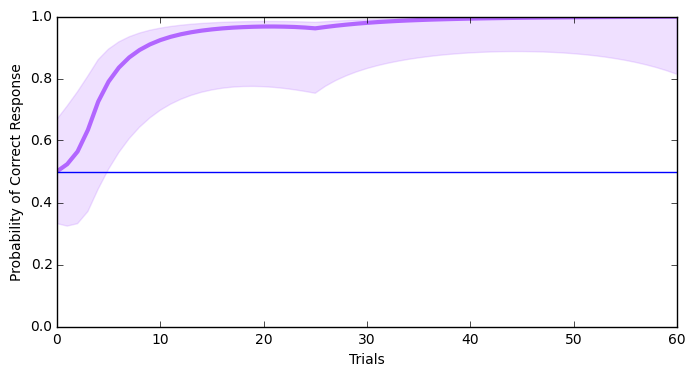

Subject CAT1_007
Set 3
Stimulus S2F2


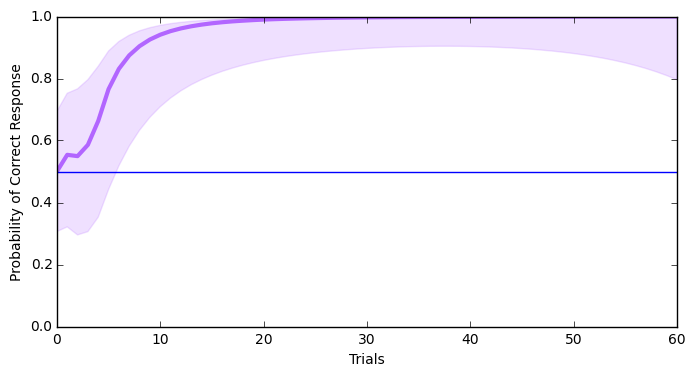

Subject CAT1_007
Set 3
Stimulus S1_C


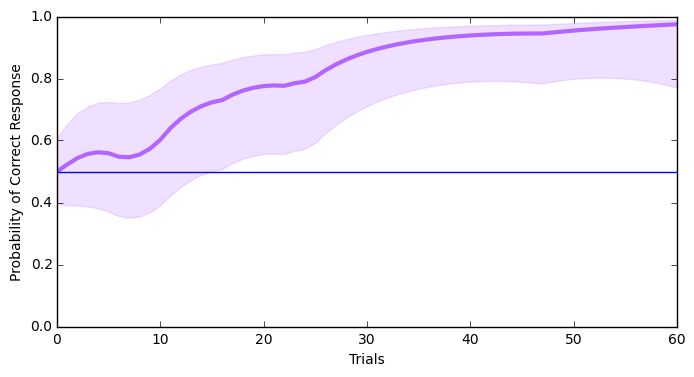

Subject CAT1_007
Set 3
Stimulus S2_C


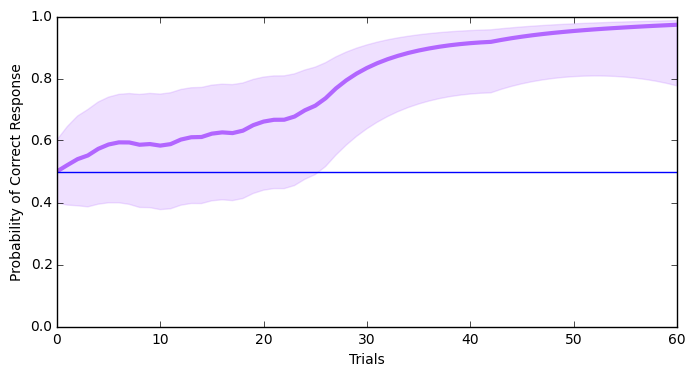

Subject CAT1_008
Set 1
Stimulus S1F1


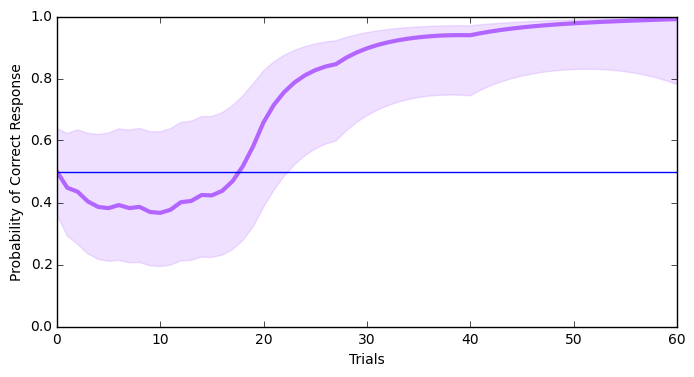

Subject CAT1_008
Set 1
Stimulus S1F2


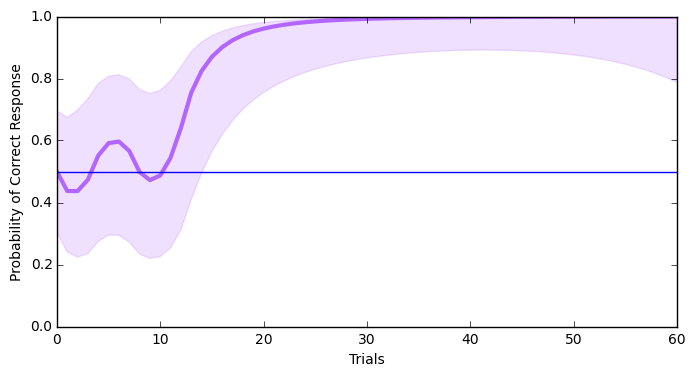

Subject CAT1_008
Set 1
Stimulus S2F1


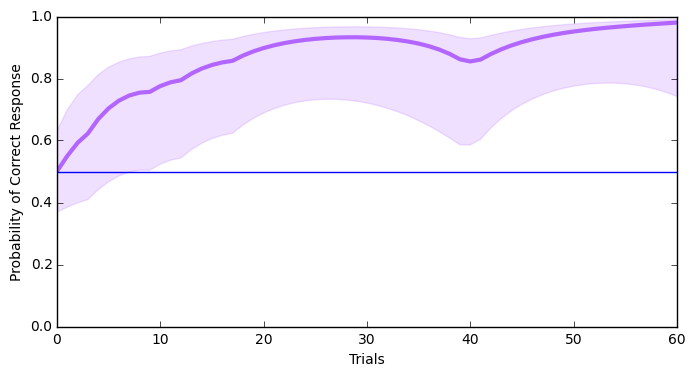

Subject CAT1_008
Set 1
Stimulus S2F2


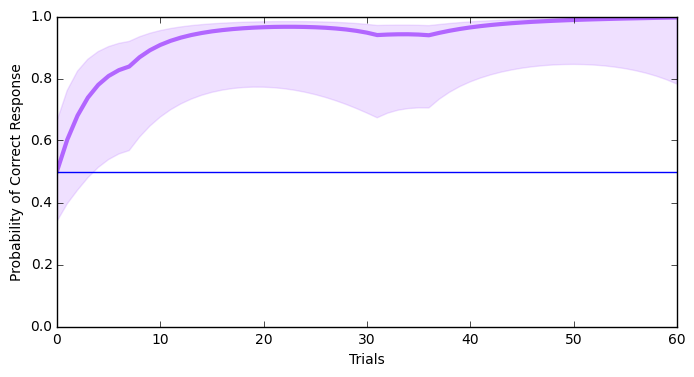

Subject CAT1_008
Set 1
Stimulus S1_C


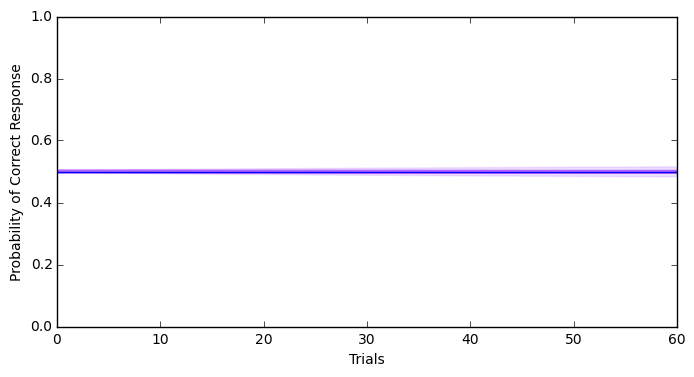

Subject CAT1_008
Set 1
Stimulus S2_C


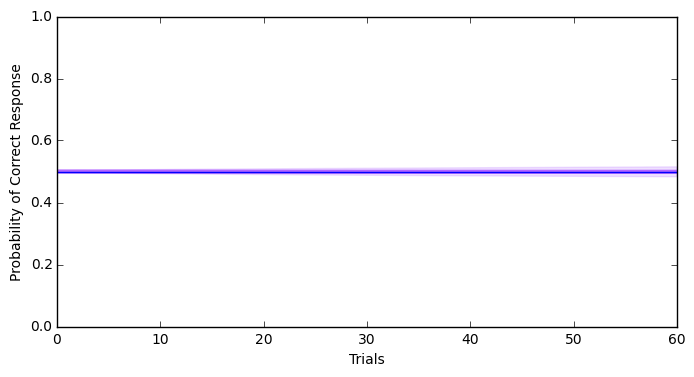

Subject CAT1_008
Set 2
Stimulus S1F1


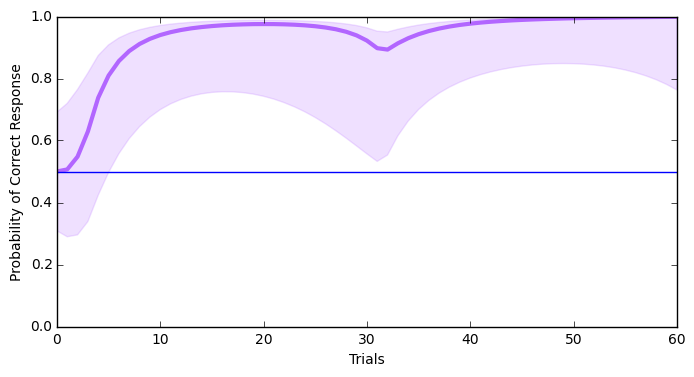

Subject CAT1_008
Set 2
Stimulus S1F2


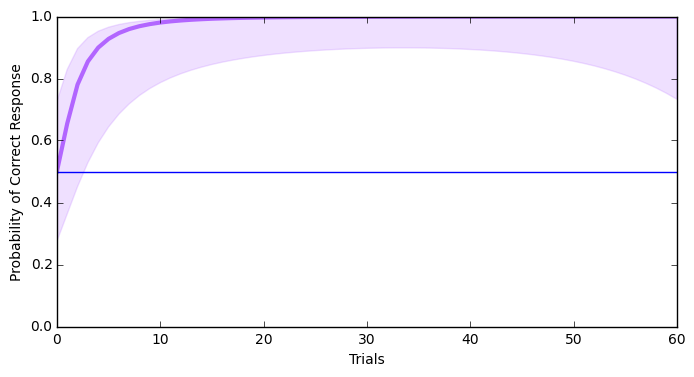

Subject CAT1_008
Set 2
Stimulus S2F1


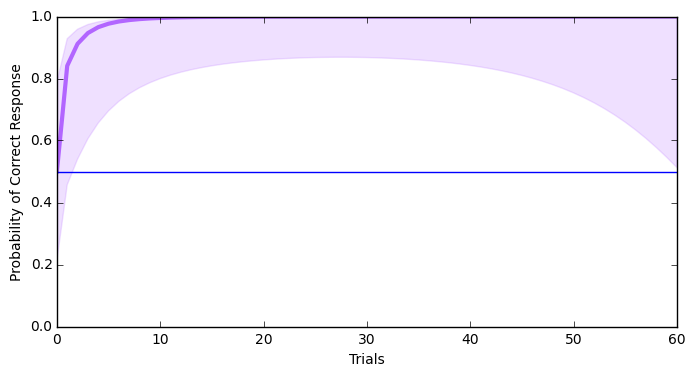

Subject CAT1_008
Set 2
Stimulus S2F2


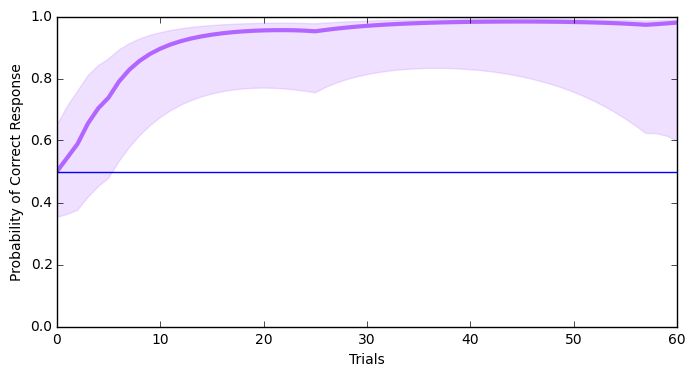

Subject CAT1_008
Set 2
Stimulus S1_C


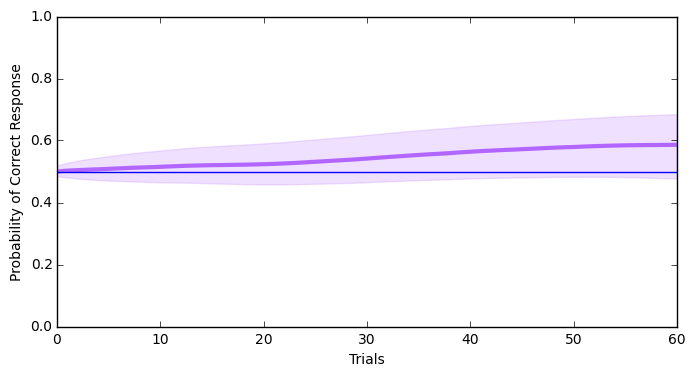

Subject CAT1_008
Set 2
Stimulus S2_C


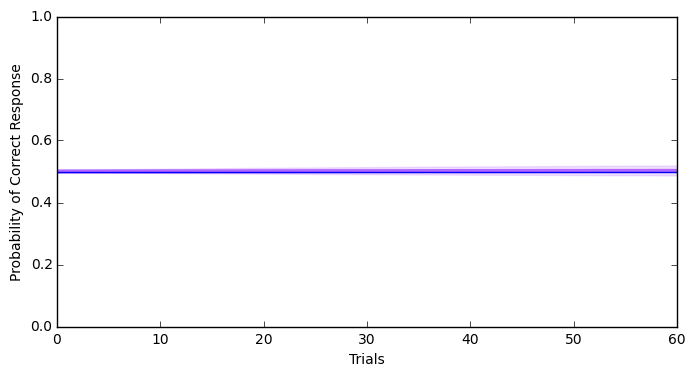

Subject CAT1_008
Set 3
Stimulus S1F1


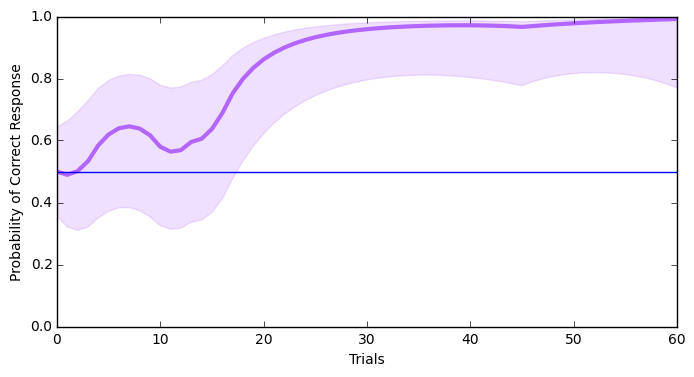

Subject CAT1_008
Set 3
Stimulus S1F2


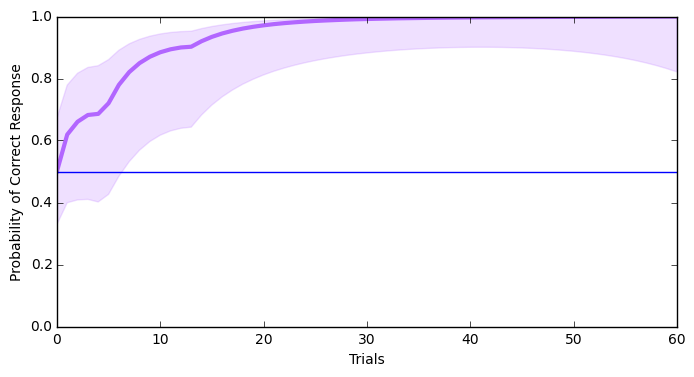

Subject CAT1_008
Set 3
Stimulus S2F1


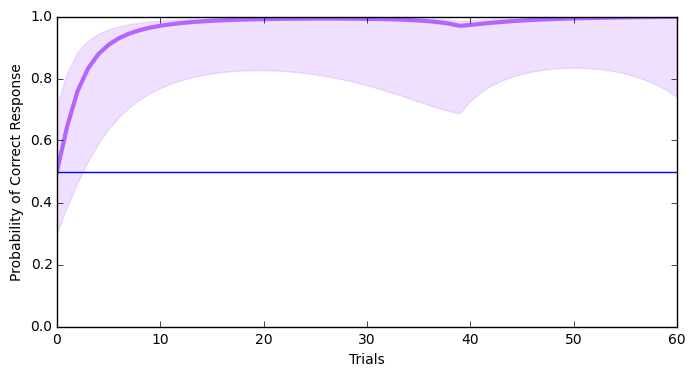

Subject CAT1_008
Set 3
Stimulus S2F2


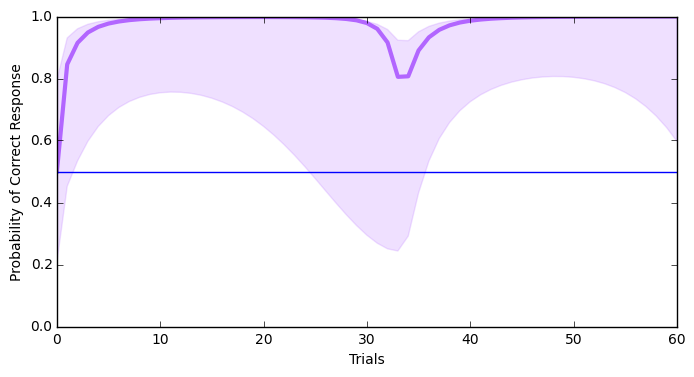

Subject CAT1_008
Set 3
Stimulus S1_C


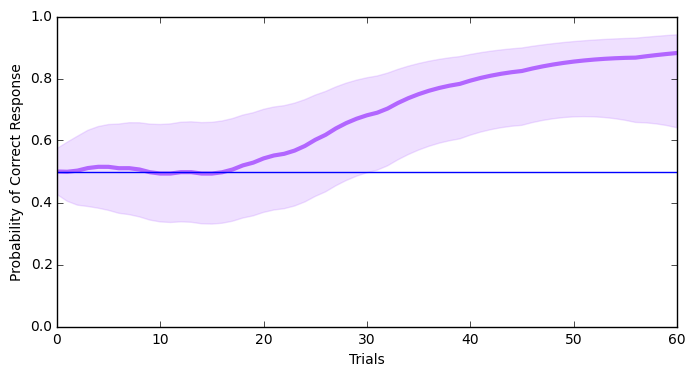

Subject CAT1_008
Set 3
Stimulus S2_C


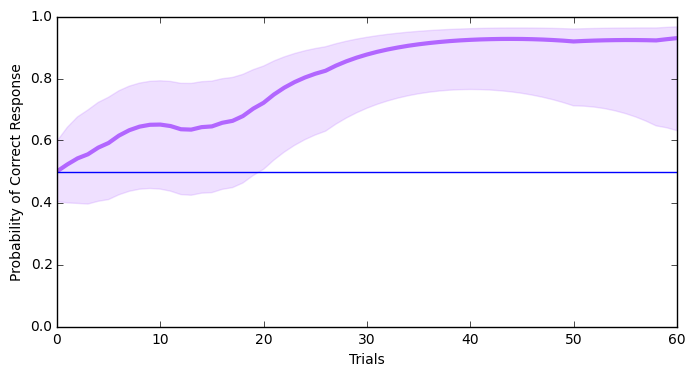

Subject CAT1_009
Set 1
Stimulus S1F1


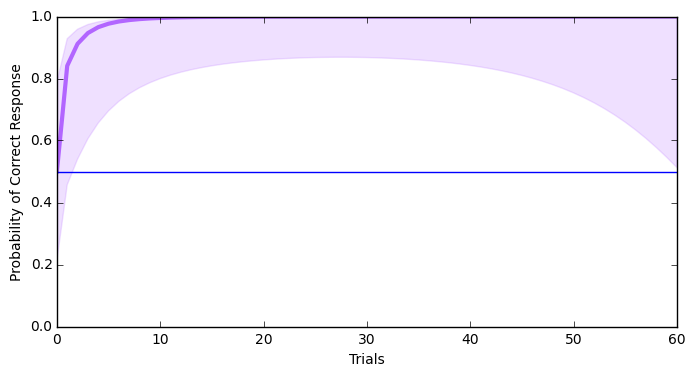

Subject CAT1_009
Set 1
Stimulus S1F2


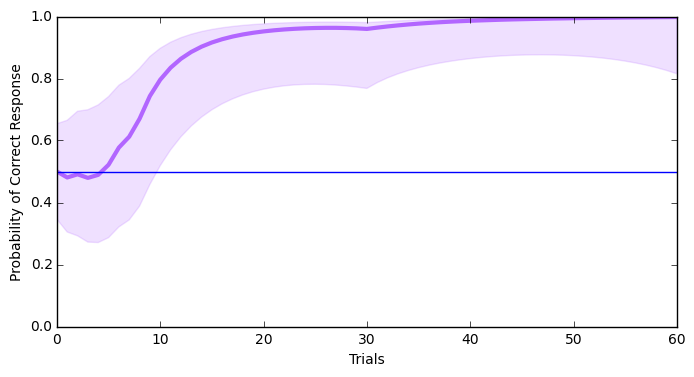

Subject CAT1_009
Set 1
Stimulus S2F1


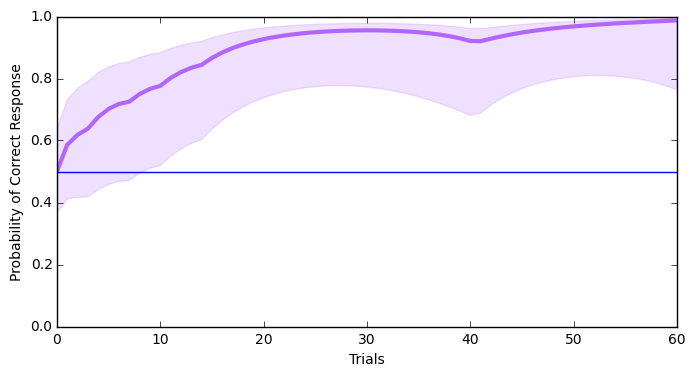

Subject CAT1_009
Set 1
Stimulus S2F2


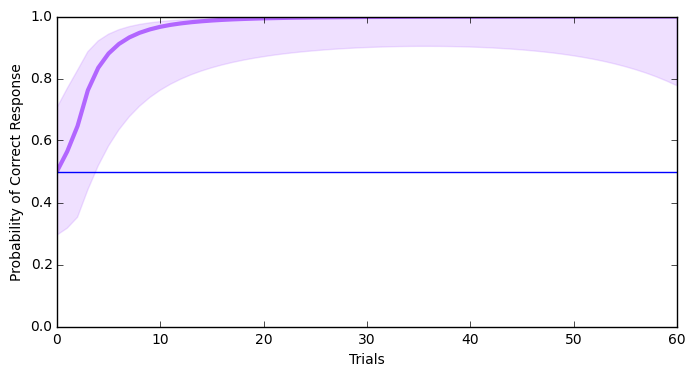

Subject CAT1_009
Set 1
Stimulus S1_C


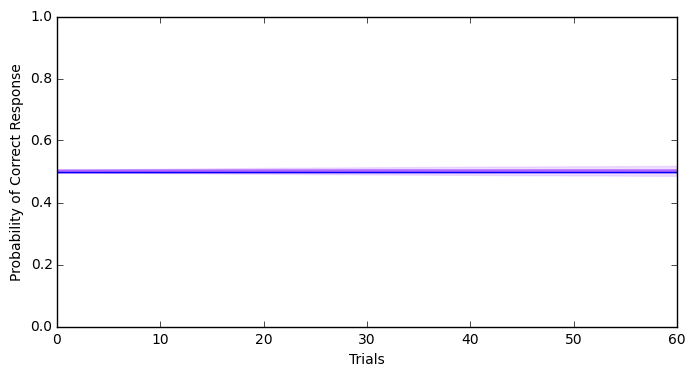

Subject CAT1_009
Set 1
Stimulus S2_C


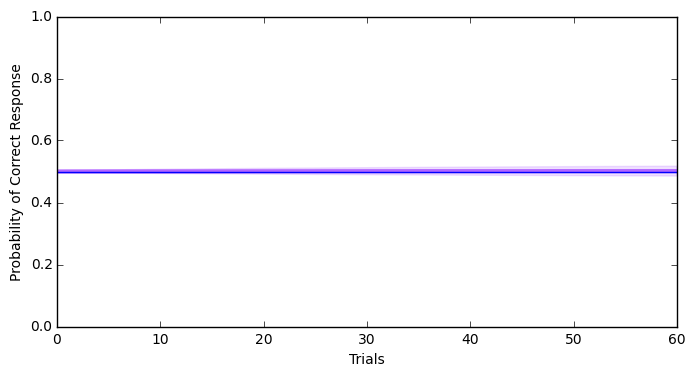

Subject CAT1_009
Set 2
Stimulus S1F1


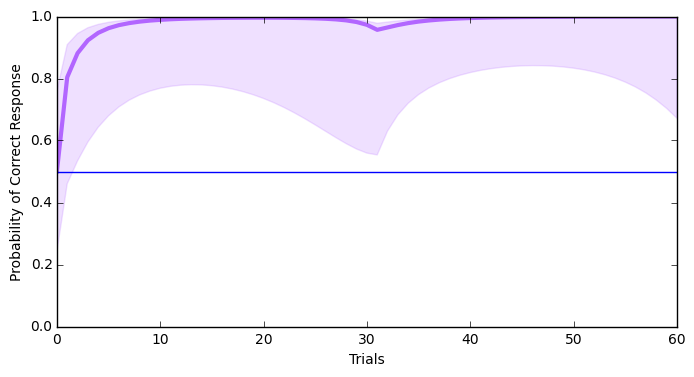

Subject CAT1_009
Set 2
Stimulus S1F2


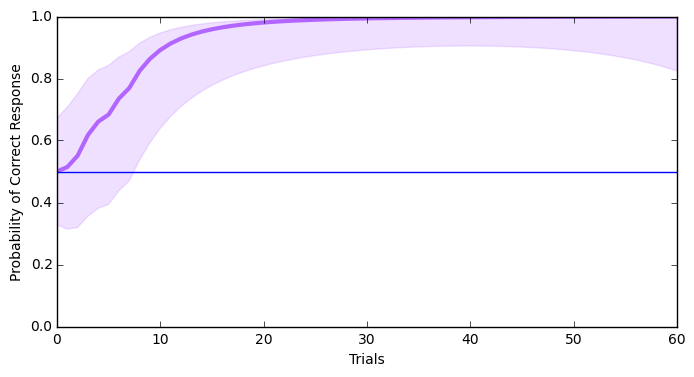

Subject CAT1_009
Set 2
Stimulus S2F1


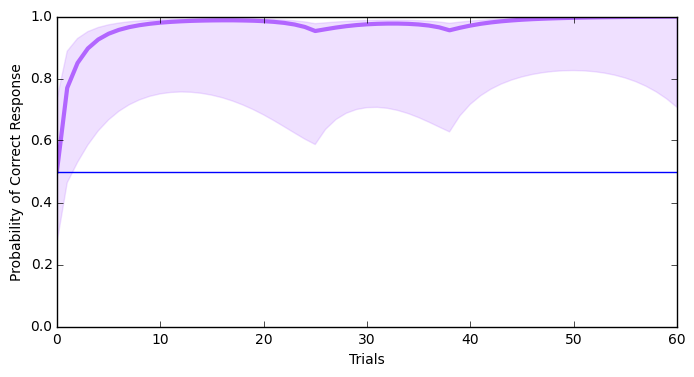

Subject CAT1_009
Set 2
Stimulus S2F2


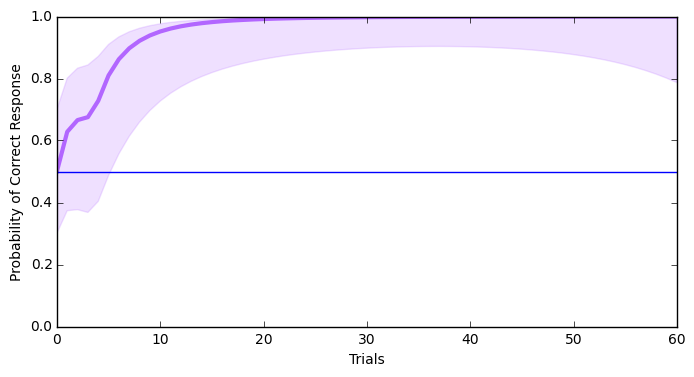

Subject CAT1_009
Set 2
Stimulus S1_C


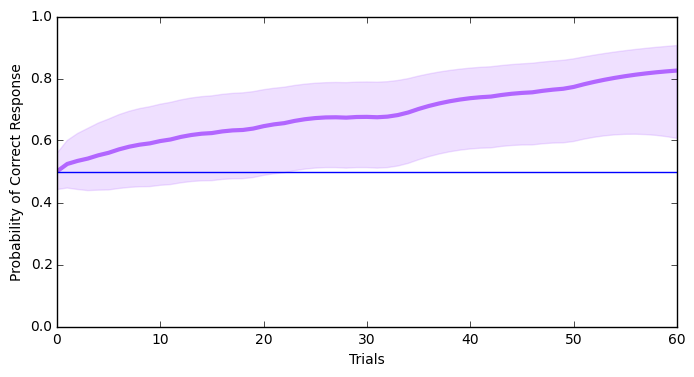

Subject CAT1_009
Set 2
Stimulus S2_C


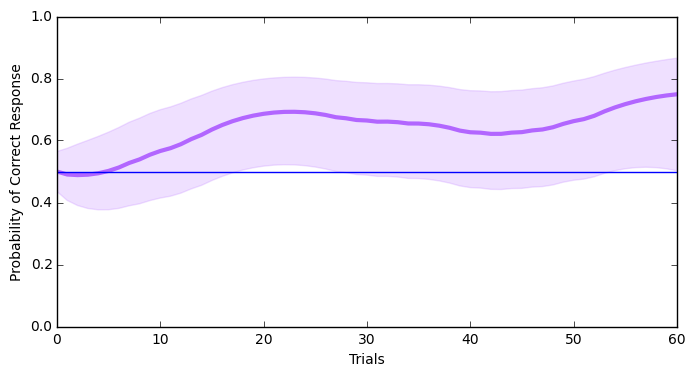

Subject CAT1_009
Set 3
Stimulus S1F1


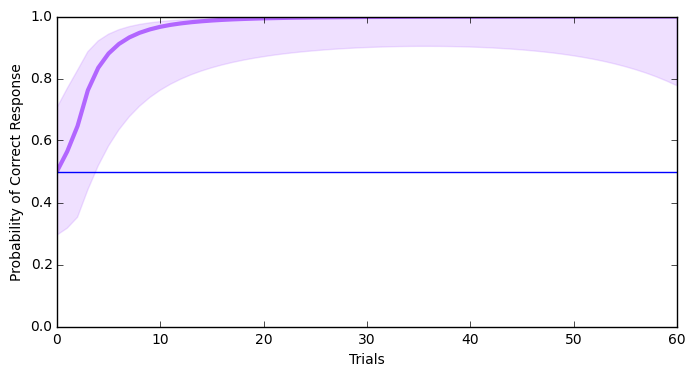

Subject CAT1_009
Set 3
Stimulus S1F2


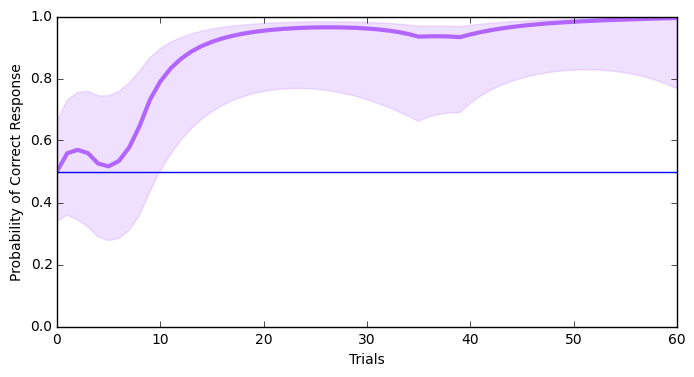

Subject CAT1_009
Set 3
Stimulus S2F1


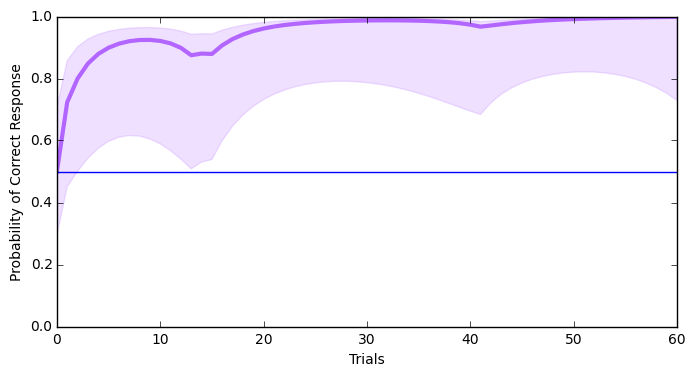

Subject CAT1_009
Set 3
Stimulus S2F2


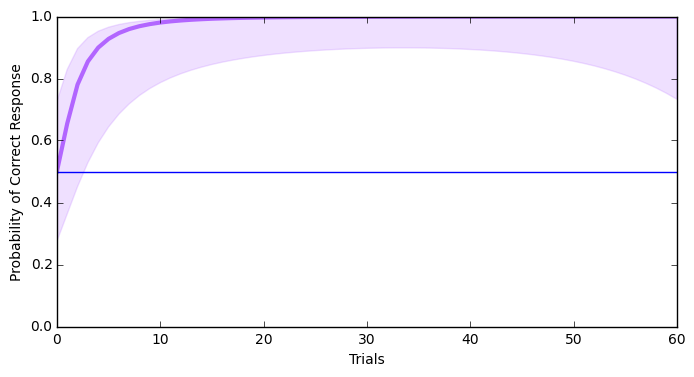

Subject CAT1_009
Set 3
Stimulus S1_C


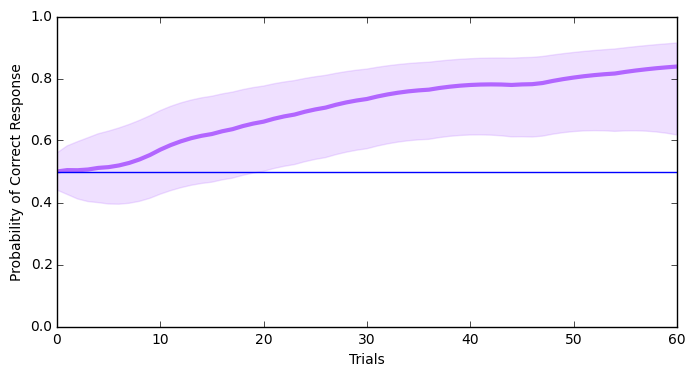

Subject CAT1_009
Set 3
Stimulus S2_C


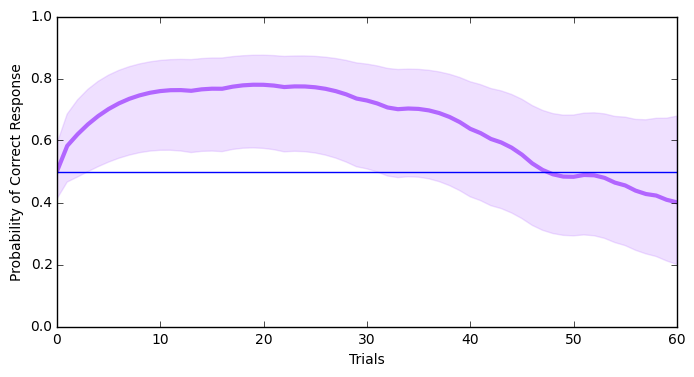

In [2]:
%matplotlib inline
import os
from os.path import join
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
from pylab import *

subs = ['CAT1_001', 'CAT1_002', 'CAT1_003', 'CAT1_004', 'CAT1_005', 'CAT1_006', 'CAT1_007', 'CAT1_008', 'CAT1_009']
stims = ['S1F1', 'S1F2', 'S2F1', 'S2F2', 'S1_C', 'S2_C']
sets = ['1','2','3']

for sub in subs:
    curr_dir = '/home/data/madlab/data/behav/CAT1/learning_curve/{0}/'.format(sub)
    for curr_set in sets:
        for curr_stim in stims:
            pmode_filename = curr_dir + '{0}_pmode_set{1}.txt'.format(curr_stim, curr_set)
            p95_filename = curr_dir + '{0}_p95_set{1}.txt'.format(curr_stim, curr_set) 
            p05_filename = curr_dir + '{0}_p05_set{1}.txt'.format(curr_stim, curr_set)
            pmode = np.genfromtxt(pmode_filename)
            p05 = np.genfromtxt(p05_filename)
            p95 = np.genfromtxt(p95_filename)
            prime_pmode = np.gradient(pmode)
            prime_pmode_ten = prime_pmode * 10 
            
            x = range(len(pmode))
            chance = np.ones(len(x)) * 0.5

            fig, ax = plt.subplots(figsize=(8, 4))
            ax.plot(x, pmode, "#B266FF", linewidth = 3)
            ax.fill_between(x, p95, p05, color = "#B266FF", alpha = 0.2)
            ax.plot(x, chance, 'b', linewidth = 1)

            ax.set_ylim(0,1)
            ax.set_xlabel('Trials')
            ax.set_ylabel('Probability of Correct Response')

            print 'Subject ' + sub
            print 'Set ' + curr_set
            print 'Stimulus ' + curr_stim
            plt.show()  

Mean # of S1F1:  9.7037037037
Std: 7.51860974219
S1F1 Normal Test:  (0.8252865672111511, 0.0395280122756958)

Mean # of S1F2:  8.48148148148
Std: 2.92756634746
S1F2 Normal Test:  (0.926926851272583, 0.452644944190979)

Mean # of S2F1:  6.88888888889
Std: 6.32845816262
S2F1 Normal Test:  (0.6573249101638794, 0.00044972001342102885)

Mean # of S2F2:  6.25925925926
Std: 3.87386870074
S2F2 Normal Test:  (0.7594223022460938, 0.006970842368900776)

Mean # of S1_C:  41.8518518519
Std: 12.1371901798
S1_C Normal Test:  (0.9356691837310791, 0.5371209979057312)

Mean # of S2_C:  37.1851851852
Std: 16.2739746115
S2_C Normal Test:  (0.9254631400108337, 0.4393775463104248)



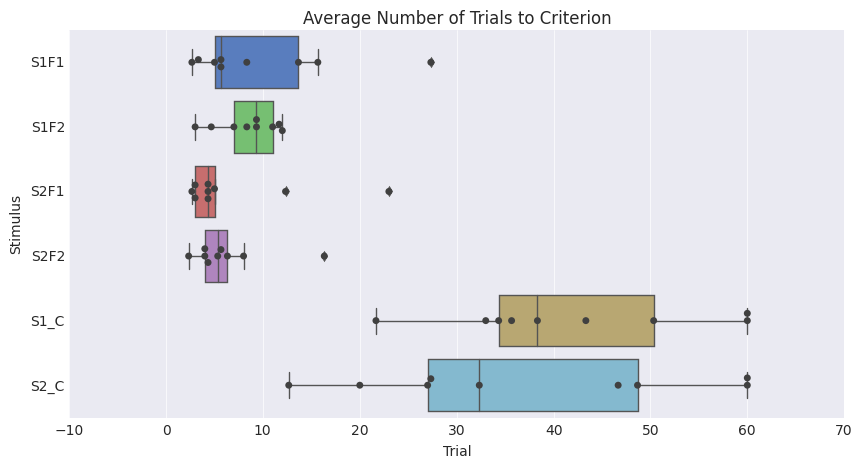

In [239]:
import os
from os.path import join
import numpy as np
import pandas as pd
from glob import glob
from math import sqrt
%matplotlib inline
import seaborn as sns
sns.set_palette('muted')
sns.set_style("darkgrid")
import matplotlib.pyplot as plt
from scipy import stats

subs = ['CAT1_001', 'CAT1_002', 'CAT1_003', 'CAT1_004', 'CAT1_005', 'CAT1_006', 'CAT1_007', 'CAT1_008', 'CAT1_009']
stims = ['S1F1', 'S1F2', 'S2F1', 'S2F2', 'S1_C', 'S2_C']
all_subs_learn = {'S1F1_learn':[], 'S1F2_learn':[], 'S2F1_learn':[], 'S2F2_learn': [], 'S1_C_learn': [], 'S2_C_learn': []}

for sub in subs:
    sub_dir = '/home/data/madlab/data/behav/CAT1/learning_curve/{0}/'.format(sub)
    for i, curr_stim in enumerate(stims):
        lower_05_files = glob(join(sub_dir, '{0}_p05_set*.txt'.format(curr_stim)))
        lower_05_files.sort()
        learning_files = glob(join(sub_dir, '{0}_pmode_set*'.format(curr_stim))) 
        learning_files.sort()      
        sub_learn = []
    
        for j in range(3):
            set_learn = []
            learning_curve = np.loadtxt(learning_files[j])
            lower_05 = np.loadtxt(lower_05_files[j])
            #print lower_05
            for a, curr_trial in enumerate(lower_05):
                if lower_05[a] >= 0.50:
                    set_learn.append(a) 
            if len(set_learn) == 0:
                set_learn.append(60)
            sub_learn.append(set_learn[0])     
        all_subs_learn['{0}_learn'.format(curr_stim)].append(np.mean(sub_learn))
    
for d in ['S1F1', 'S1F2', 'S2F1', 'S2F2', 'S1_C', 'S2_C']:
    print "Mean # of {0}: ".format(d), np.mean(all_subs_learn['{0}_learn'.format(d)])
    print "Std:", np.std(all_subs_learn['{0}_learn'.format(d)]) 
    print "{0} Normal Test: ".format(d), stats.shapiro(all_subs_learn['{0}_learn'.format(d)])
    print ""
    
N = 6
plot_data = []
plot_data.append(all_subs_learn['S1F1_learn'])
plot_data.append(all_subs_learn['S1F2_learn'])
plot_data.append(all_subs_learn['S2F1_learn'])
plot_data.append(all_subs_learn['S2F2_learn'])
plot_data.append(all_subs_learn['S1_C_learn'])
plot_data.append(all_subs_learn['S2_C_learn'])

conditions = ['S1F1', 'S1F2', 'S2F1', 'S2F2', 'S1_C', 'S2_C']
ind = np.arange(N)
fig, ax = plt.subplots(figsize = (10,5))
ax = sns.boxplot(data = plot_data, orient = 'h')
ax = sns.swarmplot(data = plot_data, color = '.25', orient = 'h')
ax.set_yticks(ind)
ax.set_yticklabels(conditions)
ax.set_xlabel("Trial")
ax.set_ylabel("Stimulus")
ax.set_title("Average Number of Trials to Criterion")
plt.show()

Mean S1F1 AUC: 0.543047018519
SD: 0.0404232049407
S1F1 Normal Test:  (0.9040011763572693, 0.2761150300502777)

Mean S1F2 AUC: 0.552850907407
SD: 0.0193936921518
S1F2 Normal Test:  (0.8668639659881592, 0.11377601325511932)

Mean S2F1 AUC: 0.552100296296
SD: 0.0380282333346
S2F1 Normal Test:  (0.7239559888839722, 0.002700481563806534)

Mean S2F2 AUC: 0.561772666667
SD: 0.0219650399929
S2F2 Normal Test:  (0.827599823474884, 0.04196836054325104)

Mean S1_C AUC: 0.361999759259
SD: 0.0499570802936
S1_C Normal Test:  (0.9613277912139893, 0.8121131658554077)

Mean S2_C AUC: 0.380181759259
SD: 0.0626592182506
S2_C Normal Test:  (0.8735973834991455, 0.13433068990707397)



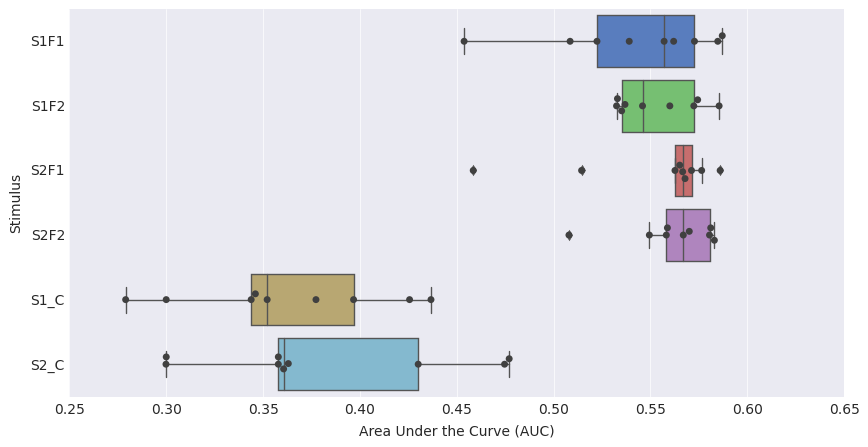

In [237]:
# The code below reading in the pmode for each stimulus type and each subject and calculates the
# Area Under the Curve (AUC). The AUC is calculated using the scipy trapz integration function with
# a dx step size of 0.01

subs = ['CAT1_001', 'CAT1_002', 'CAT1_003', 'CAT1_004', 'CAT1_005', 'CAT1_006', 'CAT1_007', 'CAT1_008', 'CAT1_009']
stims = ['S1F1', 'S1F2', 'S2F1', 'S2F2', 'S1_C', 'S2_C']
auc_all_stim = {'S1F1_AUC': [], 'S1F2_AUC': [], 'S2F1_AUC': [], 'S2F2_AUC': [], 'S1_C_AUC': [], 'S2_C_AUC': []}

for sub in subs:
    sub_dir = '/home/data/madlab/data/behav/CAT1/learning_curve/{0}/'.format(sub)
    for i, curr_stim in enumerate(stims):
        learning_files = glob(join(sub_dir, '{0}pmode_set*'.format(curr_stim))) 
        learning_files.sort()           
        sub_curr_stim = []
    
        for j in range(3):
            pmode_filename = sub_dir + '{0}_pmode_set{1}.txt'.format(curr_stim, j+1)
            pmode = np.genfromtxt(pmode_filename)
            auc_stim = trapz(pmode,dx=0.01)        
            sub_curr_stim.append(auc_stim)

        auc_all_stim['{0}_AUC'.format(curr_stim)].append(np.mean(sub_curr_stim))    

for d in ['S1F1', 'S1F2', 'S2F1', 'S2F2', 'S1_C', 'S2_C']:
    print "Mean {0} AUC:".format(d), np.mean(auc_all_stim['{0}_AUC'.format(d)])
    print "SD:",  np.std(auc_all_stim['{0}_AUC'.format(d)])
    print "{0} Normal Test: ".format(d), stats.shapiro(auc_all_stim['{0}_AUC'.format(d)])
    print ""

N = 6
auc_plot_data = []
auc_plot_data.append(auc_all_stim['S1F1_AUC'])
auc_plot_data.append(auc_all_stim['S1F2_AUC'])
auc_plot_data.append(auc_all_stim['S2F1_AUC'])
auc_plot_data.append(auc_all_stim['S2F2_AUC'])
auc_plot_data.append(auc_all_stim['S1_C_AUC'])
auc_plot_data.append(auc_all_stim['S2_C_AUC'])

conditions = ['S1F1', 'S1F2', 'S2F1', 'S2F2', 'S1_C', 'S2_C']
ind = np.arange(N)
fig, ax = plt.subplots(figsize = (10,5))
ax = sns.boxplot(data=auc_plot_data, orient='h')
ax = sns.swarmplot(data=auc_plot_data, color='.25', orient='h')
ax.set_yticks(ind)
ax.set_yticklabels(conditions)
ax.set_xlabel("Area Under the Curve (AUC)")
ax.set_ylabel("Stimulus")
plt.show()